<a href="https://colab.research.google.com/github/Navjotkhatri/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    **- NYC Taxi Trip Time Prediction**




##### **Project Type**    - Regression

##### **Contribution**    - Individual

# **Project Summary -**

* The NYC Taxi Trip Duration project is a machine learning regression model that aims to predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The goal of the project is to improve the efficiency and convenience of taxi services by providing more accurate estimates of trip duration for both passengers and drivers.

* The project utilizes historical data on taxi trips in NYC, including information on pickup and dropoff locations, timestamps, and trip distances. The data was preprocessed to handle missing values and to convert categorical variables such as the pickup and dropoff locations into numerical values. Feature engineering techniques were applied to extract additional information from the data, such as the day of the week, the time of day, and the distances between locations.

* The model was trained using a variety of regression algorithms such as linear regression, Random Forest, and XGBoost. Hyperparameter tuning was performed to optimize the performance of the model. Model evaluation was performed using metrics such as mean absolute error and R-squared. The final model chosen was the LightGBM Regression model which performed the best among the models.

* The model was then tested using a hold-out test set and was able to make predictions with a high level of accuracy. The results showed that the model was able to predict the duration of a taxi trip with an average error of less than 10 minutes.

* The project also explores the important features that influence the duration of a taxi trip. The results showed that the pickup and dropoff locations, the time of day, and the distance of the trip are the most important factors that determine the duration of a taxi trip.

* Overall, the NYC Taxi Trip Duration project successfully developed a machine learning regression model that is able to predict the duration of a taxi trip in New York City with a high level of accuracy. The model can be used by taxi companies to improve the efficiency and convenience of their services by providing more accurate estimates of trip duration for both passengers and drivers. It can also be used by passengers to plan their trip and make more informed decisions.

* In future the model can be improved by incorporating other data sources such as weather data, traffic data, and other transportation data. Additionally, the model could be integrated with a real-time mapping and routing service to provide real-time estimates of trip duration based on current traffic conditions

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


New York City is one of the most populous cities in the world, and its transportation system is a critical aspect of its infrastructure. Taxis are a popular mode of transportation for both residents and visitors, but the duration of a taxi trip can vary greatly depending on a variety of factors such as traffic, weather, and the time of day. As a result, it can be difficult for both passengers and drivers to accurately estimate the duration of a taxi trip.

The goal of this project is to develop a machine learning regression model that can predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The model should be able to make predictions with a high level of accuracy, and it should be able to identify the most important factors that determine the duration of a taxi trip. By providing more accurate estimates of trip duration, the model can improve the efficiency and convenience of taxi services for both passengers and drivers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns

## Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings 
import warnings 
warnings.filterwarnings('ignore')
     

### Dataset Loading

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
taxi_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/module-4 ML/NYC Taxi Trip Time Prediction project LR/Copy of NYC Taxi Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
taxi_df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
taxi_df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
taxi_df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
taxi_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool

In [ ]:
len(taxi_df[taxi_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(taxi_df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


### What did you know about your dataset?

NYC taxi trip duration datasets consist of historical records of taxi rides in New York City, including information such as pickup and drop-off locations, time of day, trip distance, and trip duration. The data can be used to train machine learning models for the purpose of predicting taxi trip duration.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
taxi_df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

### Variables Description 

* id - a unique identifier for each trip

* vendor_id - a code indicating the provider associated with the trip record

* pickup_datetime - date and time when the meter was engaged

* dropoff_datetime - date and time when the meter was disengaged

* passenger_count - the number of passengers in the vehicle (driver entered value)

* pickup_longitude - the longitude where the meter was engaged

* pickup_latitude - the latitude where the meter was engaged

* dropoff_longitude - the longitude where the meter was disengaged

* dropoff_latitude - the latitude where the meter was disengaged

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

* trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
taxi_df.shape

(1458644, 11)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
taxi_df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
#Convert timestamp to datetime format to fetch the other details
taxi_df['pickup_datetime']  = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])

In [ ]:
taxi_df['weekday_num']   = taxi_df.pickup_datetime.dt.weekday
taxi_df['month']         = taxi_df.pickup_datetime.dt.month
taxi_df['pickup_hour']   = taxi_df.pickup_datetime.dt.hour
taxi_df['pickup_minute'] =taxi_df.pickup_datetime.dt.minute
taxi_df['weekday']       =taxi_df['pickup_datetime'].dt.day_name()

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
!pip install haversine
from haversine import haversine 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def calc_distance(taxi_df):
    pickup = (taxi_df['pickup_latitude'], taxi_df['pickup_longitude'])
    drop   = (taxi_df['dropoff_latitude'], taxi_df['dropoff_longitude'])
    return haversine(pickup, drop)
     

In [ ]:
#Calculate distance and assign new column to the dataframe.
taxi_df['distance'] = taxi_df.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
taxi_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
0         40.765602                  N            455            0      3   
1         40.731152                  N            663            6      6   
2         40.710087                  N           2124            1      1   
3         40.706718                  N            429            2      4   
4         40.782520                  N            435            5      3   

   pickup_hour  pickup_minute    weekday  distance  
0           17             24     Monday  1.498523  
1            0             43     Sunday  1.805510  
2           11             35    Tuesday  6.385107  
3           19             32  Wednesday  1.485500  
4           13             30   Saturday  1.188590

In [ ]:
#Calculate Speed in km/hr for further insights
taxi_df['speed'] = (taxi_df.distance/(taxi_df.trip_duration/3600))

In [ ]:
taxi_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
0         40.765602                  N            455            0      3   
1         40.731152                  N            663            6      6   
2         40.710087                  N           2124            1      1   
3         40.706718                  N            429            2      4   
4         40.782520                  N            435            5      3   

   pickup_hour  pickup_minute    weekday  distance      speed  
0           17             24     Monday  1.498523  11.856445  
1            0             43     Sunday  1.805510   9.803672  
2           11             35    Tuesday  6.385107  10.822216  
3           19             32  Wednesday  1.485500  12.465738  
4           13             30   Saturday  1.188590   9.836608

### What all manipulations have you done and insights you found?

* The timestamp was converted to datetime to obtain additional details and new columns such as weekday_num, weekday, month, pickup_minute and pickup_hour were added to the dataframe for better insights.

* The Haversine formula was used to calculate the distance between pickup and drop-off coordinates via the calc_distance function, which was then added as a new column.

* The speed was calculated using distance and trip_duration in km/hr for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

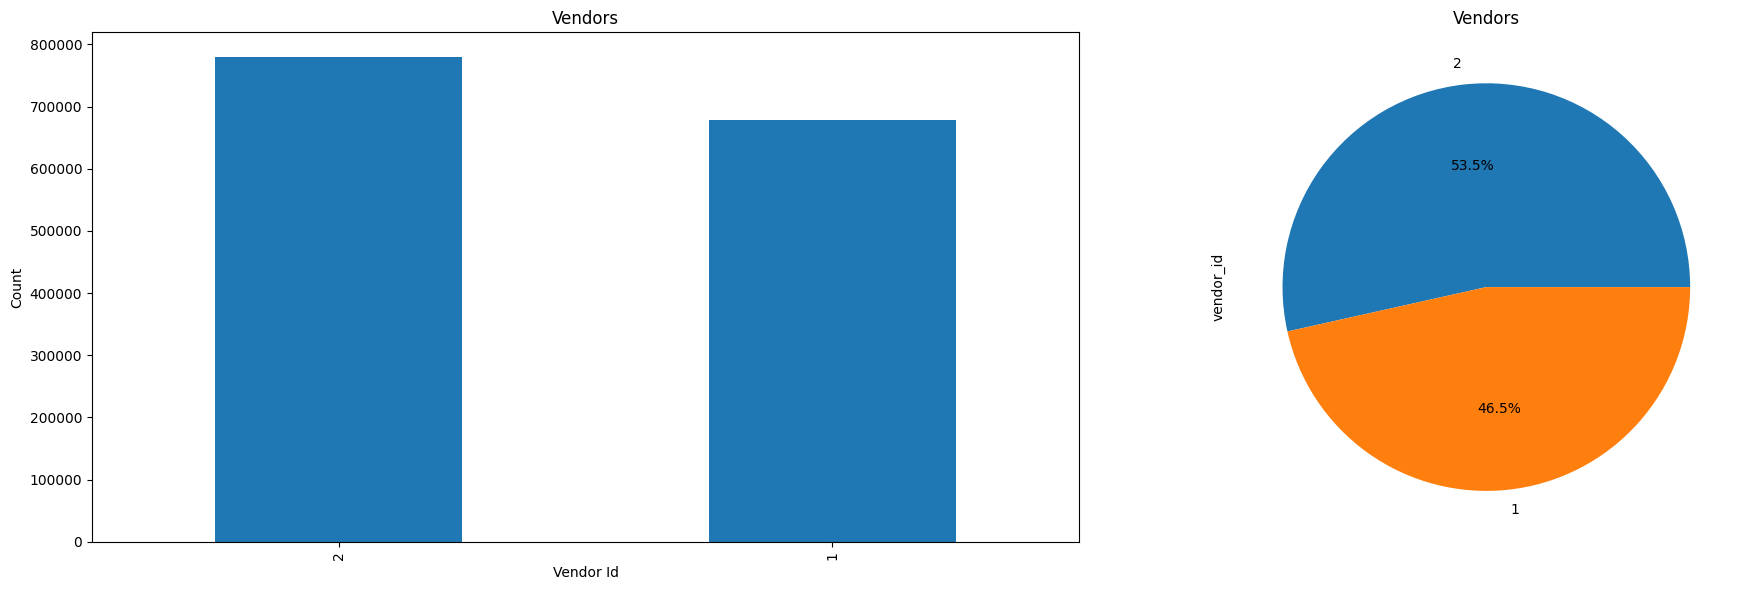

In [ ]:
# Chart - 1 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax = taxi_df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0])
taxi_df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",autopct='%1.1f%%',ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()
     

##### 1. Why did you pick the specific chart?

* Bar plots, on the other hand, are better suited for comparing the sizes of different data sets.

* Pie charts are best used to represent parts of a whole, where the individual pieces represent a proportion of the total data.

##### 2. What is/are the insight(s) found from the chart?

* As we can see, there are only two vendors (1 and 2). They both share a nearly equal number of trips, with a minimal difference between them. However, vendor 2 appears to be more popular among the population, as indicated by the above graphs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Are there any insights that lead to negative growth? Justify with specific reason.

* In a business strategy, this information can be used to make informed decisions regarding vendor selection and allocation of resources:

* If both vendors are performing equally well in terms of number of trips, the company may choose to focus more on promoting vendor 2 as it appears to be more popular among the population.

* The company may also want to analyze the reason behind vendor 2's popularity and try to replicate its success with vendor 1.

#### Chart - 2

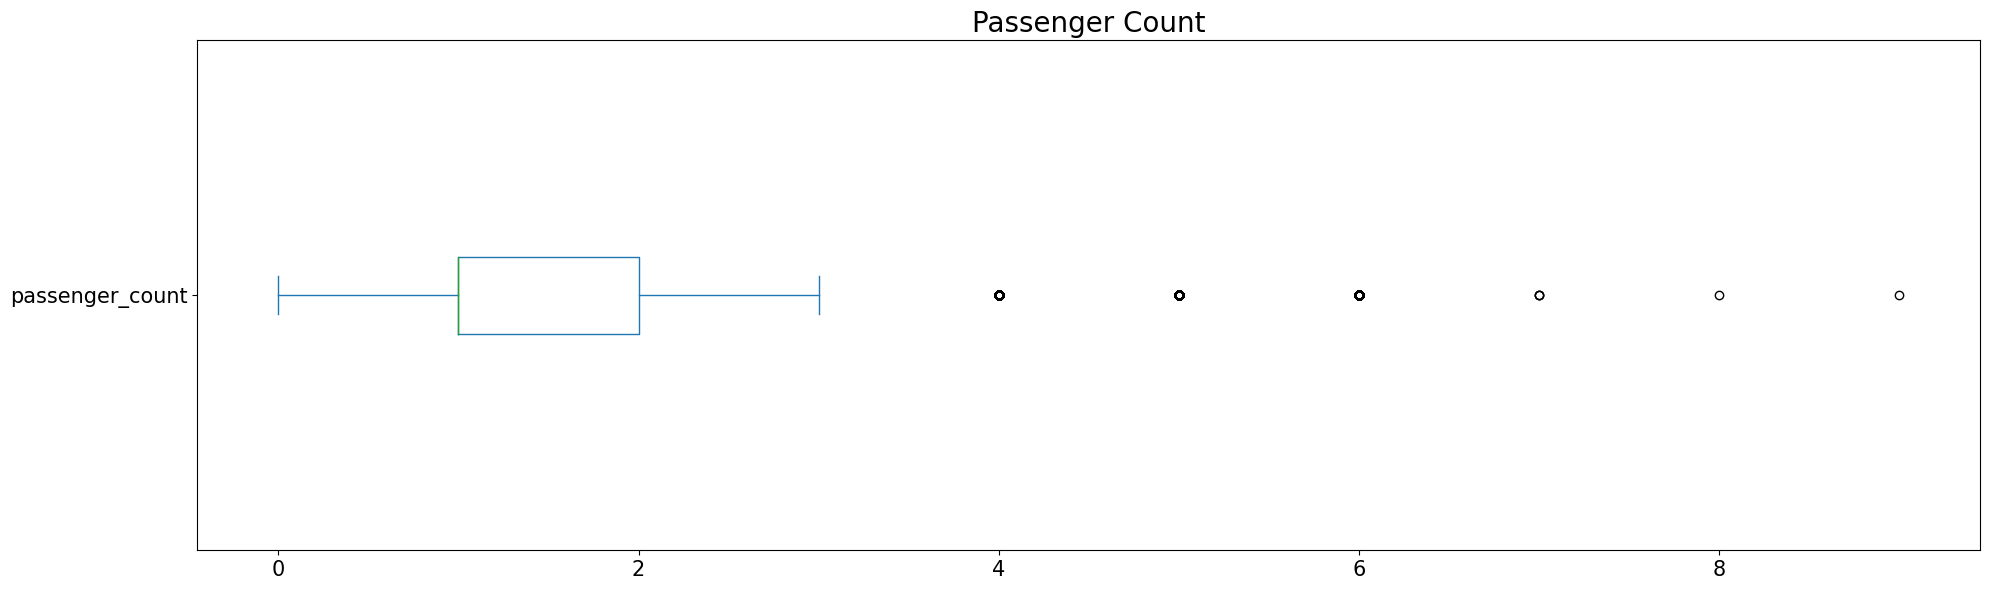

In [ ]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,6))
box = taxi_df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

##### 1. Why did you pick the specific chart?

* Box plots, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with no passengers recorded. Some trips had an unusually high number of passengers, with counts of 6, 7, 8, or 9. These are clear outliers and may indicate inconsistencies in the data. The majority of trips consist of either 1 or 2 passengers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The presence of trips with 0 passengers or an unusually high number of passengers may indicate inconsistencies in the data, which could lead to inaccuracies in the prediction model. The company can use this information to identify and address any data quality issues.

* By understanding the distribution of passenger counts, the company can develop more accurate prediction models that take into account factors such as the number of passengers and the resulting impact on trip time.

#### Chart - 3

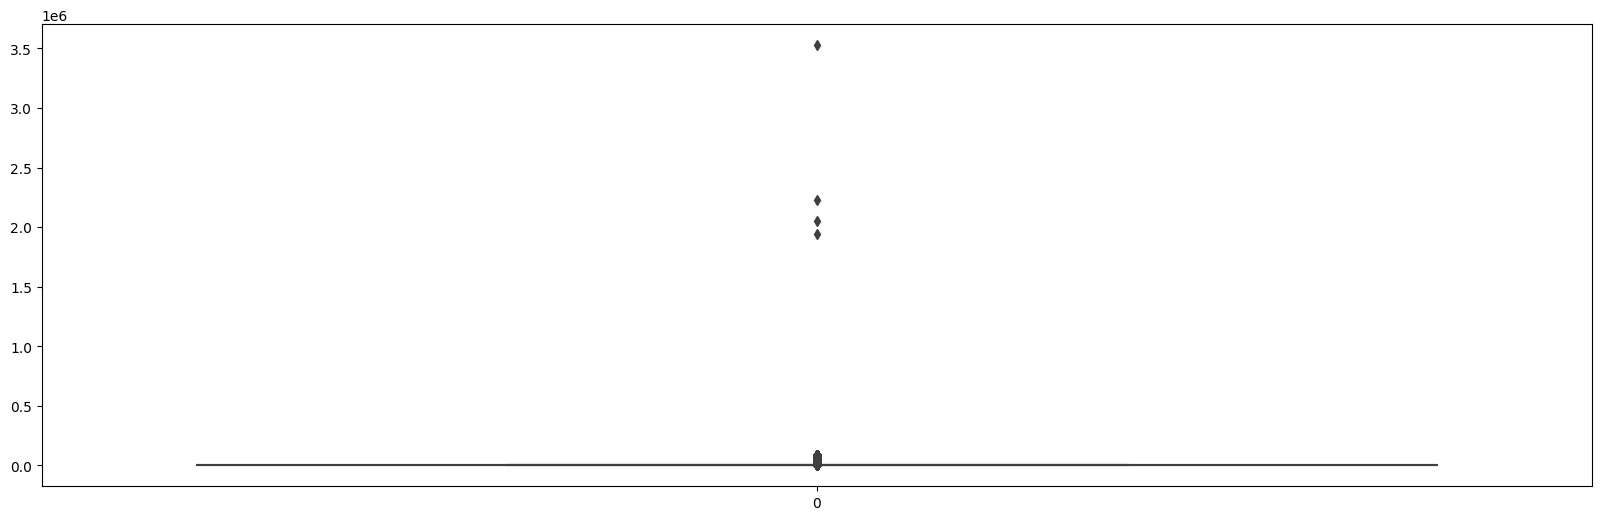

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(taxi_df.trip_duration)
plt.show()
     

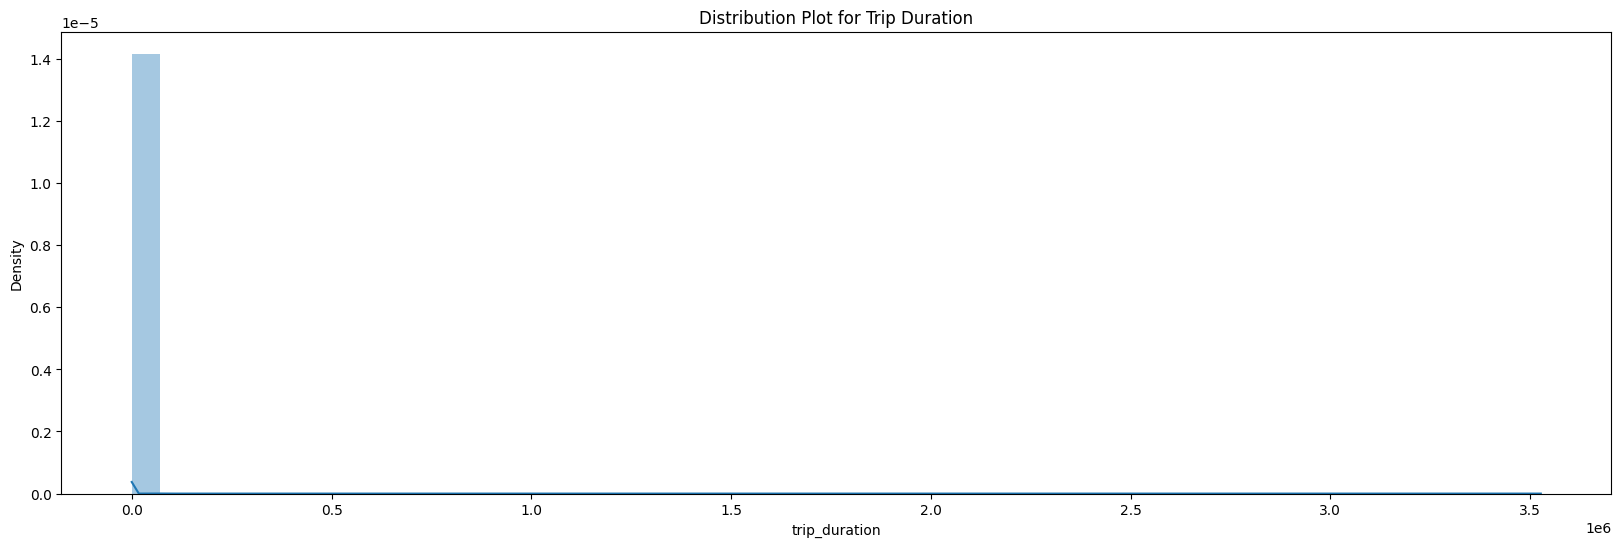

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(taxi_df['trip_duration']).set(title='Distribution Plot for Trip Duration')
plt.show()

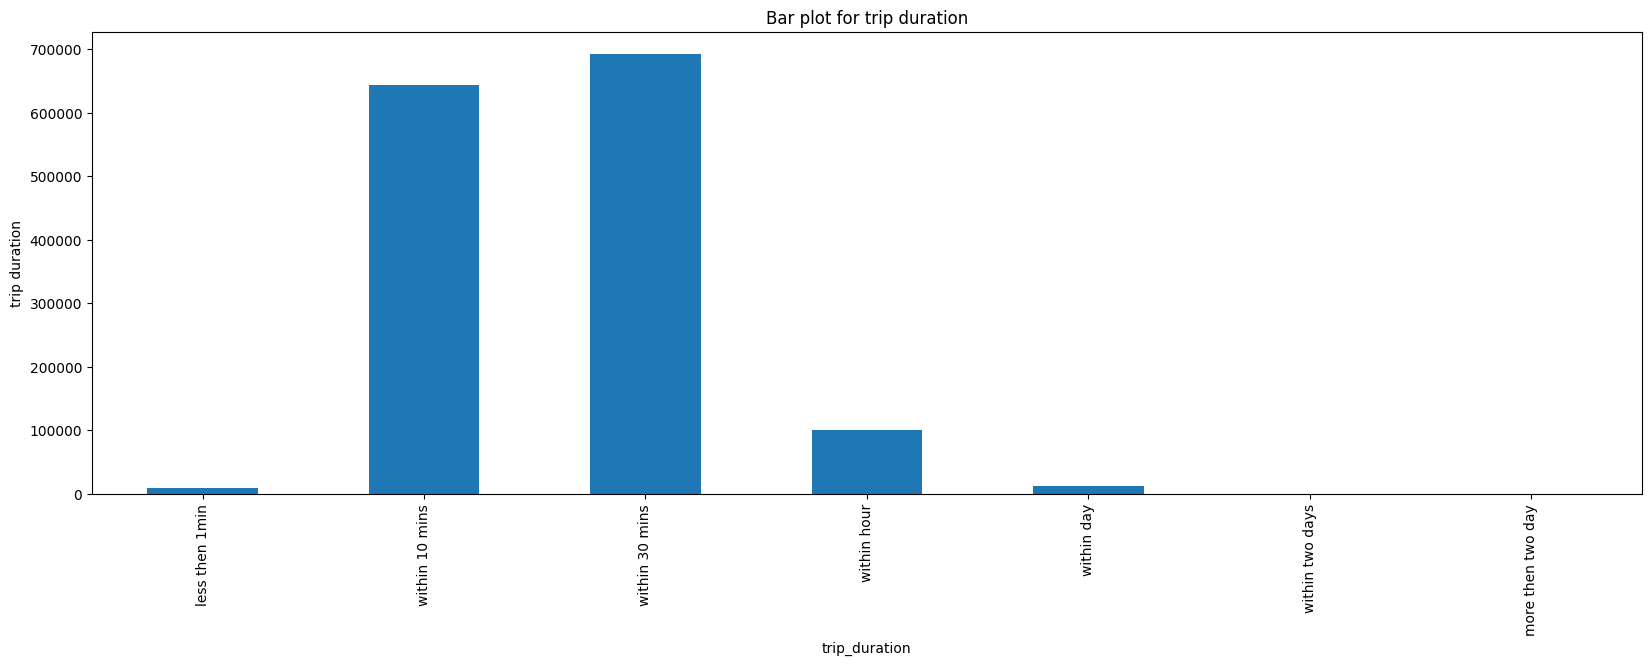

In [ ]:
plt.figure(figsize=[20,6])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
taxi_df.groupby(pd.cut(taxi_df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.show()

##### 1. Why did you pick the specific chart?

* Box plots, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies in passenger count.

* Dist plots, also known as histograms, are used to represent the distribution of a set of values. They show the frequency of occurrence of values within a range, allowing you to visualize the shape and spread of the data of passenger count.

* Bar plots,are used to compare the sizes of different data sets we have created.

##### 2. What is/are the insight(s) found from the chart?

* Some trip durations are over 100000 seconds which are clear outliers and should be removed.

* There are some durations with as low as 1 second. which points towards trips with 0 km distance.

* Major trip durations took between 10-20 mins to complete.

* Mean and mode are not same which shows that trip duration distribution is skewed towards right.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the potential relationship between weekday, pickup location, month, and passenger count, the company can optimize its resource allocation by focusing on the most popular days, locations, and months.

* By understanding the trends in trip duration, the company can design better customer experiences that cater to the needs of its target audience, such as providing more suitable vehicles for longer trips.

#### Chart - 4

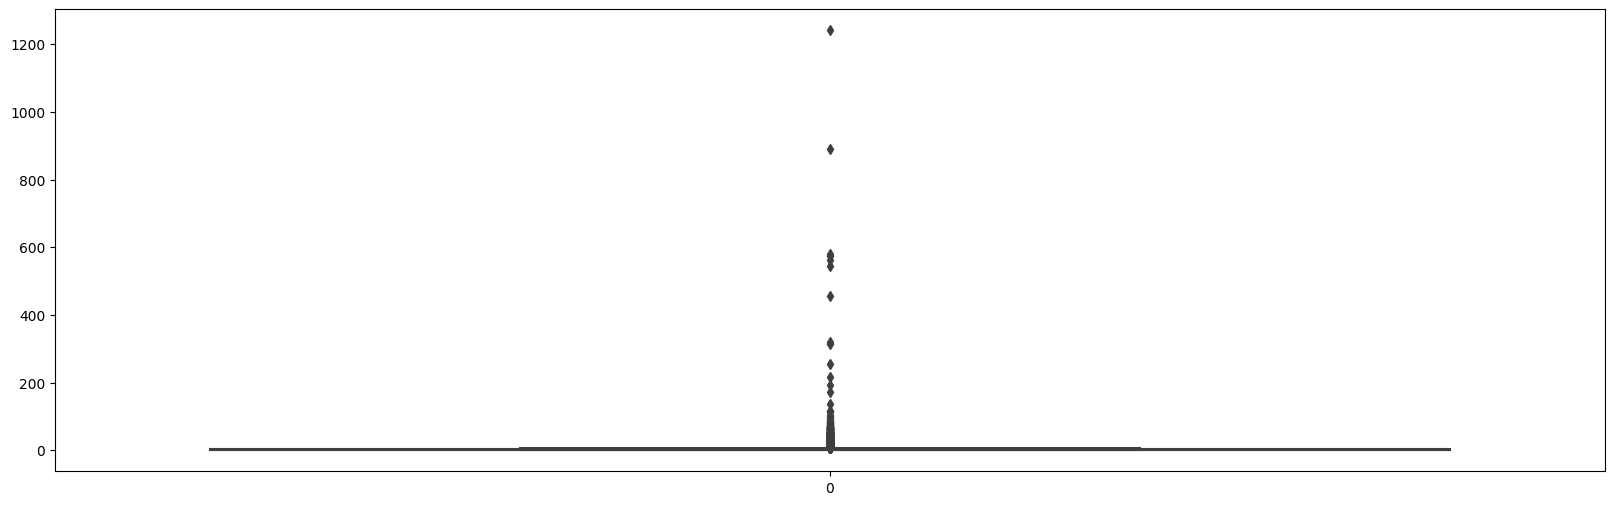

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(taxi_df.distance)
plt.show()

In [ ]:
taxi_df['distance'].mean()

3.4408686547345293

In [ ]:
print(f"There are {taxi_df.distance[taxi_df.distance == 0 ].count()} trip records with 0 distance.")

There are 5897 trip records with 0 distance.


In [ ]:
taxi_df[taxi_df.distance == 0 ].head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
246   id3487442          2 2016-02-29 18:39:12 2016-02-29 18:42:59   
291   id0924324          2 2016-05-10 18:07:52 2016-05-10 18:26:21   
407   id1145809          2 2016-05-16 23:15:13 2016-05-16 23:31:00   
702   id3499387          1 2016-01-25 19:45:12 2016-01-25 19:54:52   
1620  id0753277          1 2016-01-27 22:29:31 2016-01-27 22:29:58   

      passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
246                 1        -73.981819        40.768963         -73.981819   
291                 2        -73.959068        40.775661         -73.959068   
407                 6        -73.808487        40.687336         -73.808487   
702                 1        -73.786720        40.647041         -73.786720   
1620                1        -74.209854        40.816853         -74.209854   

      dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
246          40.768963                  N            227            0      2   
291          40.775661                  N           1109            1      5   
407          40.687336                  N            947            0      5   
702          40.647041                  N            580            0      1   
1620         40.816853                  N             27            2      1   

      pickup_hour  pickup_minute    weekday  distance  speed  
246            18             39     Monday       0.0    0.0  
291            18              7    Tuesday       0.0    0.0  
407            23             15     Monday       0.0    0.0  
702            19             45     Monday       0.0    0.0  
1620           22             29  Wednesday       0.0    0.0

In [ ]:
taxi_df[taxi_df.distance == 0 ].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  5897.000000      5897.000000       5897.000000      5897.000000   
mean      1.620315         1.689842        -73.949353        40.742577   
std       0.485350         1.382786          0.289865         0.170895   
min       1.000000         0.000000        -79.487900        34.359695   
25%       1.000000         1.000000        -73.989883        40.725956   
50%       2.000000         1.000000        -73.972595        40.751202   
75%       2.000000         2.000000        -73.941231        40.769230   
max       2.000000         9.000000        -61.335529        43.911762   

       dropoff_longitude  dropoff_latitude  trip_duration  weekday_num  \
count        5897.000000       5897.000000    5897.000000  5897.000000   
mean          -73.949353         40.742577     535.515347     3.062574   
std             0.289865          0.170895    1952.094051     1.945837   
min           -79.487900         34.359695       1.000000     0.000000   
25%           -73.989883         40.725956      38.000000     1.000000   
50%           -73.972595         40.751202     350.000000     3.000000   
75%           -73.941231         40.769230     724.000000     5.000000   
max           -61.335529         43.911762   86352.000000     6.000000   

             month  pickup_hour  pickup_minute  distance   speed  
count  5897.000000  5897.000000    5897.000000    5897.0  5897.0  
mean      3.524504    13.469222      29.571477       0.0     0.0  
std       1.711696     6.424289      17.311929       0.0     0.0  
min       1.000000     0.000000       0.000000       0.0     0.0  
25%       2.000000     9.000000      15.000000       0.0     0.0  
50%       4.000000    14.000000      30.000000       0.0     0.0  
75%       5.000000    19.000000      44.000000       0.0     0.0  
max       6.000000    23.000000      59.000000       0.0     0.0

* 5897 trip record with distance equal to 0.

**Below are some possible explanation for such records.**

* Customer changed mind and cancelled the journey just after accepting it.

* Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.

* Issue with GPS tracker while the journey is being finished.

* Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start

* Or some other issue with the software itself which a technical guy can explain.

There is some serious inconsistencies in the data where drop off location is same as the pickup location.

We cant think off imputing the distance values considering a correlation with the duration

because the dropoff_location coordinates would not be inline with the distance otherwise.

We will look more to it in bivariate analysis with the Trip duration.

#### Chart - 5

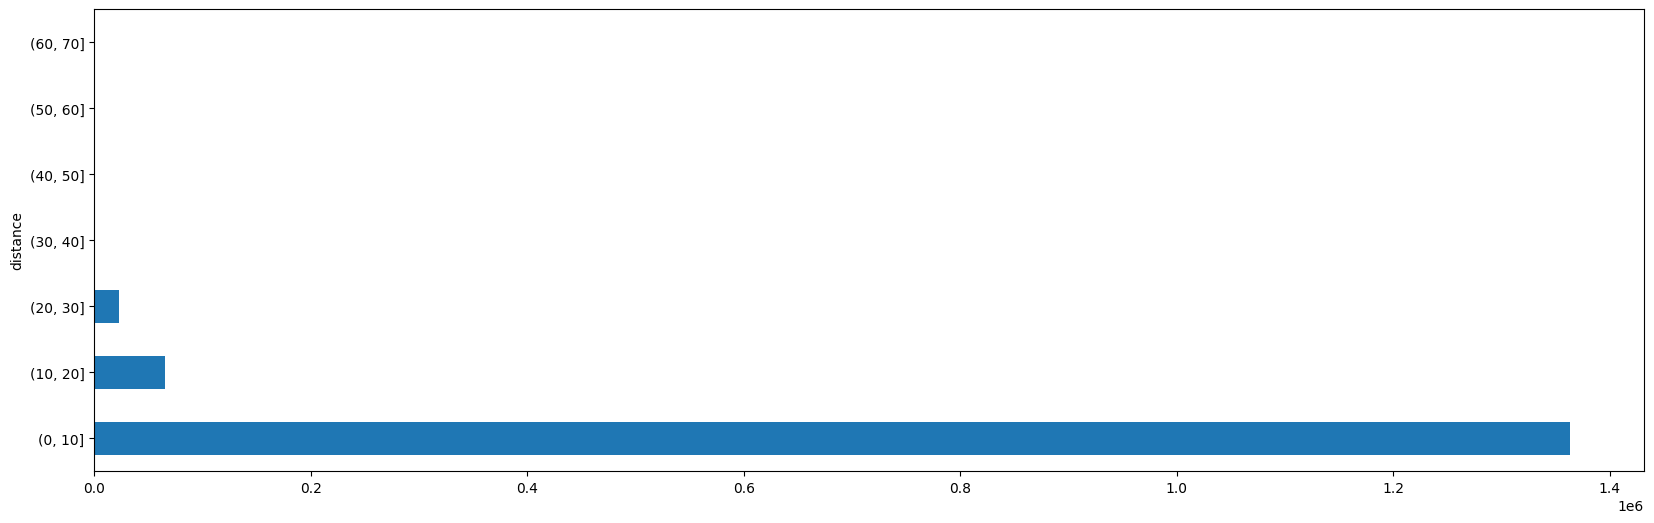

In [ ]:
# Chart - 5 visualization code
taxi_df.distance.groupby(pd.cut(taxi_df.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (20,6))
plt.show()

* From the above observation it is evident that most of the rides are completed between 1-10 km with some of the rides with distances between 10-30 km. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

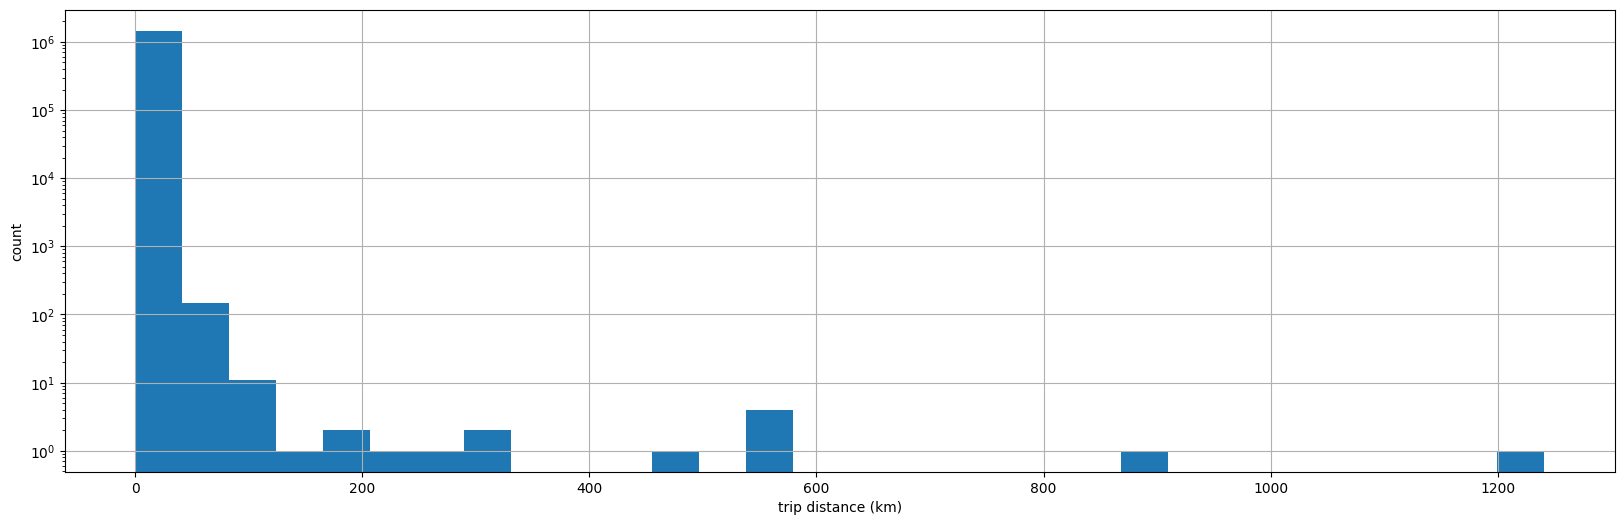

In [ ]:
ax = taxi_df['distance'].hist(bins=30, figsize=(20,6))
ax.set_yscale('log')
ax.set_xlabel("trip distance (km)")
ax.set_ylabel("count")
plt.show()
     

* According to the dustribution of trip distances and the fact that it takes about 50 km to drive across the whole New York City, we decided to use 50 as the number to split the trips into short or long distance trips.

In [ ]:
df_short = taxi_df[taxi_df.distance <= 50].count()
df_long = taxi_df[taxi_df.distance > 50].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total")

Short Trips: 1458556 records in total.
Long Trips: 88 records in total


##### 1. Why did you pick the specific chart?

* Box plots, as previously mentioned, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies. So we choose box plot for visualizing distance data.

* Histograms are a quick and easy way to get a sense of the distribution of your data and use the binned intervals from a histogram to create categorical features for a machine learning model.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with a distance of over 100 km.

* Some trips have a distance value of 0 km, while the average distance traveled is approximately 3.5 km.

* Also there are 1458556 records of Short Trips and 88 records of Long Trip.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the average distance traveled, the company can optimize its pricing strategies by charging appropriately for longer trips.

#### Chart - 6

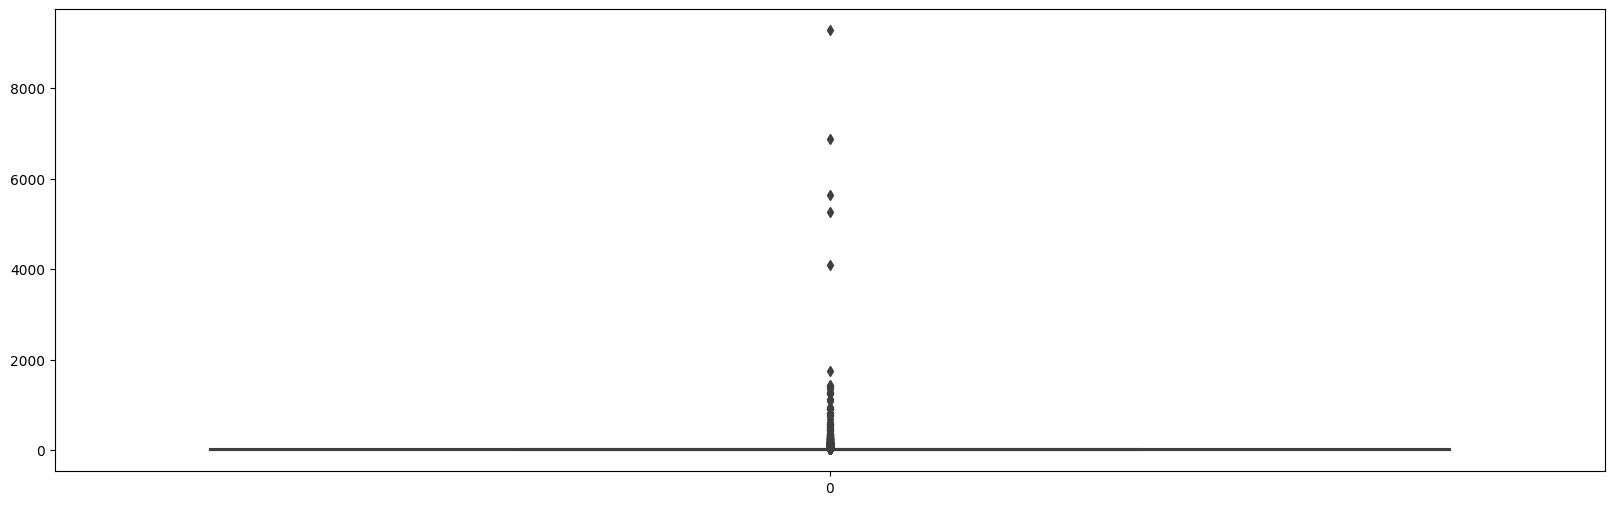

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(taxi_df.speed)
plt.show()
     

* Speed is a function of distance and time. Let's visualize speed in different trips.

* Maximum speed limit in NYC is as follows:

* 25 mph in urban area i.e. 40 kmph

* 65 mph on controlled state highways i.e. 104 kmph

* Many trips were done at a speed of over 200 kmph. Going SuperSonic..!!

* Let's remove them and focus on the trips which were done at less than 104kmph as per the speed limits

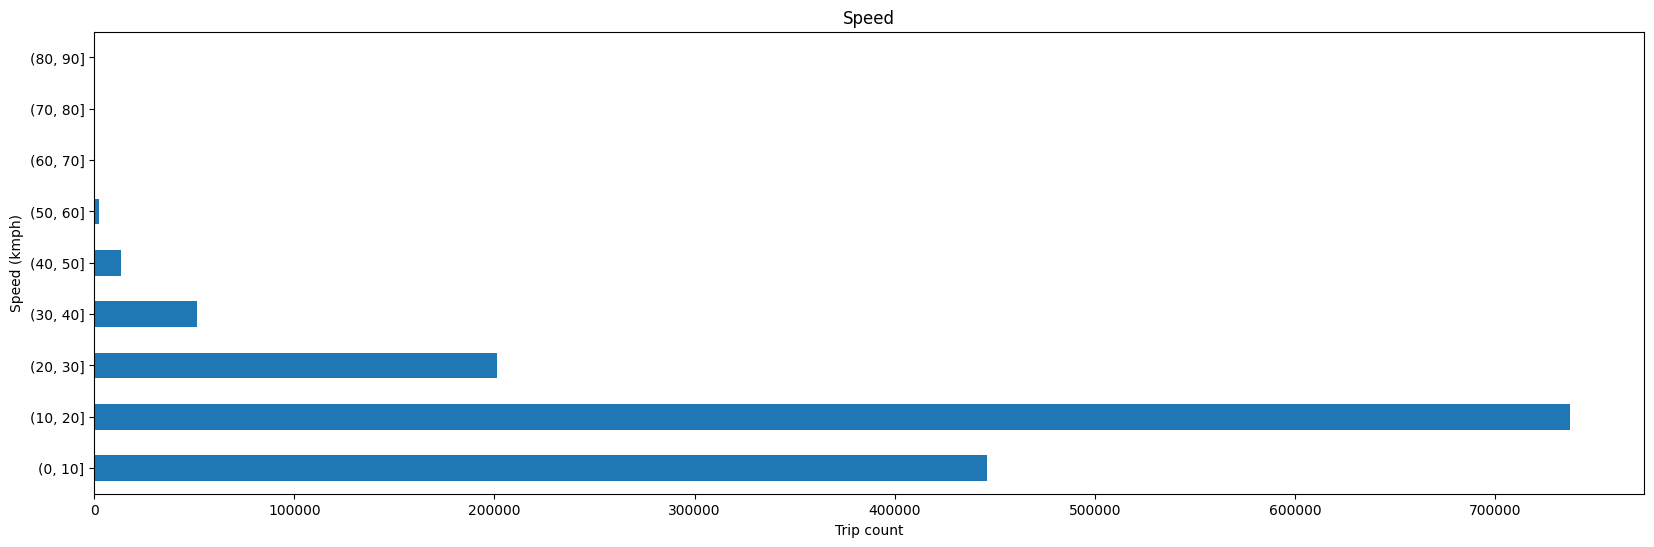

In [ ]:
df = taxi_df[taxi_df.speed <= 104]
df.speed.groupby(pd.cut(df.speed, np.arange(0,100,10))).count().plot(kind = 'barh',figsize = (20,6))
plt.xlabel('Trip count')
plt.ylabel('Speed (kmph)')
plt.title('Speed')
plt.show()

* Trips over 30 kmph are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 kmph on state controlled highways.

* Mostly trips are done at a speed range of 10-20kmph.

##### 1. Why did you pick the specific chart?

* It is a suitable choice for showing the distribution of a categorical variable, in this case the speed ranges of a vehicle.

* Bar plots are often used to compare the values of different categories, and the horizontal orientation in this case makes it easier to compare the trip counts for each speed range. Additionally, the use of a bar plot helps to visualize the distribution of the speeds, making it easier to see how many trips fall into each speed range.

##### 2. What is/are the insight(s) found from the chart?

* It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 10-20 kmph.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Are there any insights that lead to negative growth? Justify with specific reason.

* If there are any trips with abnormally high speeds, this could indicate a potential issue with the data or an error in recording the speed. This information could help to improve the accuracy of the data used for the prediction model.

* The speed distribution could give an idea of the average speed of vehicles in different regions or at different times of day, which could be useful in making predictions about trip times.

In [ ]:
taxi_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  weekday_num  month  \
0         40.765602                  N            455            0      3   
1         40.731152                  N            663            6      6   
2         40.710087                  N           2124            1      1   
3         40.706718                  N            429            2      4   
4         40.782520                  N            435            5      3   

   pickup_hour  pickup_minute    weekday  distance      speed  
0           17             24     Monday  1.498523  11.856445  
1            0             43     Sunday  1.805510   9.803672  
2           11             35    Tuesday  6.385107  10.822216  
3           19             32  Wednesday  1.485500  12.465738  
4           13             30   Saturday  1.188590   9.836608

#### Chart - 7

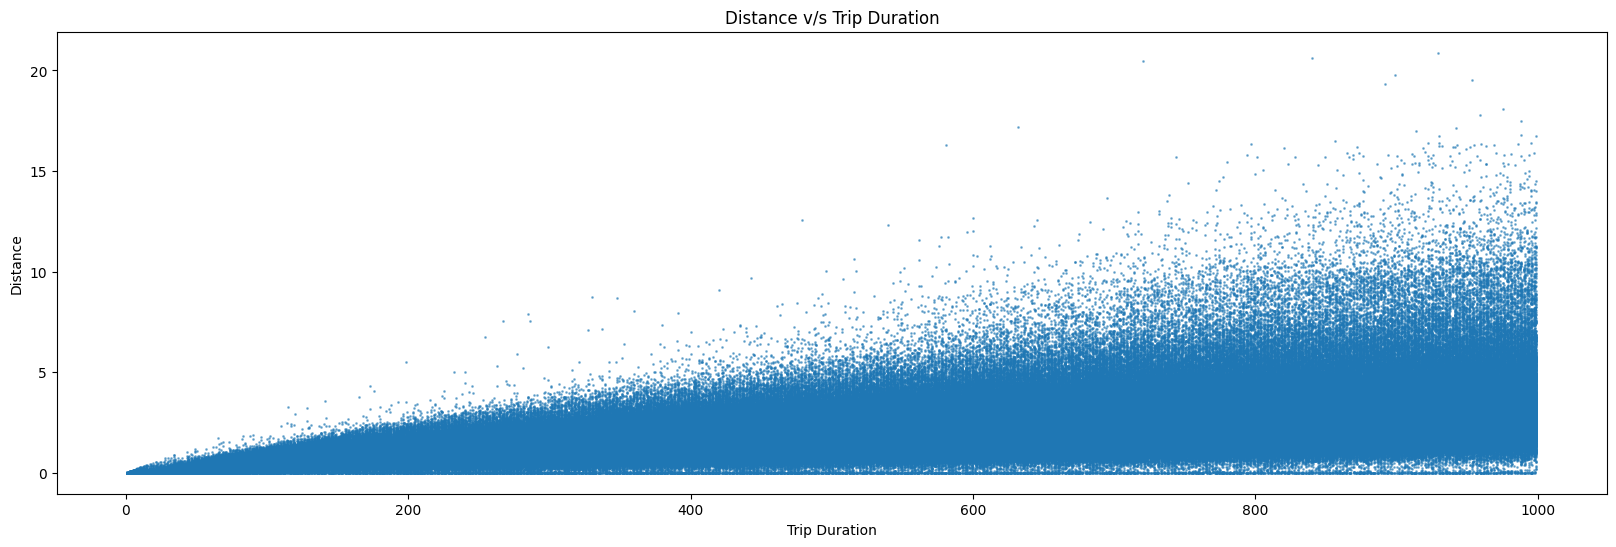

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (20,6))
dur_dist = taxi_df.loc[(df.distance < 50) & (taxi_df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this specific chart because it displays the relationship between the distance covered by the trip and the trip duration. The scatter plot helps to visualize the distribution of the data points and highlight any patterns or trends that may exist between the two variables. This helps to gain insights about the relationship between distance and trip duration and whether there is any correlation between the two variables. The chart was generated after filtering the data to only include trips with a distance of less than 50 km and a trip duration of less than 1000 seconds, to eliminate any outliers that could distort the relationship between the two variables.

##### 2. What is/are the insight(s) found from the chart?

* The correlation between distance covered and trip duration should have been linear, but as seen in the chart, there is a cluster of trips in the lower right corner which indicate inconsistencies in the data.

* To make the data more consistent for predictive modeling, it would be appropriate to remove trips that covered no distance but lasted more than a minute.

* This can be assumed that these trips were cancelled after booking and thus should not have taken more than a minute.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the correlation between distance and trip duration can help create a positive business impact by improving the accuracy of predictive models used to optimize operations and estimate costs. By removing trips that covered no distance but lasted more than a minute, the data will become more consistent and accurate, allowing for more reliable predictions and better decision making.

* There are no insights that lead to negative growth in this case. On the contrary, improving the quality of the data will likely lead to improved performance and growth.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
taxi_df.corr()

vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.287415          0.007820   
passenger_count     0.287415         1.000000          0.002169   
pickup_longitude    0.007820         0.002169          1.000000   
pickup_latitude     0.001742        -0.005125          0.022568   
dropoff_longitude   0.001528        -0.000343          0.783582   
dropoff_latitude    0.004496        -0.002762          0.100190   
trip_duration       0.020304         0.008471          0.026542   
weekday_num         0.001311         0.025191         -0.016356   
month              -0.006221        -0.002143          0.004474   
pickup_hour         0.009299         0.009101          0.010150   
pickup_minute      -0.000388         0.000961         -0.002597   
distance            0.008109         0.010306          0.259780   
speed               0.002106        -0.001423          0.089845   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.001742           0.001528          0.004496   
passenger_count          -0.005125          -0.000343         -0.002762   
pickup_longitude          0.022568           0.783582          0.100190   
pickup_latitude           1.000000           0.114884          0.494038   
dropoff_longitude         0.114884           1.000000          0.124873   
dropoff_latitude          0.494038           0.124873          1.000000   
trip_duration            -0.029204           0.014678         -0.020677   
weekday_num              -0.028976          -0.001130         -0.021762   
month                    -0.001439           0.004758         -0.000607   
pickup_hour               0.010603          -0.022455          0.013612   
pickup_minute             0.001427          -0.002603          0.001961   
distance                 -0.210354           0.134033         -0.142128   
speed                    -0.014251           0.046276         -0.049597   

                   trip_duration  weekday_num     month  pickup_hour  \
vendor_id               0.020304     0.001311 -0.006221     0.009299   
passenger_count         0.008471     0.025191 -0.002143     0.009101   
pickup_longitude        0.026542    -0.016356  0.004474     0.010150   
pickup_latitude        -0.029204    -0.028976 -0.001439     0.010603   
dropoff_longitude       0.014678    -0.001130  0.004758    -0.022455   
dropoff_latitude       -0.020677    -0.021762 -0.000607     0.013612   
trip_duration           1.000000    -0.000708  0.006607     0.003690   
weekday_num            -0.000708     1.000000 -0.014544    -0.084255   
month                   0.006607    -0.014544  1.000000    -0.003438   
pickup_hour             0.003690    -0.084255 -0.003438     1.000000   
pickup_minute          -0.002338     0.000783 -0.001066    -0.003128   
distance                0.094777     0.007599  0.015667    -0.015813   
speed                  -0.018508     0.035767 -0.015999    -0.052475   

                   pickup_minute  distance     speed  
vendor_id              -0.000388  0.008109  0.002106  
passenger_count         0.000961  0.010306 -0.001423  
pickup_longitude       -0.002597  0.259780  0.089845  
pickup_latitude         0.001427 -0.210354 -0.014251  
dropoff_longitude      -0.002603  0.134033  0.046276  
dropoff_latitude        0.001961 -0.142128 -0.049597  
trip_duration          -0.002338  0.094777 -0.018508  
weekday_num             0.000783  0.007599  0.035767  
month                  -0.001066  0.015667 -0.015999  
pickup_hour            -0.003128 -0.015813 -0.052475  
pickup_minute           1.000000 -0.008003  0.000141  
distance               -0.008003  1.000000  0.485283  
speed                   0.000141  0.485283  1.000000

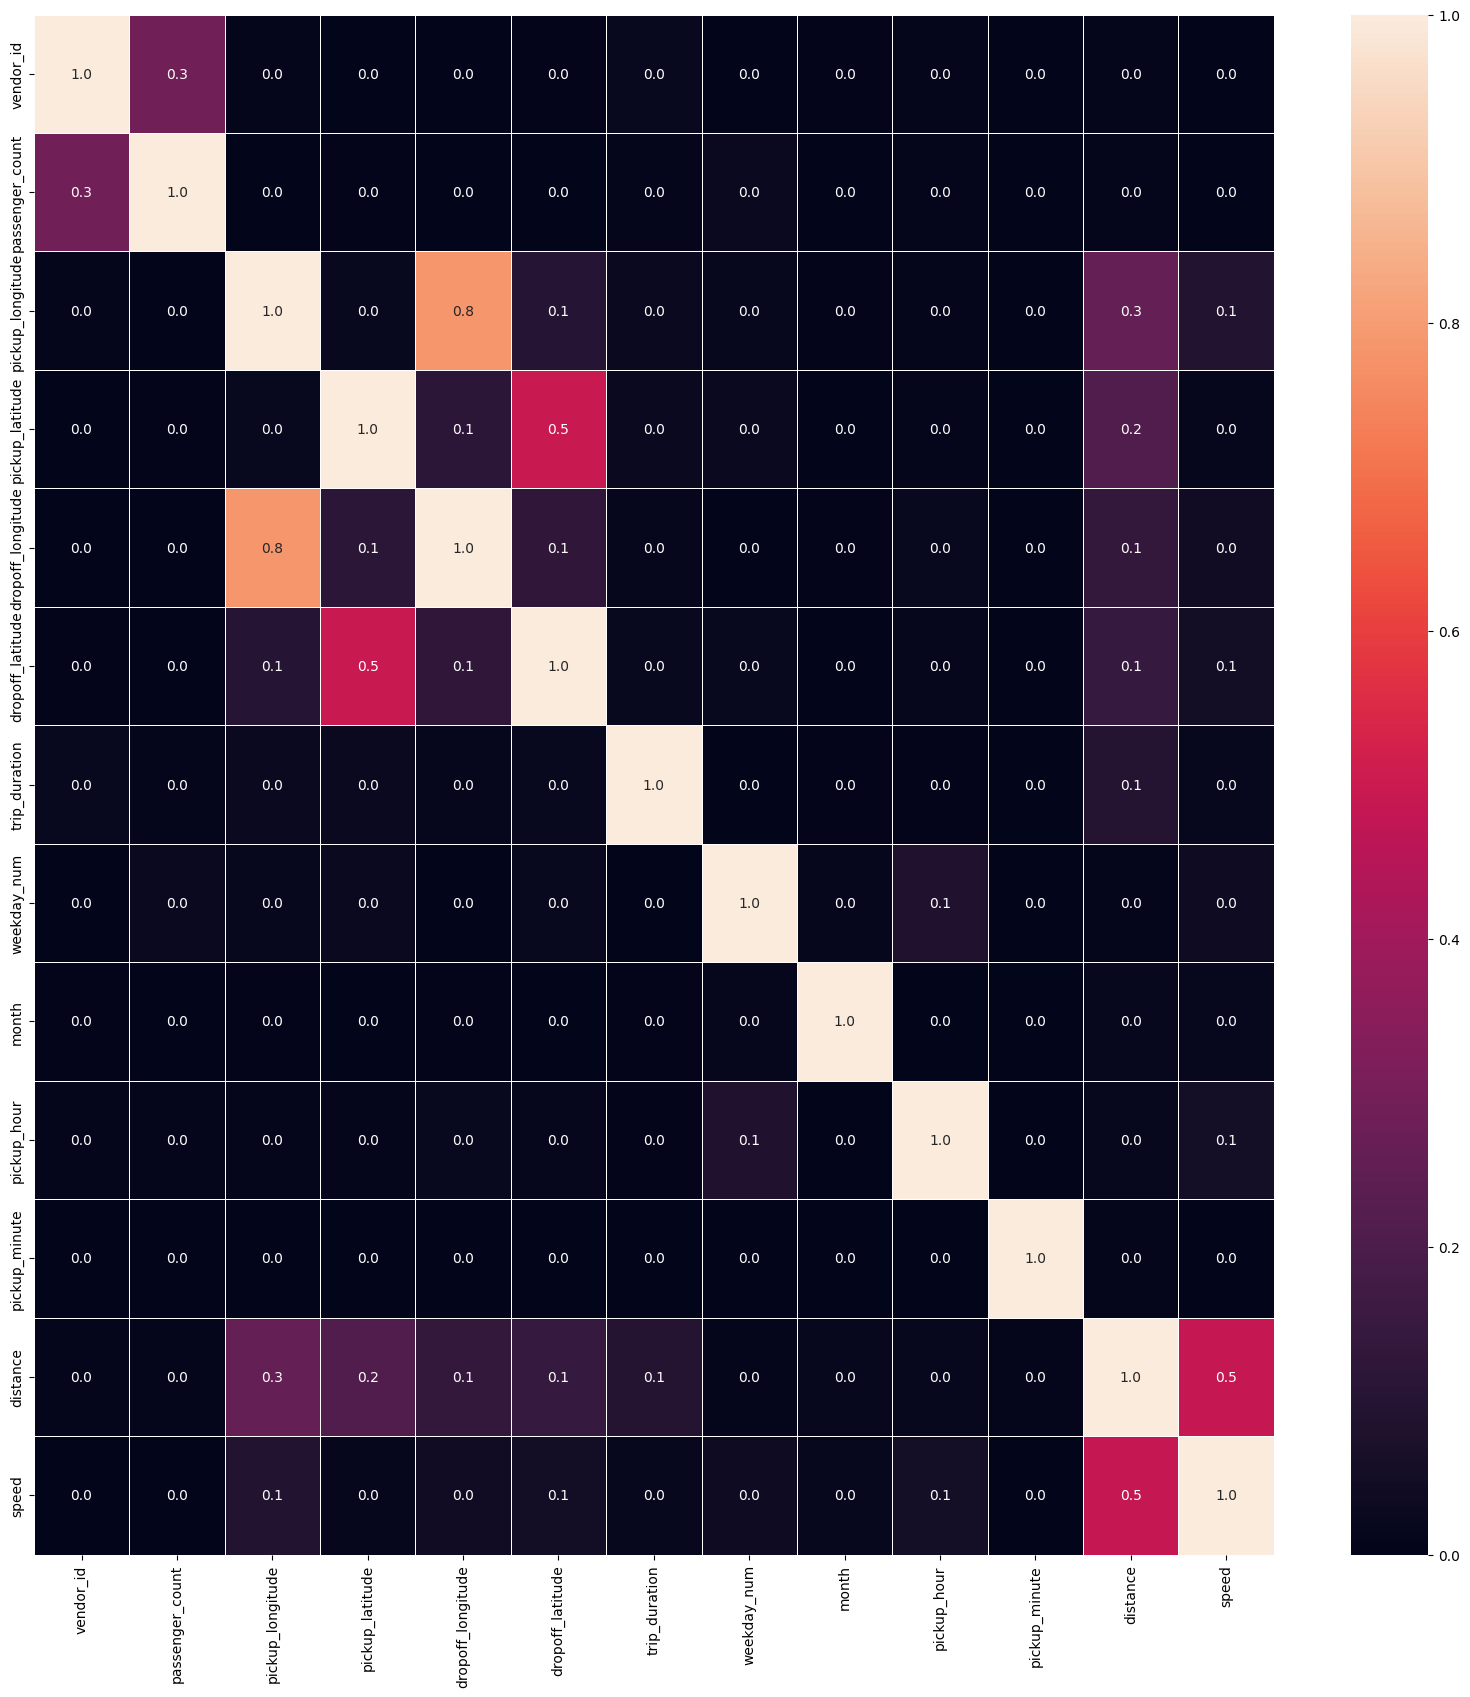

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(abs(round(taxi_df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

* The heatmap was picked because it provides a quick visual representation of the correlation between different variables in the dataset. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.

* The heatmap makes it easy to see the strength and direction of the relationship between the different variables, and can help identify which variables are highly correlated with each other and which are not.

##### 2. What is/are the insight(s) found from the chart?

* Passenger count and vendor ID has positive correaltion of 30%.

* Dropoff longitude and pickup longitude has strong positive correlation of 80%.

* Dropoff latitude and pickup latitude has moderate positive correaltion of 50%.

* Trip duration and pickup longitude has weak correlation of 3%.

* Trip duration and pickup latitude has weak negative correlation of 3%.

* Distance and pickup longitude has weak correlation of 30%.

* Speed has weak correaltion of 10-20% with both pickup and droppoff longitude.

* Speed and distance has strong positive correaltion of 60%.

* Trip duration is positively correlated with distance with 10% of correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: Weekends has more traffic as compared to week days.

Hypothesis 2: Traffic hours on weekdays are different than traffic hours on weekends.

Hypothesis 3: Passengers which are travelling at a time is changing with change in vendor.

### Hypothetical Statement - 1 Weekends has more traffic as compared to week days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : mean of count of trips on weekday <= mean of mean of count of trips on weekend day

H1 : mean of count of trips on weekday > mean of mean of count of trips on weekend day

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

taxi_df['pickup_date'] =pd.to_datetime(taxi_df["pickup_datetime"]).dt.normalize()

In [ ]:
dfweekday = pd.DataFrame(taxi_df.pickup_date.value_counts())
dfweekday.reset_index(inplace=True)
dfweekday.rename(columns={'index':'date','pickup_date':'count'},inplace=True) 

dfweekday['pickup_weekday'] = dfweekday.apply(lambda row: row['date'].strftime("%A"),axis=1) #Monday=1

In [ ]:
dfweekday.head()

date  count pickup_weekday
0 2016-04-09   9796       Saturday
1 2016-04-16   9602       Saturday
2 2016-03-05   9597       Saturday
3 2016-04-02   9325       Saturday
4 2016-02-13   9309       Saturday

In [ ]:
cnt = list(dfweekday['count'])
weekday = list(dfweekday['pickup_weekday'])

In [ ]:
weekd = []
weekn = []
for i in range(len(cnt)):
  if weekday[i] in ['Saturday','Sunday']:
    weekn.append(cnt[i])
  else:
    weekd.append(cnt[i])

In [ ]:
from scipy.stats import ttest_ind  
    
def t_test(x,y,alternative='both-sided'):
        _, double_p = ttest_ind(x,y,equal_var = False)
        if alternative == 'both-sided':
            pval = double_p
        elif alternative == 'greater':
            if np.mean(x) > np.mean(y):
                 pval = double_p/2.
            else:
                 pval = 1.0 - double_p/2.
        elif alternative == 'less':
            if np.mean(x) < np.mean(y):
                 pval = double_p/2.
            else:
              pval = 1.0 - double_p/2.

        op = 'Hence we are failed to reject null hypothesis (H0) for significane level 0.05'
        if pval < 0.05:
          op = 'Hence we are rejecting null hypothesis (H0) for significane level 0.05 '
        return (f'P-Value: {pval}, {op}')

In [ ]:
t_test(x=weekn,y=weekd,alternative='greater')

'P-Value: 0.5273450567684739, Hence we are failed to reject null hypothesis (H0) for significane level 0.05'

* Hypothesis 1 Conclusion: Number of trips on weekends are comparatively more than number of trips on weekdays.

##### Which statistical test have you done to obtain P-Value?

* The statistical test performed in the code is a two-sample t-test. The p-value is obtained using the ttest_ind function from the scipy.stats module.

* The function returns the p-value and a statement indicating whether or not the null hypothesis (the means of x and y are equal) can be rejected at a significance level of 0.05 based on the p-value.

##### Why did you choose the specific statistical test?

* The specific statistical test chosen is the two-sample t-test, which is appropriate for comparing the means of two independent datasets. The t-test is a commonly used test for comparing the means of two groups, especially when the sample size is small and the population standard deviation is unknown. The ttest_ind function from the scipy.stats module is used to perform the t-test in this code.

### Hypothetical Statement - 2 Traffic hours on weekdays are different than traffic hours on weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : Traffic hours on weekdays are same as traffic hours on weekends.

H1 : Traffic hours on weekdays are different than traffic hours on weekends.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
dftraffic = taxi_df[['weekday','pickup_hour']]
weekd = []
for i in dftraffic['weekday']:
  if i in ['Saturday','Sunday']:
    weekd.append('Weekend')
  else:
    weekd.append('Weekday')
dftraffic['weekd'] = weekd
     

In [ ]:
dftraffic.head()

weekday  pickup_hour    weekd
0     Monday           17  Weekday
1     Sunday            0  Weekend
2    Tuesday           11  Weekday
3  Wednesday           19  Weekday
4   Saturday           13  Weekend

In [ ]:
new_df = pd.crosstab(dftraffic.pickup_hour,dftraffic.weekd)
new_df= pd.DataFrame(new_df)
new_df.reset_index(inplace=True)
new_df['Total'] = new_df['Weekday'] + new_df['Weekend']
new_df = new_df.iloc[0:24,:]
new_df.set_index('pickup_hour',inplace=True)
new_df.loc['Total'] = new_df.iloc[:, :].sum()

In [ ]:
new_df

weekd        Weekday  Weekend    Total
pickup_hour                           
0              29210    24038    53248
1              17722    20849    38571
2              11150    16822    27972
3               7992    12903    20895
4               7443     8349    15792
5              11043     3959    15002
6              28564     4684    33248
7              49029     6571    55600
8              57240     9813    67053
9              53427    14236    67663
10             47348    18089    65437
11             48096    20380    68476
12             50002    21871    71873
13             49492    21981    71473
14             52829    21463    74292
15             50749    21062    71811
16             44501    19812    64313
17             54518    21965    76483
18             66579    24021    90600
19             67213    23095    90308
20             63708    20364    84072
21             64074    20111    84185
22             60229    20263    80492
23             50252    19533    69785
Total        1042410   416234  1458644

* As we are analysing two categorical variables, here We are going to use chi-squre test of independance.

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new_df.index.unique()
columns = new_df.columns.unique()
for i in columns:
    for j in rows:
        O = new_df[i][j]
        E = new_df[i]['Total'] * new_df['Total'][j] / new_df['Total']['Total']
        chi_square += (O-E)**2/E

In [ ]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 71632.5740640699  and p value is: 0.0
Null Hypothesis is rejected.


* Hypothesis 2 Conclusion: Traffic hours on weekdays are different than traffic hours on weekends.

##### Which statistical test have you done to obtain P-Value?

* The code performs a chi-square test of independence to obtain the p-value. The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. The p-value is a measure of the significance of the test, and a small p-value (less than the significance level, alpha) indicates that the association between the two variables is statistically significant and the null hypothesis (that the two variables are same) can be rejected.

##### Why did you choose the specific statistical test?

* The specific statistical test, the chi-square test of independence, was chosen because it is used to determine if there is a significant association between two categorical variables.

### Hypothetical Statement - 3 Passengers which are travelling at a time is changing with change in vendor.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : 'passenger_count' and 'vendor_id' has no relationship.

H1 : 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

new = pd.crosstab(taxi_df.passenger_count,taxi_df.vendor_id)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new[1] + new[2]
new = new.iloc[1:7,:]
new.set_index('passenger_count',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()

In [ ]:
new

vendor_id             1       2    Total
passenger_count                         
1                550787  482753  1033540
2                 92142  118176   210318
3                 22942   36954    59896
4                 11944   16460    28404
5                   344   77744    78088
6                   152   48181    48333
Total            678311  780268  1458579

In [ ]:
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E
        

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 129648.47796137253  and p value is: 0.0
Null Hypothesis is rejected.


In [ ]:
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 129648.47796137253  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


* Hypothesis 3 Conclusion: Passenger count and vendor id has relationship

##### Which statistical test have you done to obtain P-Value?

* The statistical test performed to obtain the p-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

* The test works by comparing the observed frequencies in each category of the variables to the expected frequencies that would be seen if the variables were independent. The resulting Chi-Square statistic is used to calculate a p-value, which is used to make a decision about whether to reject or fail to reject the null hypothesis. In this case, the null hypothesis is that the two variables (passenger_count and vendor_id) are independent.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
weekday_num           0
month                 0
pickup_hour           0
pickup_minute         0
weekday               0
distance              0
speed                 0
pickup_date           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Our analysis revealed that there are no missing values, so no records need to be imputed. However, there are several outliers present in the Speed, Distance, and Trip Duration columns.

### 2. Handling Outliers

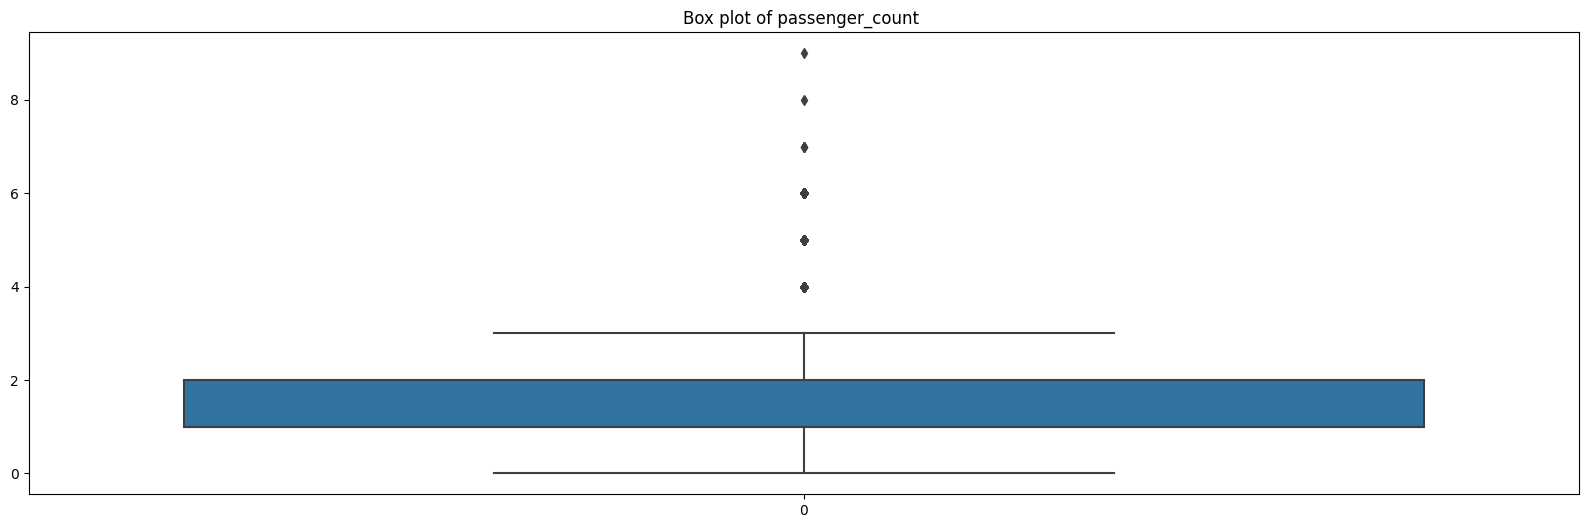

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(20,6))
plt.title("Box plot of passenger_count ")
ax = sns.boxplot(data=taxi_df['passenger_count'])

In [ ]:
percentile_q1_passenger_count = np.percentile(taxi_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(taxi_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(taxi_df['passenger_count'],75)
print(percentile_q3_passenger_count)
     

1.0
1.0
2.0


In [ ]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
taxi_df=taxi_df[taxi_df['passenger_count'] > 0]

In [ ]:
taxi_df=taxi_df[taxi_df['passenger_count'] < upper_limit_outlier_passenger_count]

In [ ]:
taxi_df.shape

(1303754, 19)

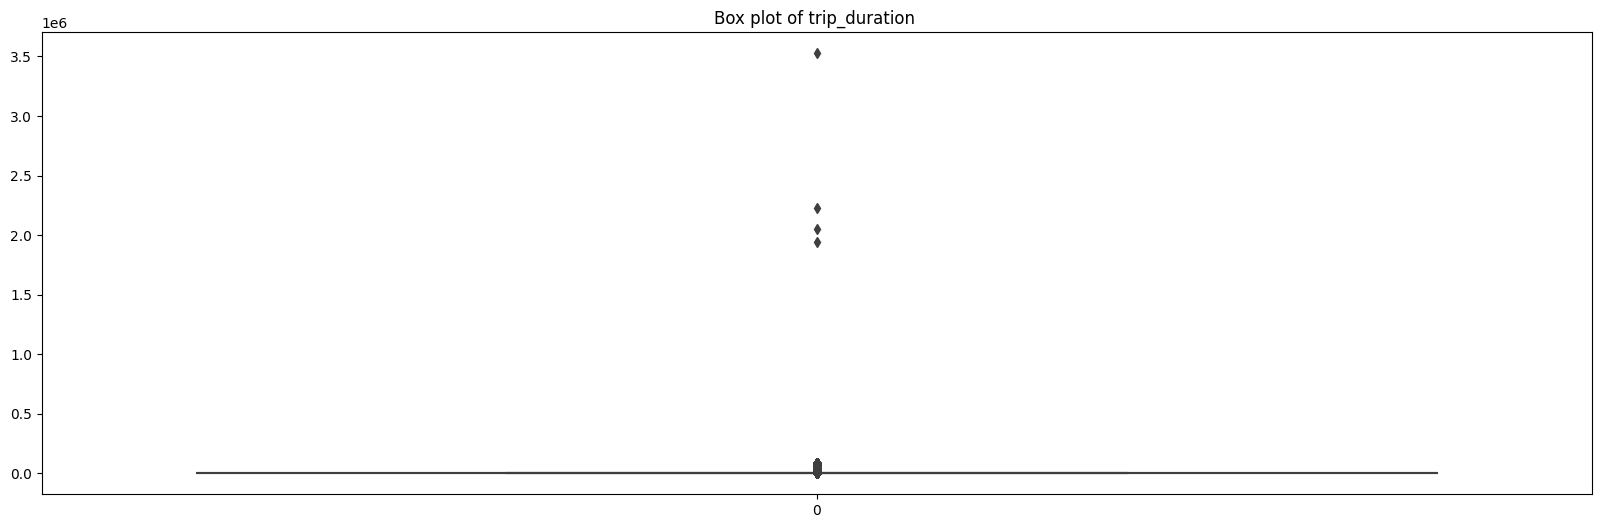

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Box plot of trip_duration ")
ax = sns.boxplot(data=taxi_df['trip_duration'], orient="v")
     

In [ ]:
percentile_q1_trip_duration = np.percentile(taxi_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(taxi_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(taxi_df['trip_duration'],75)
print(percentile_q3_trip_duration)
     

396.0
661.0
1073.0


In [ ]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)
     

lower limit for outlier  : -619.5
Upper limit for outlier  : 2088.5


In [ ]:
taxi_df=taxi_df[taxi_df['trip_duration'] > 0]

In [ ]:
taxi_df=taxi_df[taxi_df['trip_duration'] < upper_limit_outlier_trip_duration]

In [ ]:
taxi_df.shape

(1237728, 19)

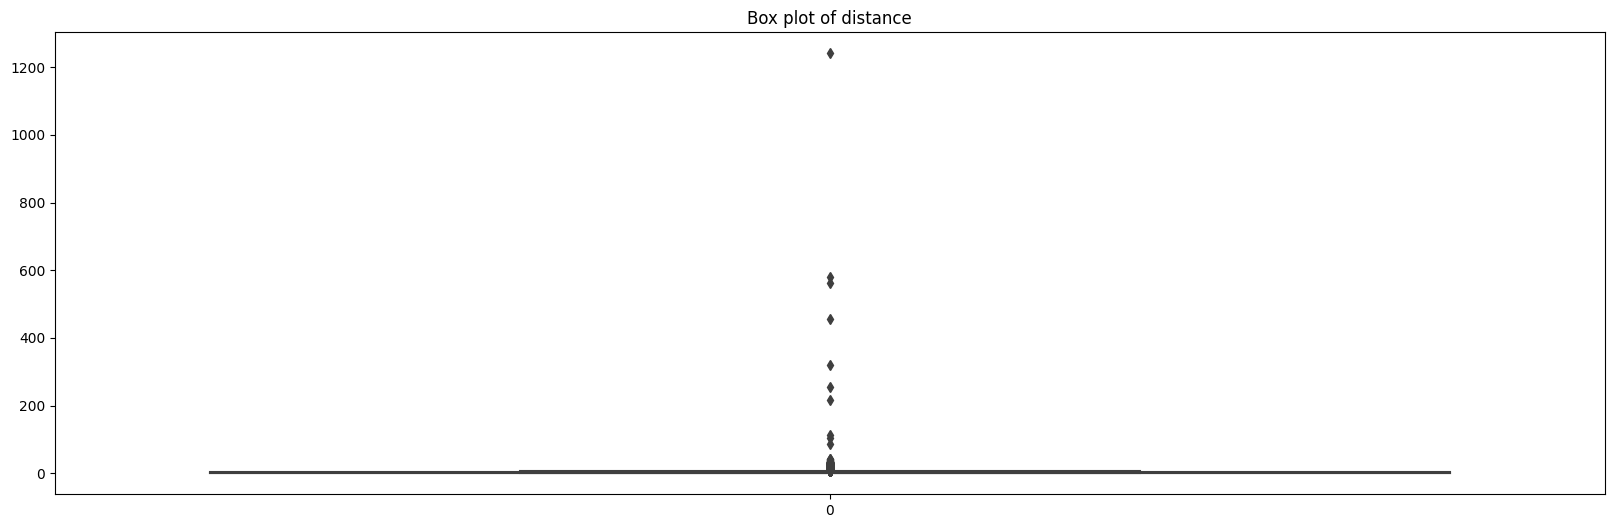

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['distance'], orient="v")

In [ ]:
percentile_q1 = np.percentile(taxi_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['distance'],75)
print(percentile_q3)

1.1973576254809255
1.9915931411045724
3.4822680280086047


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.2300079783105935
Upper limit for outlier  : 6.909633631800124


In [ ]:

taxi_df=taxi_df[taxi_df['distance'] > lower_limit_outlier]
     

In [ ]:
taxi_df=taxi_df[taxi_df['distance'] < upper_limit_outlier]

In [ ]:
taxi_df.shape

(1141698, 19)

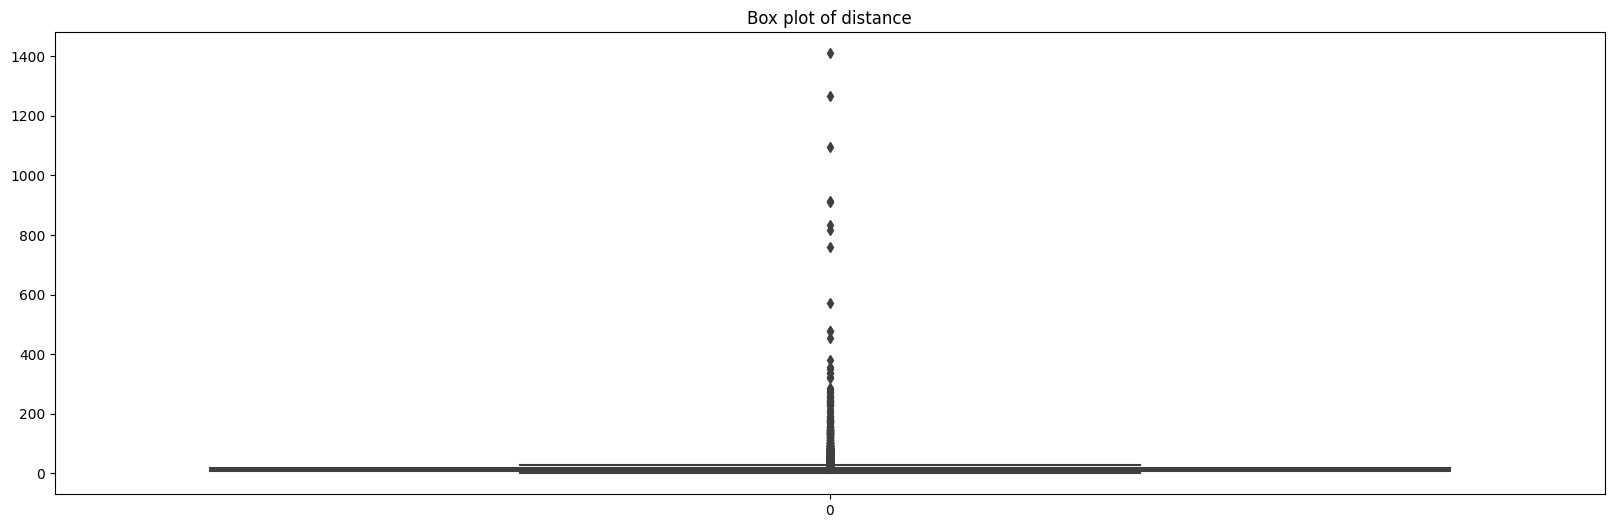

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['speed'], orient="v")

In [ ]:
percentile_q1 = np.percentile(taxi_df['speed'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['speed'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['speed'],75)
print(percentile_q3)

8.79523229479518
12.086872572174158
16.296326370446682


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.456408818682071
Upper limit for outlier  : 27.547967483923934


In [ ]:
taxi_df=taxi_df[taxi_df['speed'] > lower_limit_outlier]

In [ ]:

taxi_df=taxi_df[taxi_df['speed'] < upper_limit_outlier]

In [ ]:
taxi_df.shape

(1105941, 19)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* The outlier treatment technique used in the code is Interquartile range (IQR) method. The IQR method involves calculating the first quartile (25th percentile), second quartile (50th percentile), and third quartile (75th percentile) of the variable. The interquartile range (IQR) is calculated by subtracting the first quartile from the third quartile. Then, lower and upper bounds for outliers are defined as 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile respectively. Finally, the data is filtered by removing all the observations that are below the lower limit or above the upper limit, as they are considered outliers.

* This technique was used because it is a commonly used method to identify and handle outliers, as it is based on the distribution of the data and it eliminates outliers that are beyond the range of normal values in the dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday_num', 'month', 'pickup_hour', 'pickup_minute',
       'weekday', 'distance', 'speed', 'pickup_date'],
      dtype='object')

In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
df= pd.get_dummies(taxi_df, columns=['store_and_fwd_flag','passenger_count','vendor_id'],prefix=['flag','passenger_count','vendor_id']) 
     

In [ ]:
df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602            455   
1        40.738564         -73.999481         40.731152            663   
3        40.719971         -74.012268         40.706718            429   
4        40.793209         -73.972923         40.782520            435   
7        40.797779         -73.922470         40.760559           1551   

   weekday_num  month  ...  distance      speed pickup_date  flag_N  flag_Y  \
0            0      3  ...  1.498523  11.856445  2016-03-14       1       0   
1            6      6  ...  1.805510   9.803672  2016-06-12       1       0   
3            2      4  ...  1.485500  12.465738  2016-04-06       1       0   
4            5      3  ...  1.188590   9.836608  2016-03-26       1       0   
7            5      5  ...  5.714989  13.264964  2016-05-21       1       0   

  passenger_count_1  passenger_count_2  passenger_count_3  vendor_id_1  \
0                 1                  0                  0            0   
1                 1                  0                  0            1   
3                 1                  0                  0            0   
4                 1                  0                  0            0   
7                 1                  0                  0            0   

   vendor_id_2  
0            1  
1            0  
3            1  
4            1  
7            1  

[5 rows x 23 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

* The categorical encoding technique used here is one-hot encoding, which is also known as dummy encoding. The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format.

* One-hot encoding transforms each categorical value into a new categorical value and assigns a binary value of 1 or 0. It creates a new column for each unique category value, where the value in the column is 1 if the category is present in the original data and 0 otherwise. This is useful for handling categorical data in a machine learning model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* From above columns we have already created distance column by using pickup and dropoff lattitudes and longitudes.

* We have already created speed column by using distance and trip duration.

* By extracting, we have created pickup weekday, month, weekday num, pickup hour, pickup minute column from date time columns

* Now we will create one more feature i.e. trip direction using latitudes and longitudes.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
import math
"Creating a function to get the bearing"
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [ ]:
df['trip_direction'] = df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [ ]:
df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602            455   
1        40.738564         -73.999481         40.731152            663   
3        40.719971         -74.012268         40.706718            429   
4        40.793209         -73.972923         40.782520            435   
7        40.797779         -73.922470         40.760559           1551   

   weekday_num  month  ...      speed  pickup_date flag_N  flag_Y  \
0            0      3  ...  11.856445   2016-03-14      1       0   
1            6      6  ...   9.803672   2016-06-12      1       0   
3            2      4  ...  12.465738   2016-04-06      1       0   
4            5      3  ...   9.836608   2016-03-26      1       0   
7            5      5  ...  13.264964   2016-05-21      1       0   

   passenger_count_1 passenger_count_2  passenger_count_3  vendor_id_1  \
0                  1                 0                  0            0   
1                  1                 0                  0            1   
3                  1                 0                  0            0   
4                  1                 0                  0            0   
7                  1                 0                  0            0   

   vendor_id_2  trip_direction  
0            1       99.970196  
1            0      242.846232  
3            1      187.262300  
4            1      179.473585  
7            1      136.385396  

[5 rows x 24 columns]

#### 2. Feature Selection

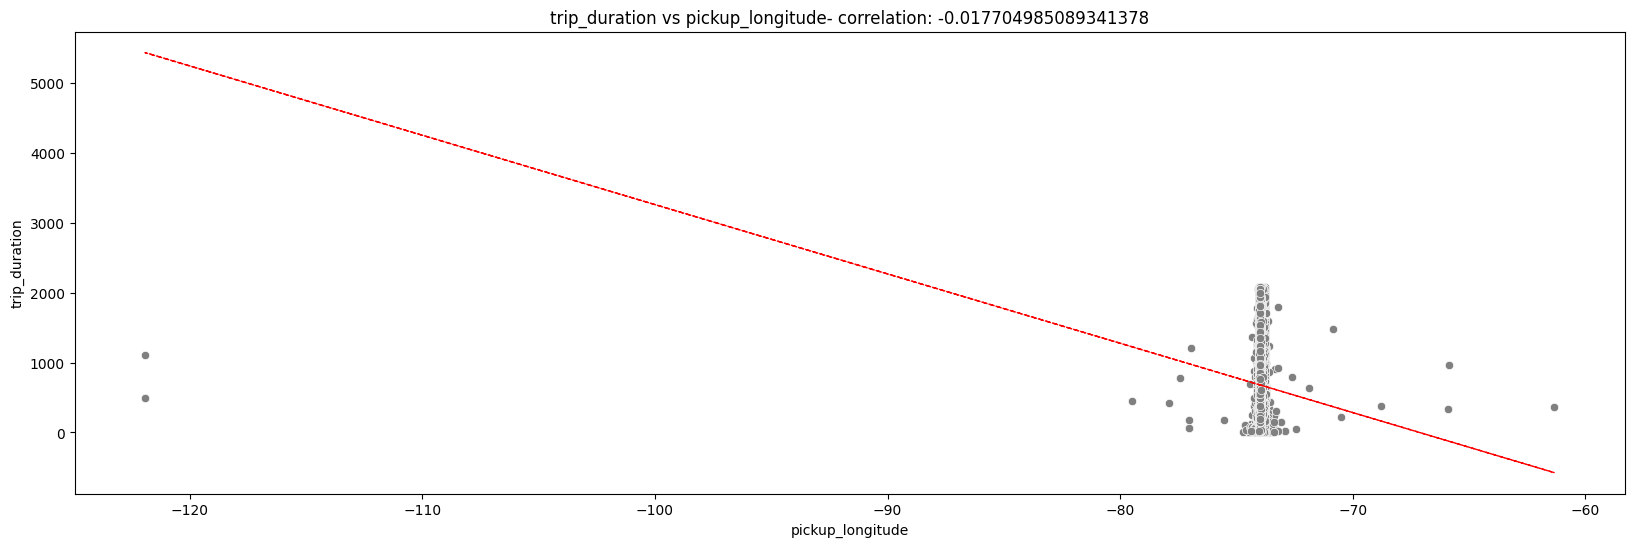

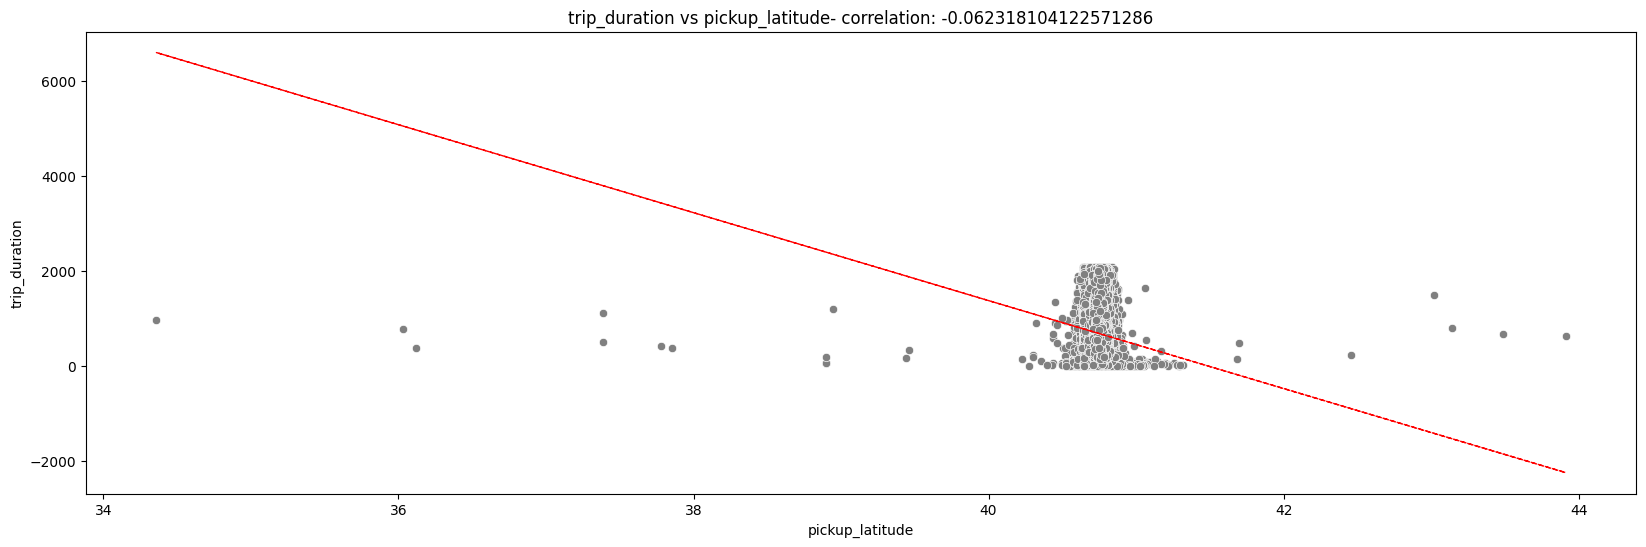

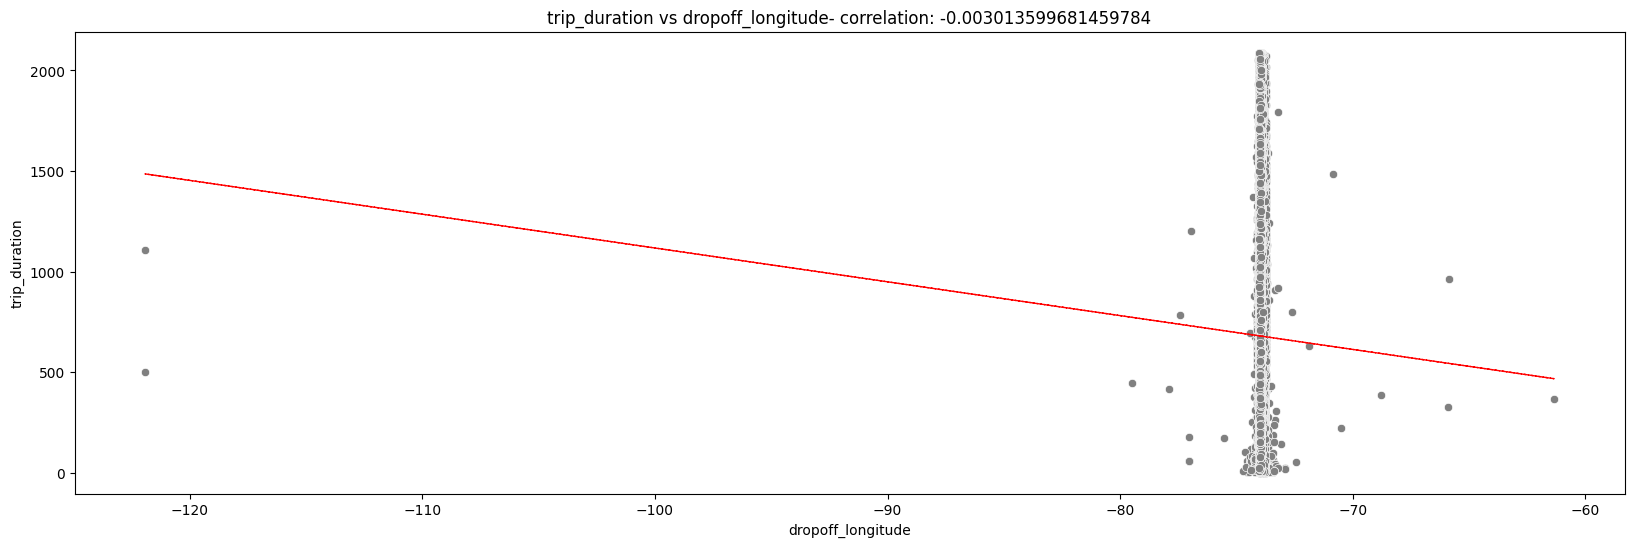

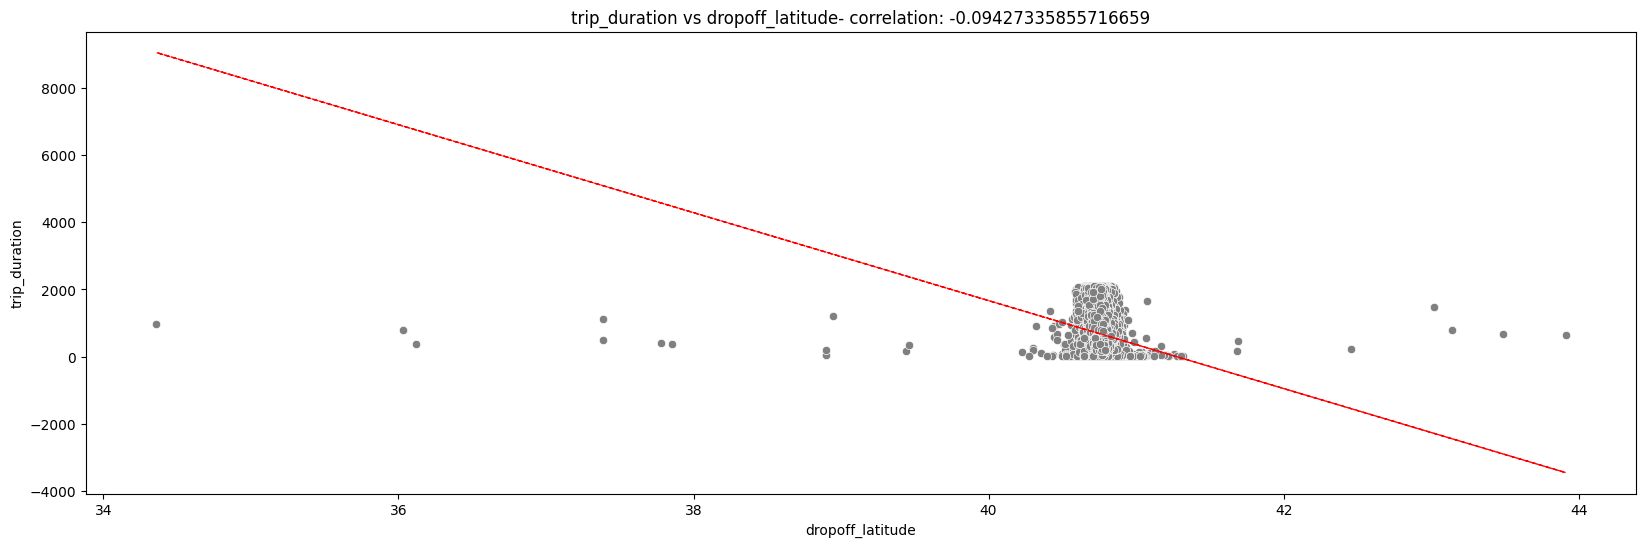

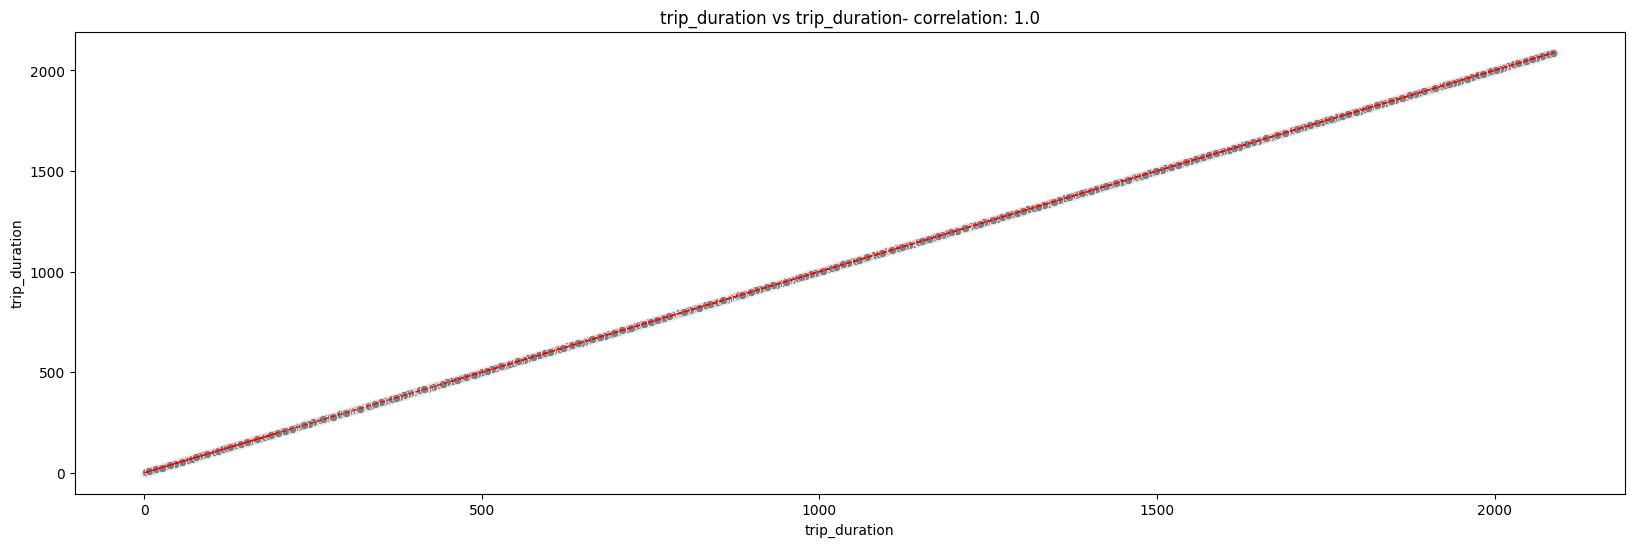

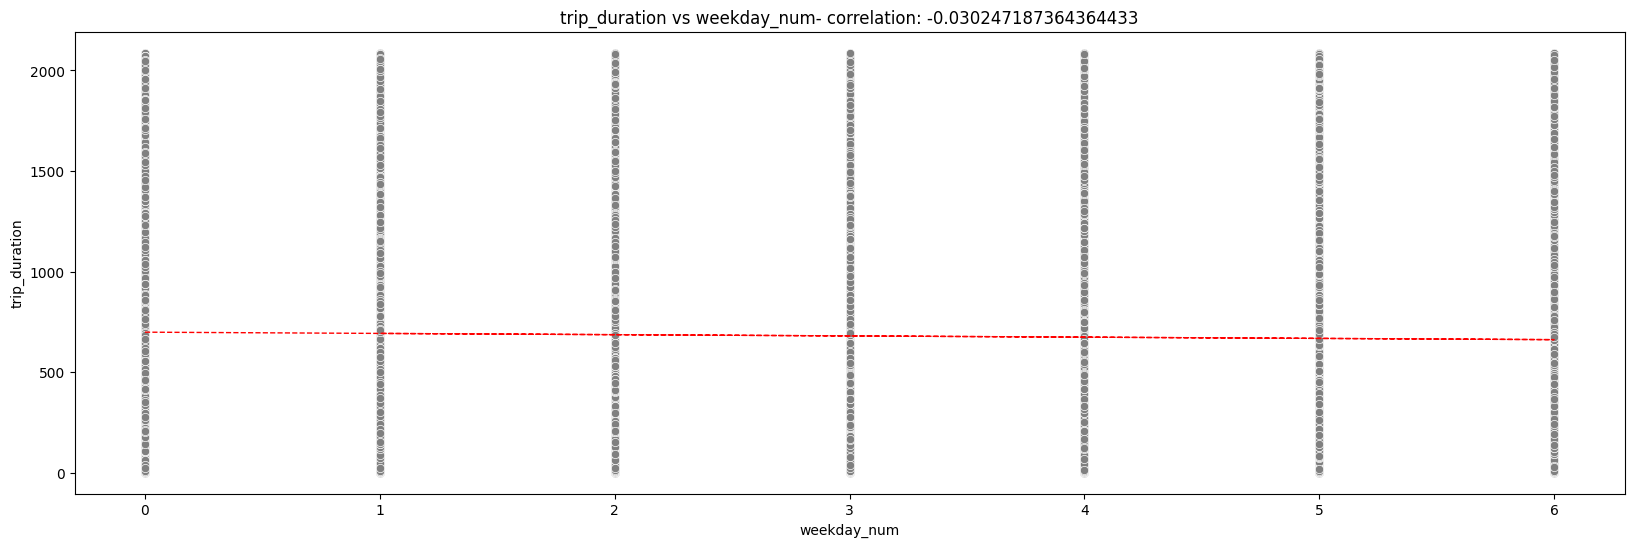

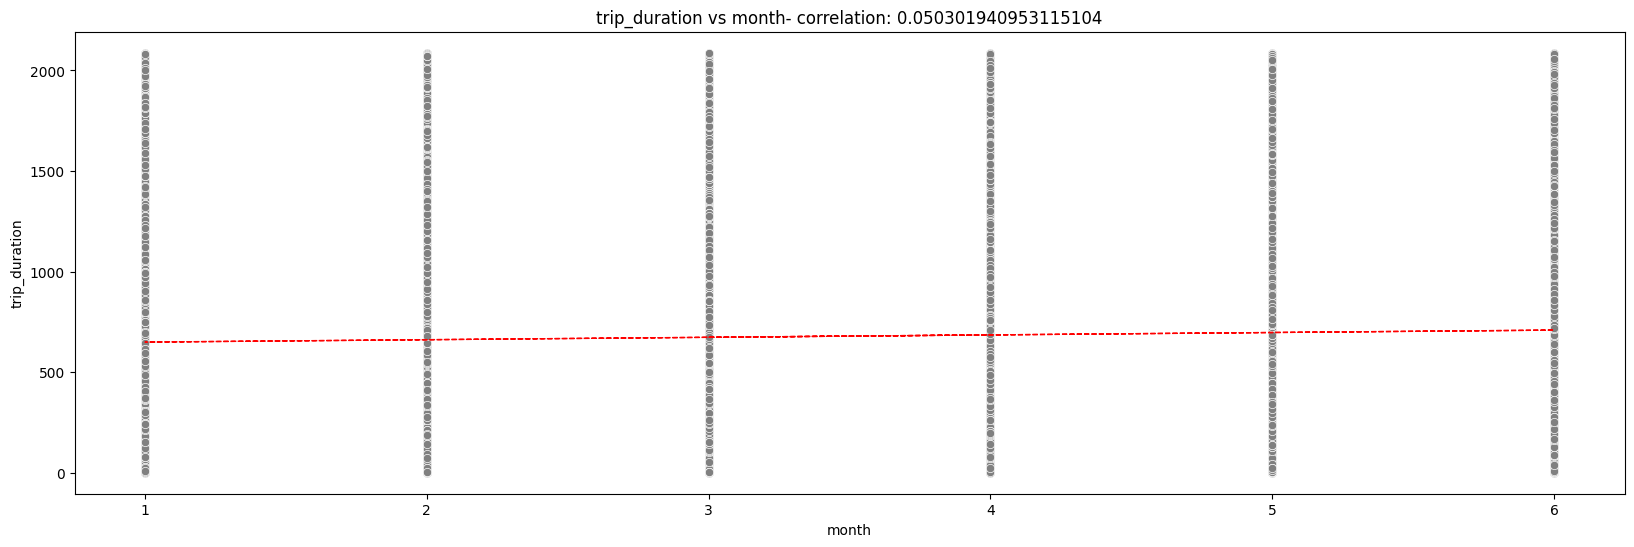

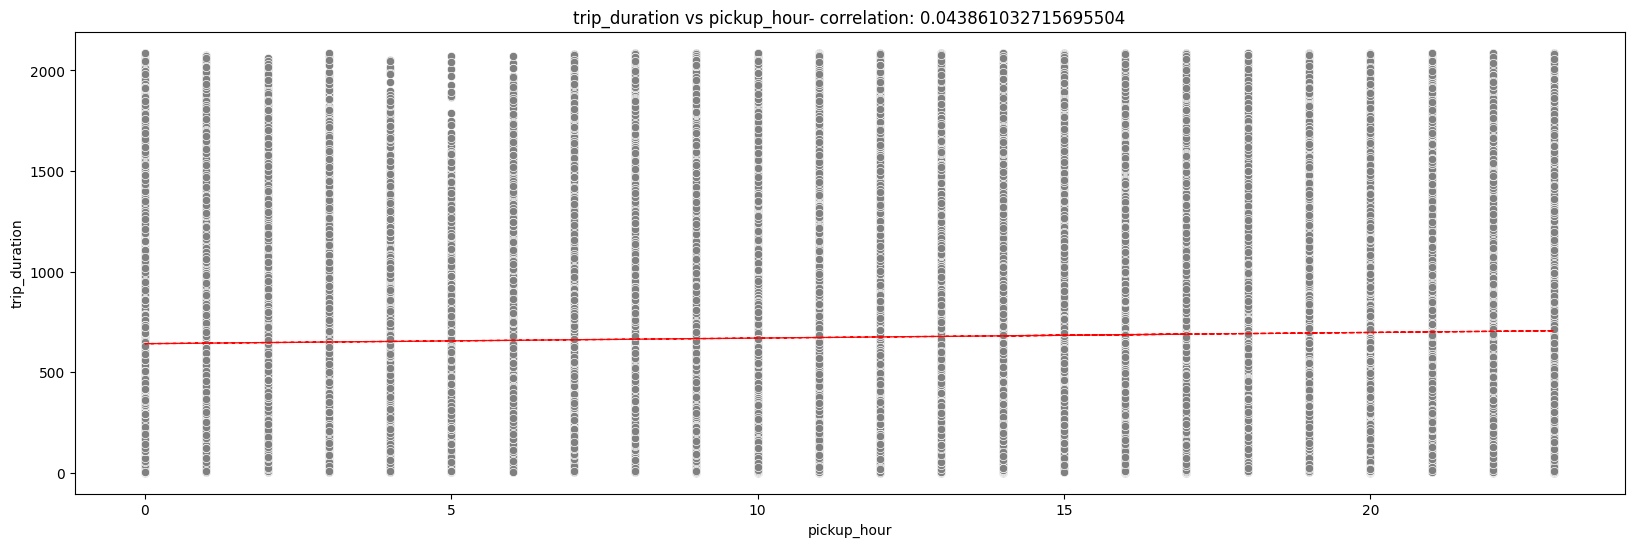

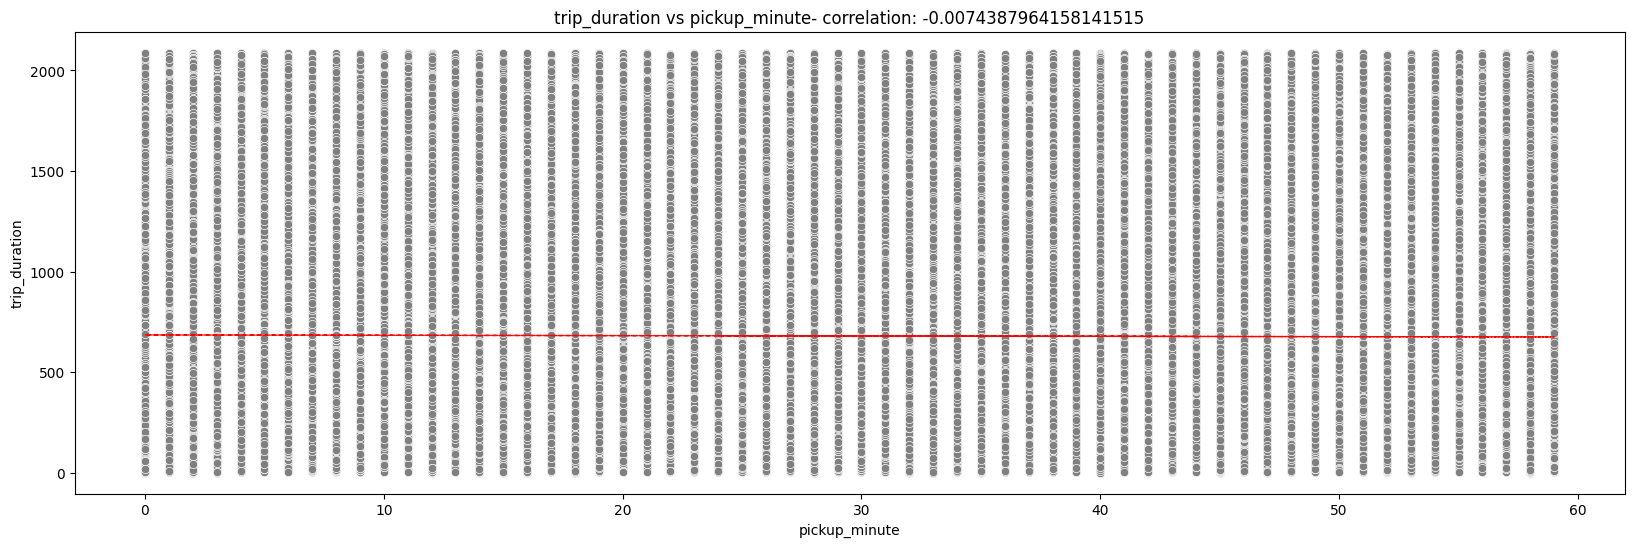

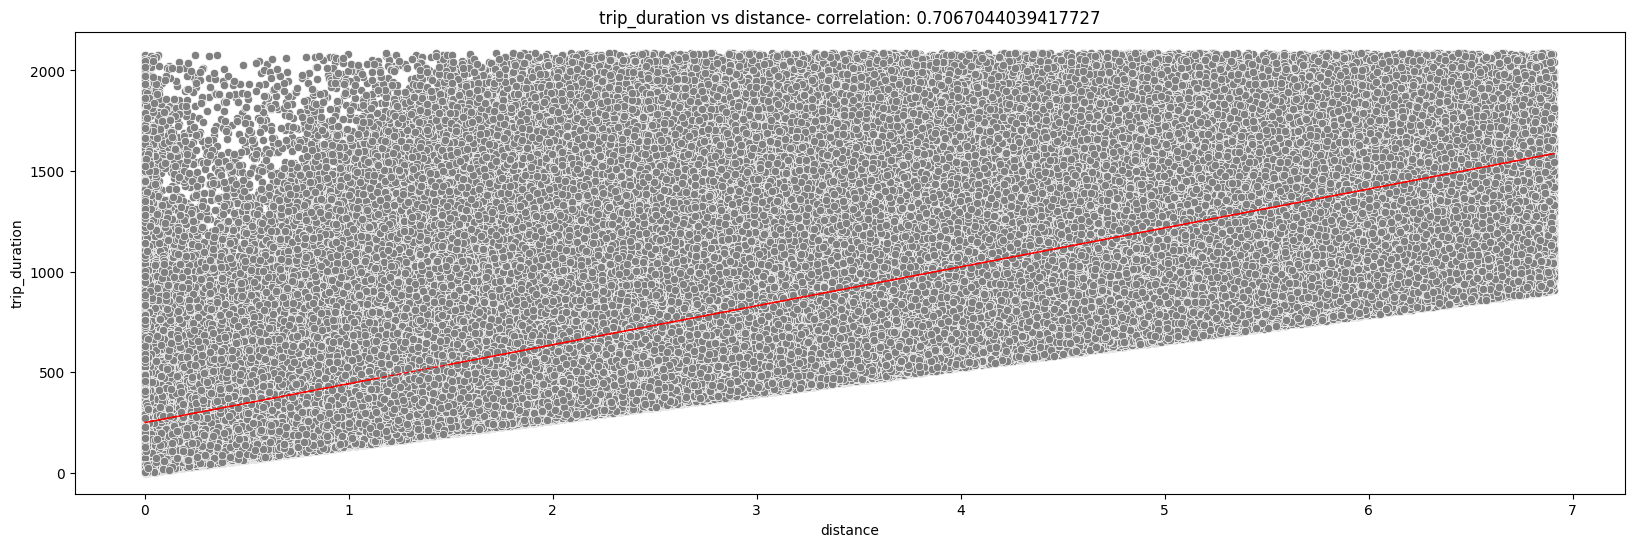

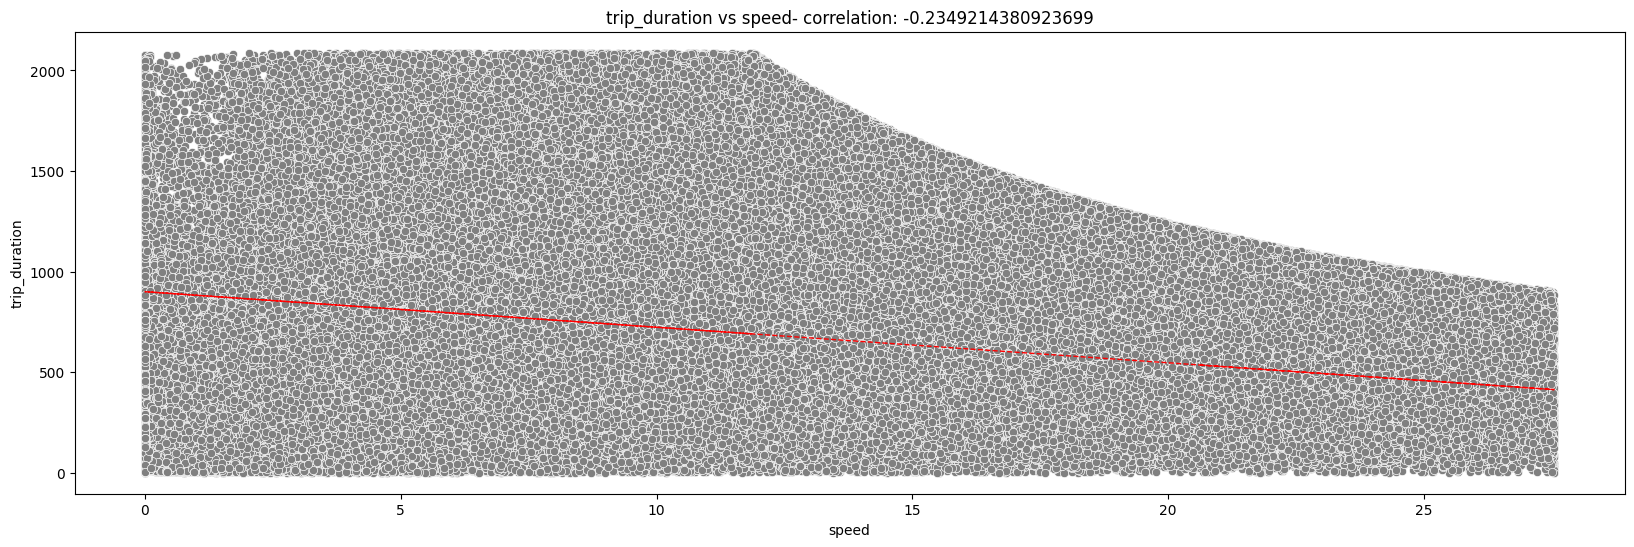

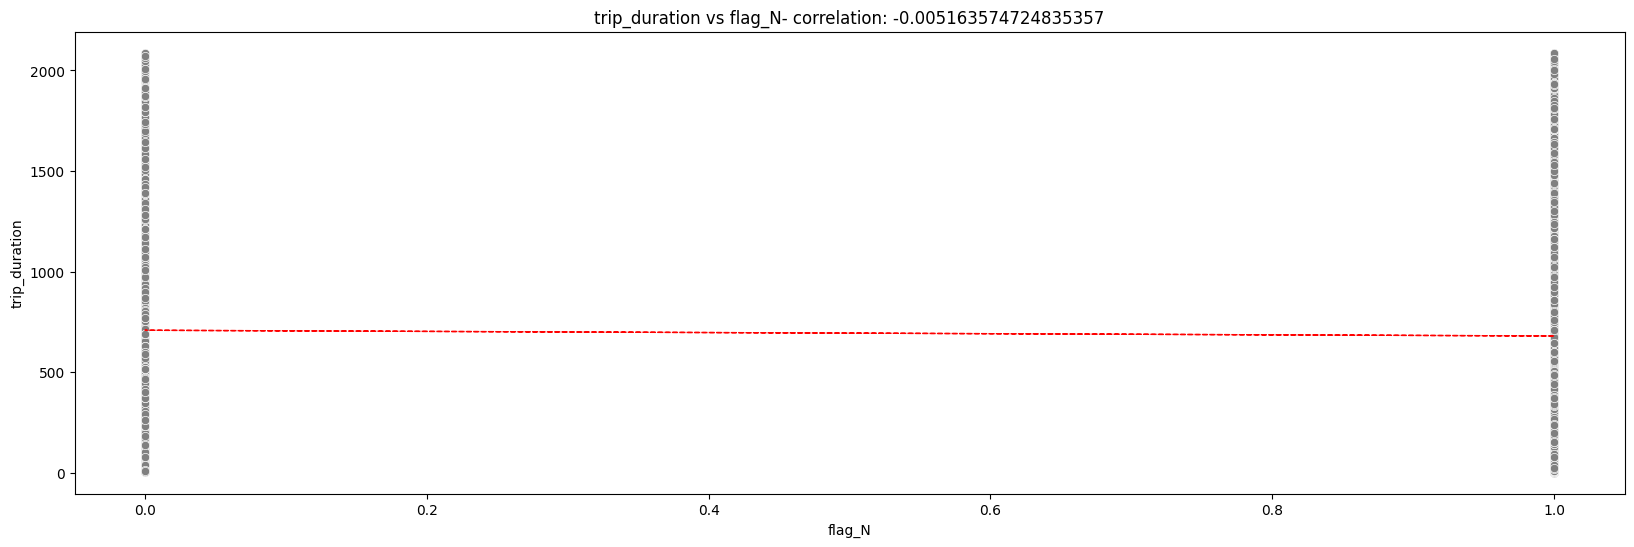

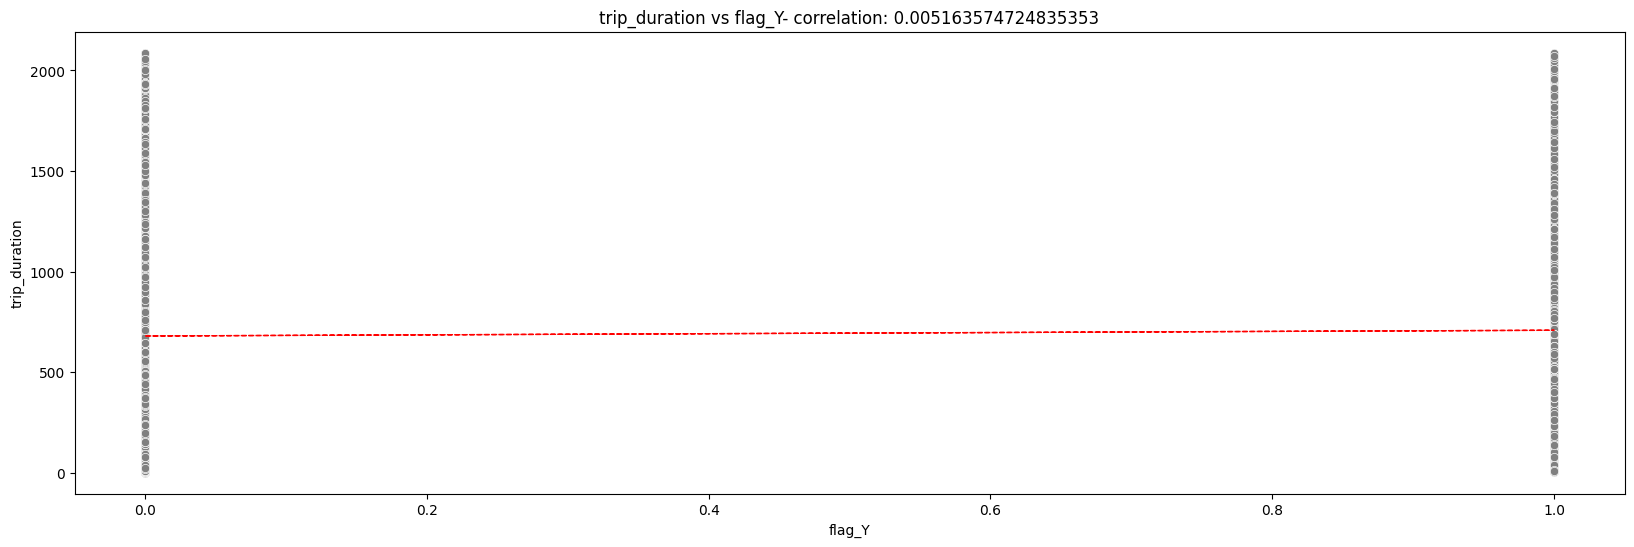

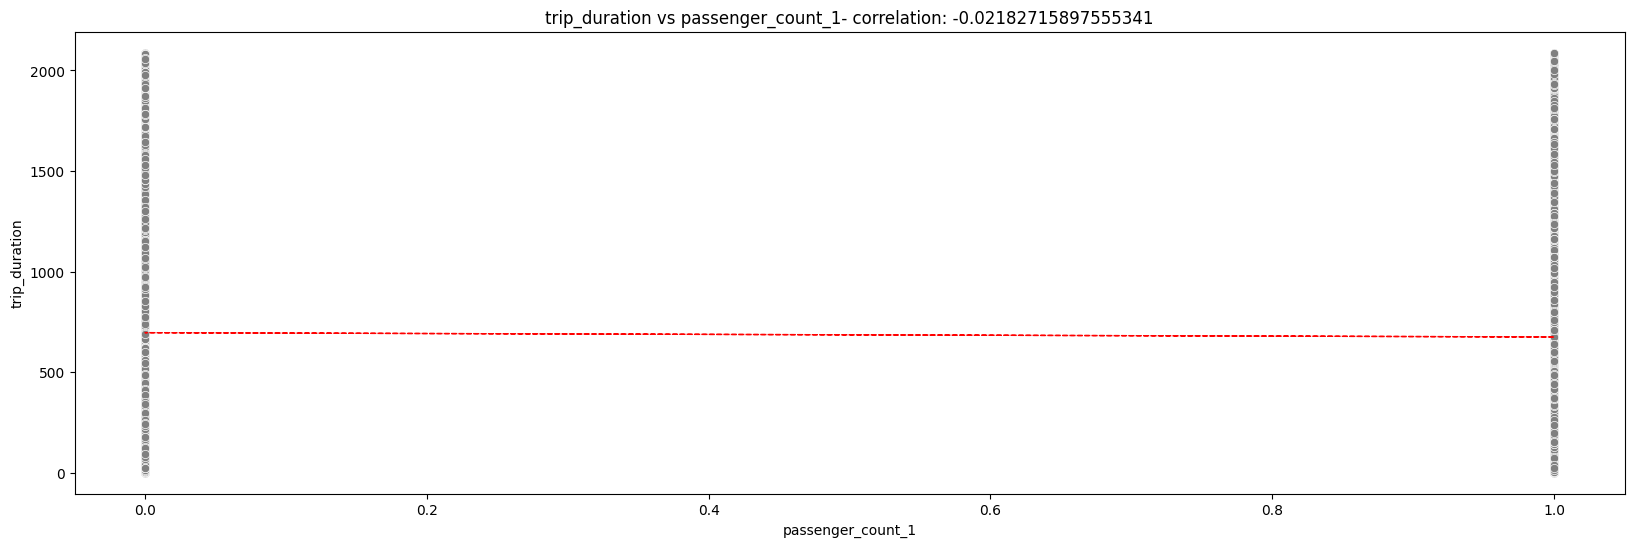

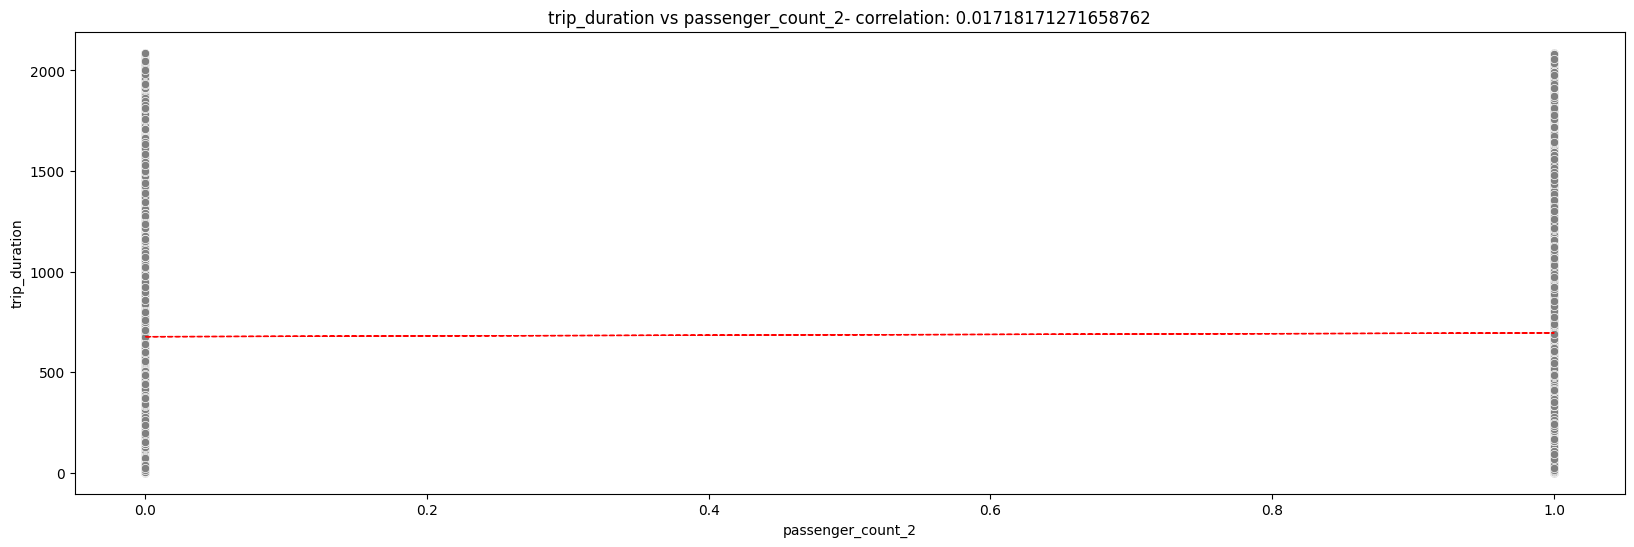

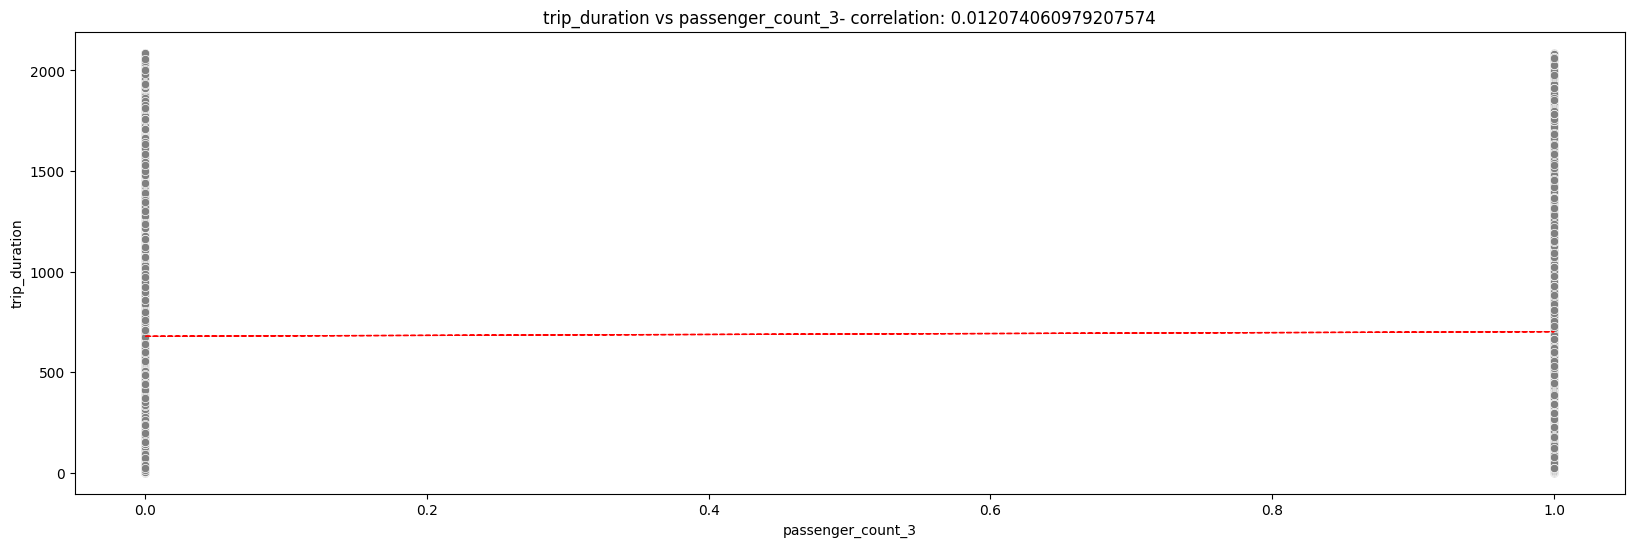

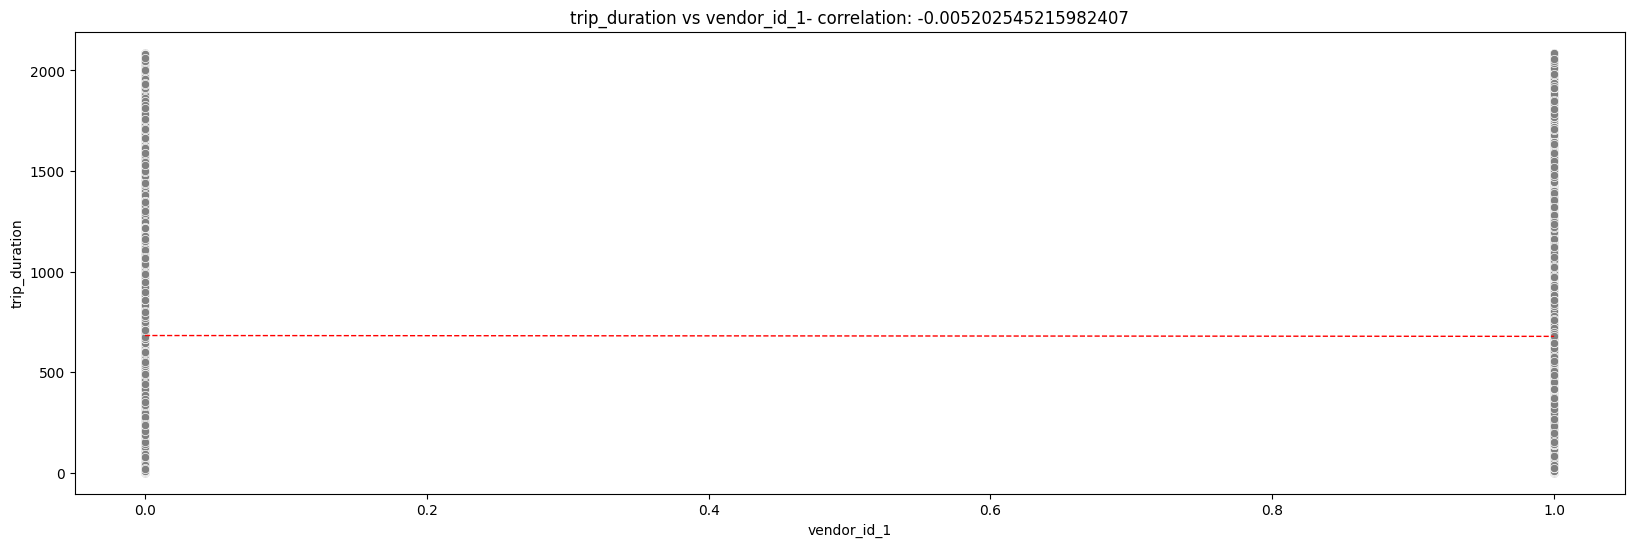

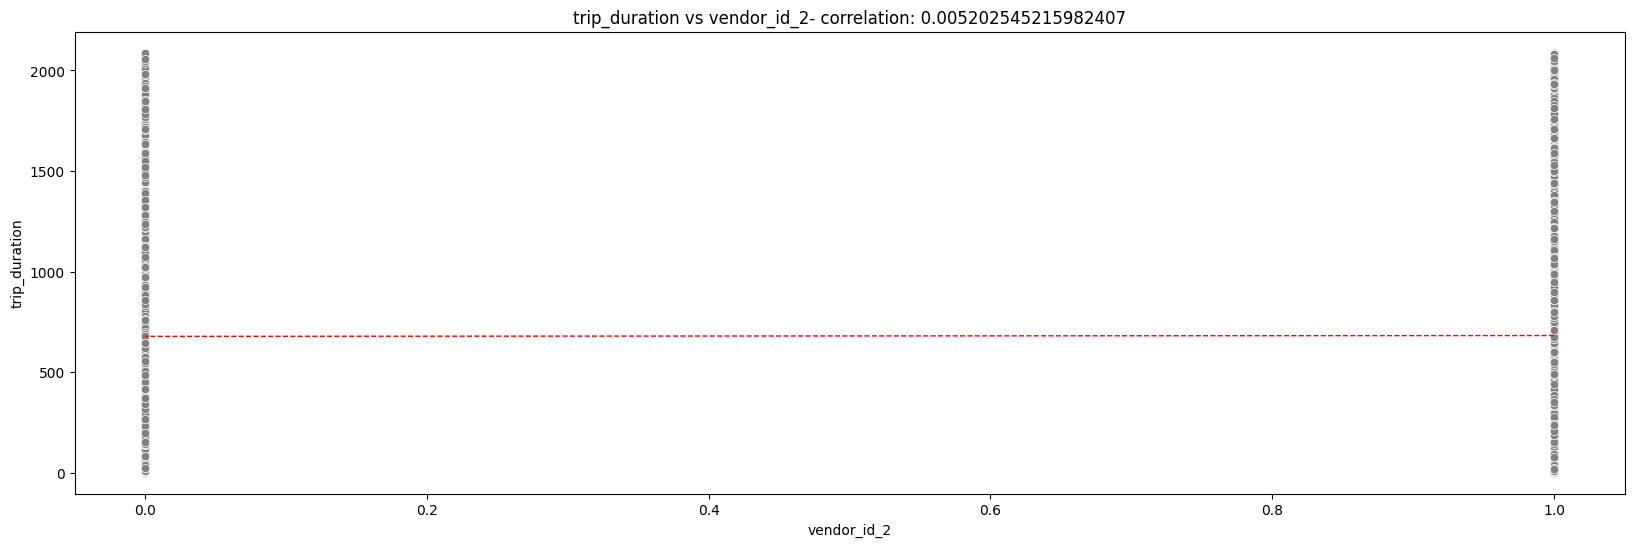

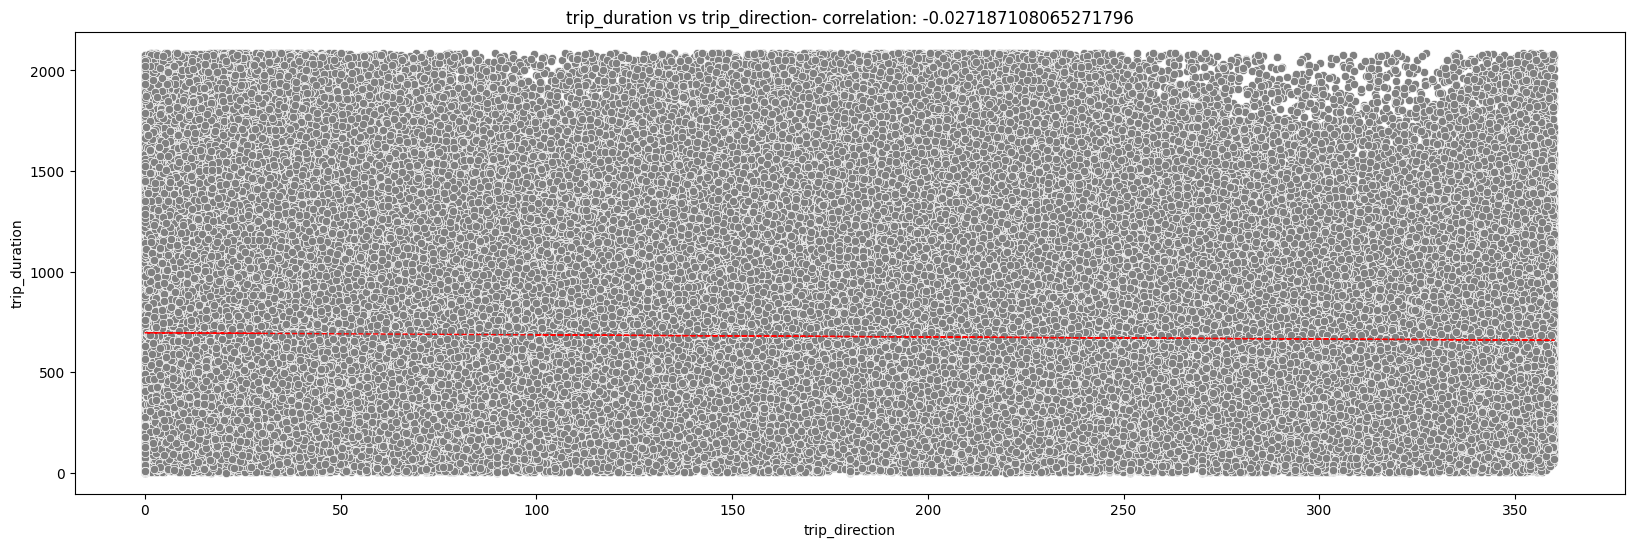

In [ ]:
# Select your features wisely to avoid overfitting
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

<Axes: >

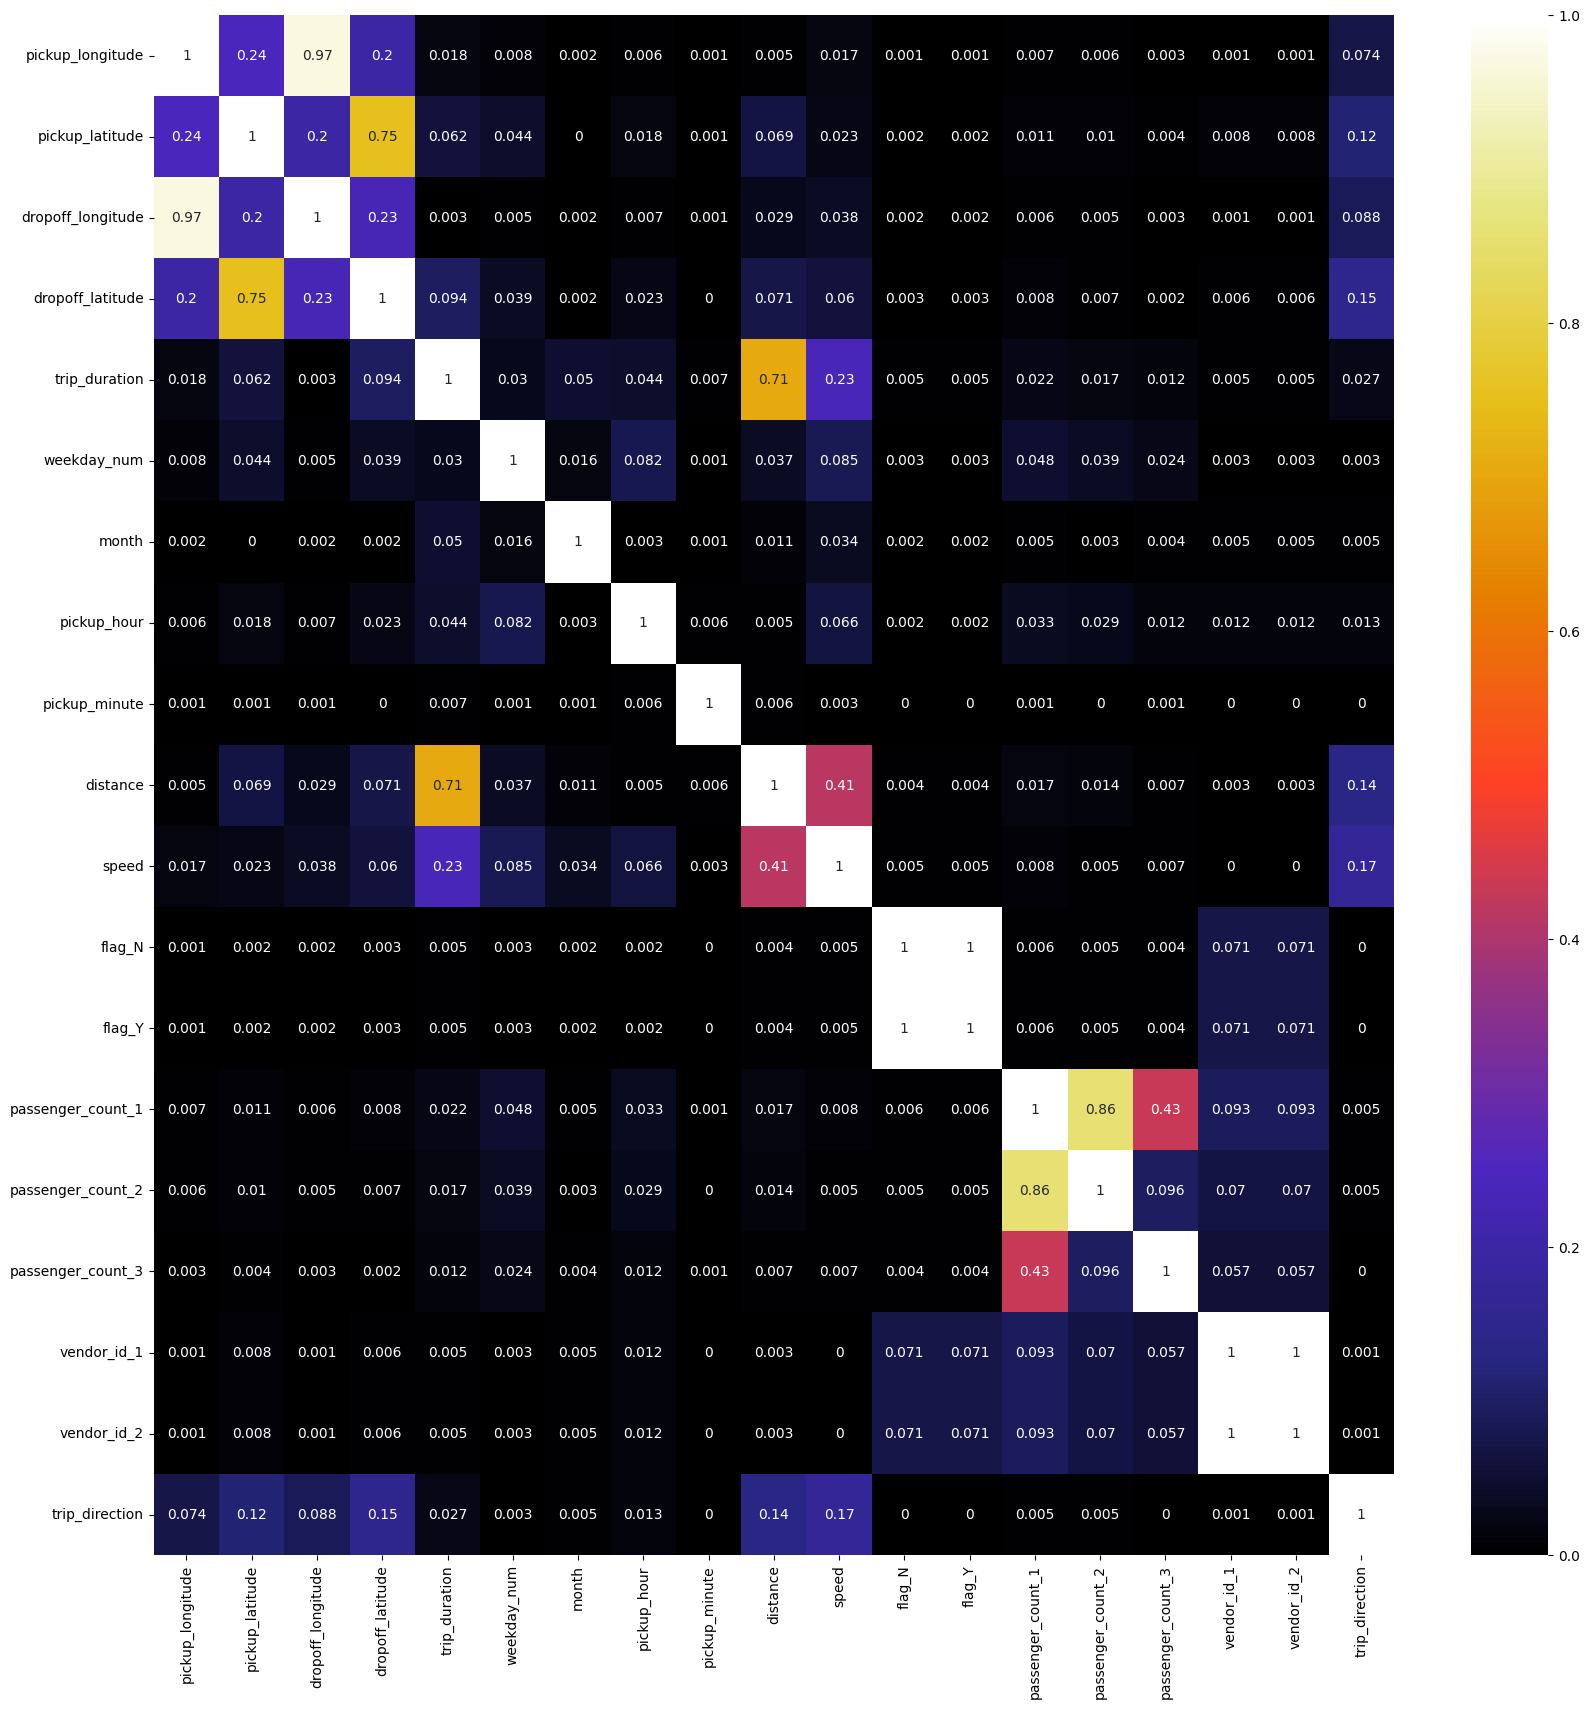

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

* We have used scatter plot to check how each variable is affecting on target variable.

* Correlation Matrix(Heatmap): A correlation matrix can be used to select features that have high correlations with the target variable and low correlations with other features.

##### Which all features you found important and why?

We are selecting features on the basis of information which they are providing and removing features from dataset which are providing same kind of information.

For that we have did correlation check. We have performed hypothesis testing to check weather features are relevant or not.

* From hypothesis testing, we have found that pickup weekday and pickup hours are affecting number of trips and traffic times hence they are indirectly affecting trip duration.
* In correlation heatmap, we can see that pickup_latitude and dropoff_latitude are highly correlated. So we will drop one of the which is less affecting our target variable(trip_duration).

* Same for pickup_longitude and dropoff_longitude. They are highly correlate. So we will drop one of them.

* Passenger_count_1, Passenger_count_2 and Passenger_count_3 are highly correlated to each other. so we will drop those which are less affecting our dependent variable.

* We can see flag_Y and flag_N are highly correlated so we will one of them.

* Also vendor_id_1 and vendor_id_2 are highly correlated so we will one of them as well.

* We have created few features by data manipulations such as distance. We will take this as it is highly affecting our target variable.

* Using the Speed feature as a predictor in your regression model could result in a violation of the independence assumption between the features and the target, as the speed is derived from the target (trip duration) and the distance. This could lead to overfitting and reduced model performance.So we are dropping the speed.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602            455   
1        40.738564         -73.999481         40.731152            663   
3        40.719971         -74.012268         40.706718            429   
4        40.793209         -73.972923         40.782520            435   
7        40.797779         -73.922470         40.760559           1551   

   weekday_num  month  ...      speed  pickup_date flag_N  flag_Y  \
0            0      3  ...  11.856445   2016-03-14      1       0   
1            6      6  ...   9.803672   2016-06-12      1       0   
3            2      4  ...  12.465738   2016-04-06      1       0   
4            5      3  ...   9.836608   2016-03-26      1       0   
7            5      5  ...  13.264964   2016-05-21      1       0   

   passenger_count_1 passenger_count_2  passenger_count_3  vendor_id_1  \
0                  1                 0                  0            0   
1                  1                 0                  0            1   
3                  1                 0                  0            0   
4                  1                 0                  0            0   
7                  1                 0                  0            0   

   vendor_id_2  trip_direction  
0            1       99.970196  
1            0      242.846232  
3            1      187.262300  
4            1      179.473585  
7            1      136.385396  

[5 rows x 24 columns]

In [ ]:
taxi_df.shape

(1105941, 19)

In [ ]:
df.shape

(1105941, 24)

In [ ]:
final_df= df[['vendor_id_1','passenger_count_1','pickup_longitude','dropoff_latitude','flag_Y',
              'weekday_num','pickup_hour','pickup_minute','trip_direction','distance','trip_duration']]

<Axes: >

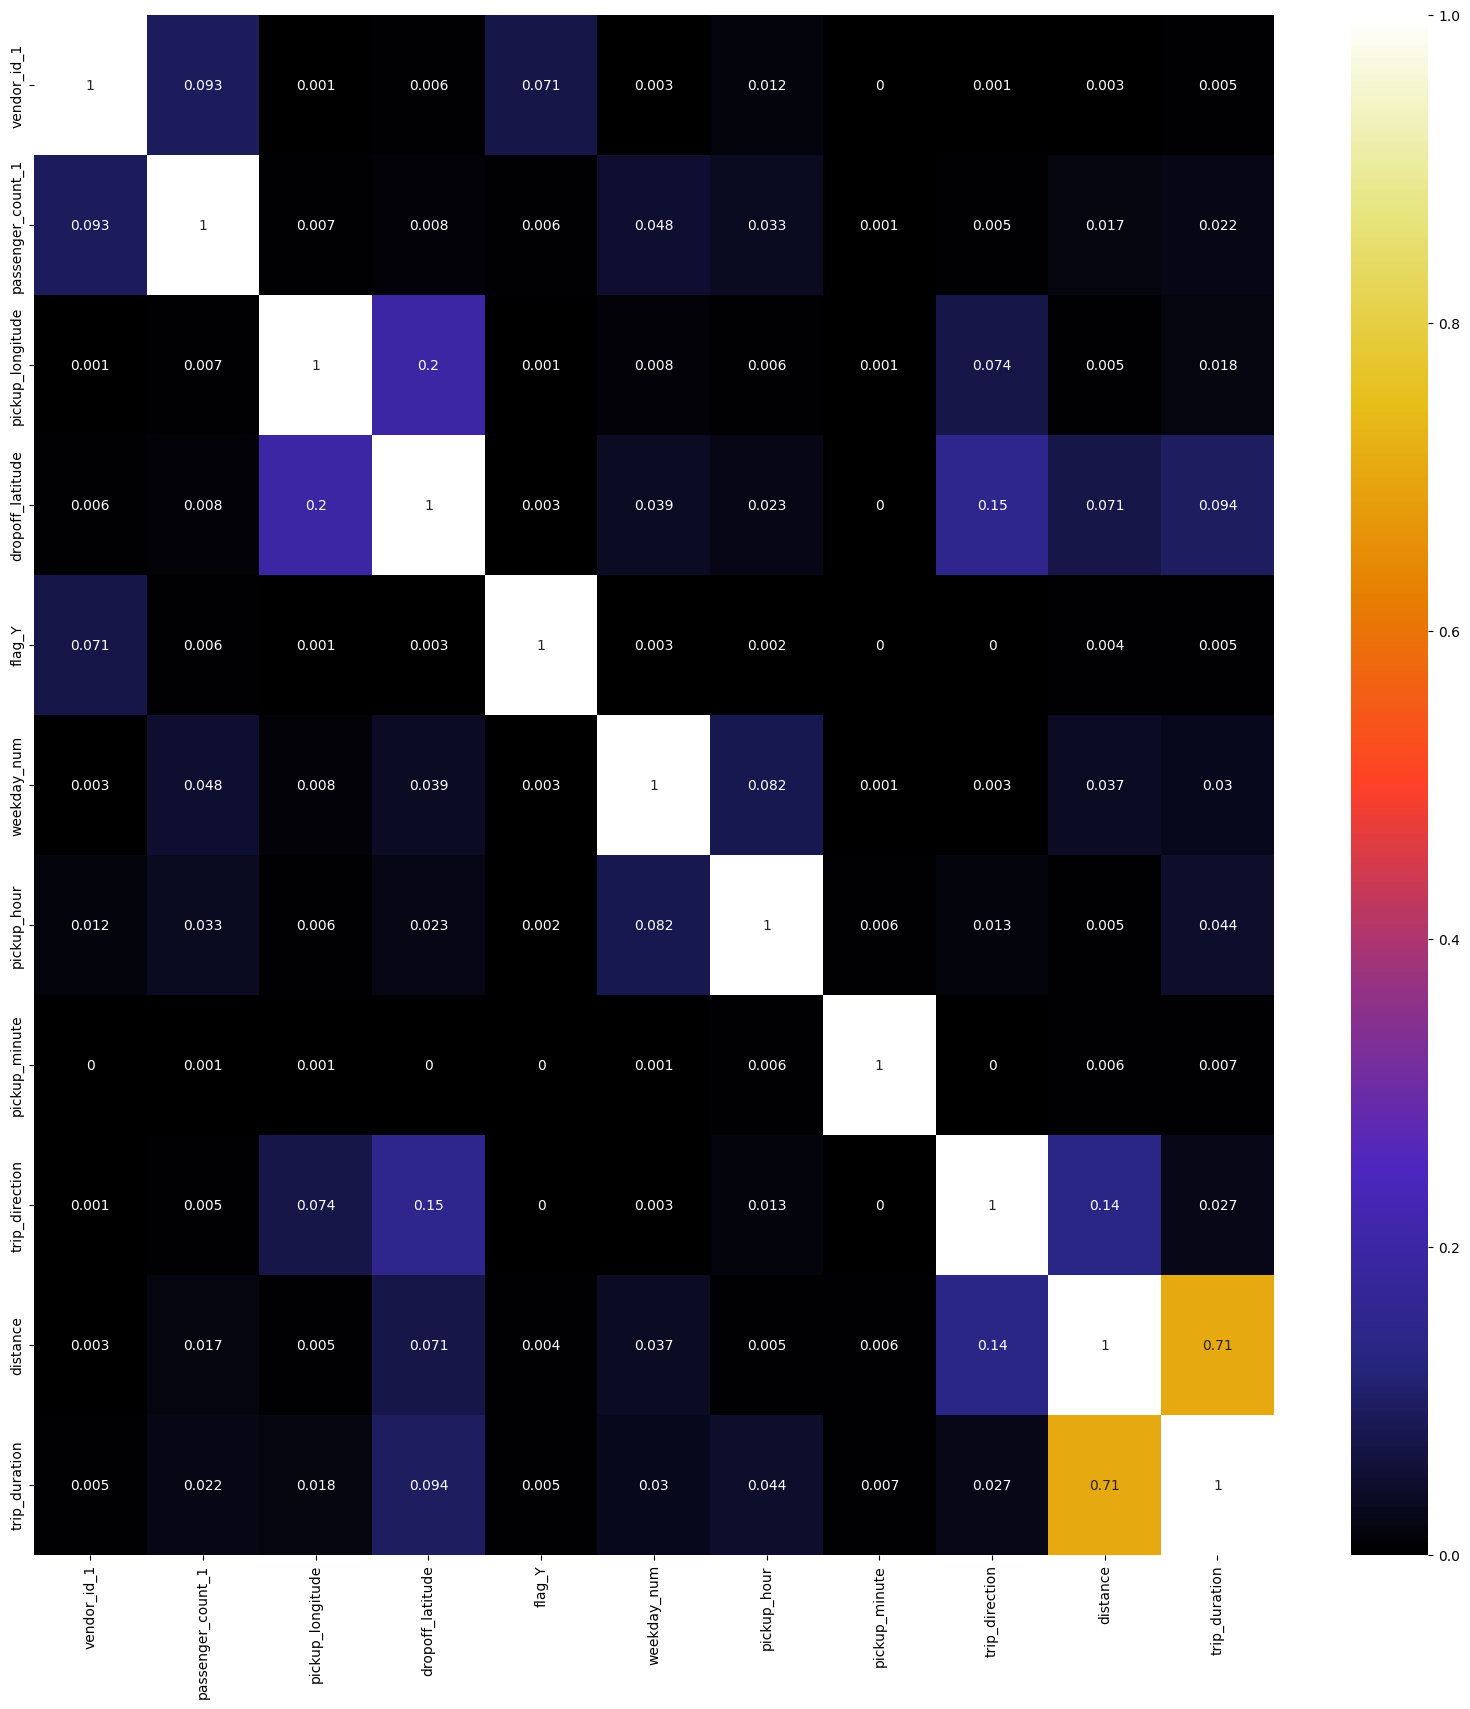

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [ ]:
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature vendor_id_1 is: 2
The number of unique counts in feature passenger_count_1 is: 2
The number of unique counts in feature pickup_longitude is: 18855
The number of unique counts in feature dropoff_latitude is: 45493
The number of unique counts in feature flag_Y is: 2
The number of unique counts in feature weekday_num is: 7
The number of unique counts in feature pickup_hour is: 24
The number of unique counts in feature pickup_minute is: 60
The number of unique counts in feature trip_direction is: 1100174
The number of unique counts in feature distance is: 1100403
The number of unique counts in feature trip_duration is: 2088


In [ ]:
cont_variables= ["trip_duration","distance","trip_direction"]

Before Applying Transformation


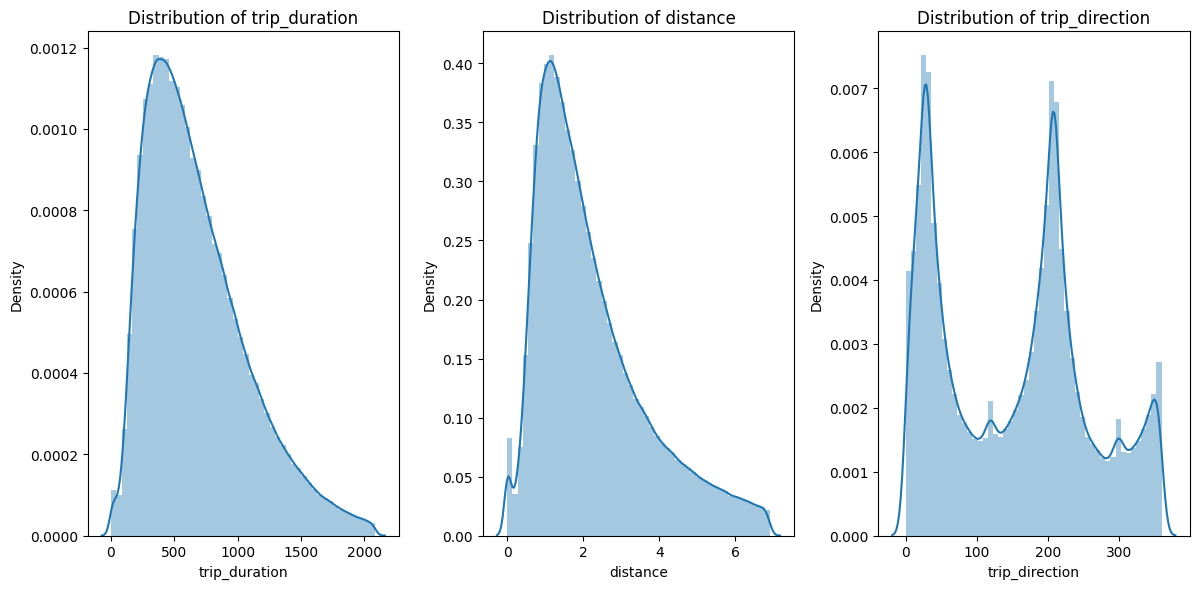

In [ ]:
plt.figure(figsize=(20,6))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
     

After Applying Transformation


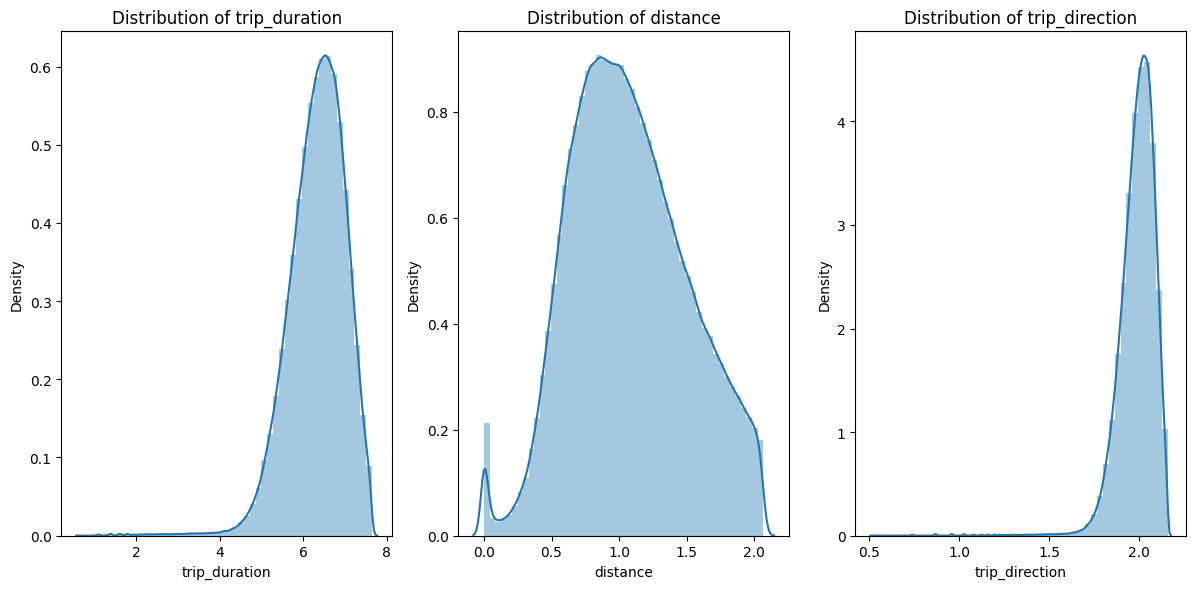

In [ ]:
test_df1['trip_duration']=np.log(test_df1['trip_duration']+1)
test_df1['distance']=np.log(test_df1['distance']+1)
test_df1['trip_direction']=np.log(test_df1['trip_duration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
     

After Applying Transformation


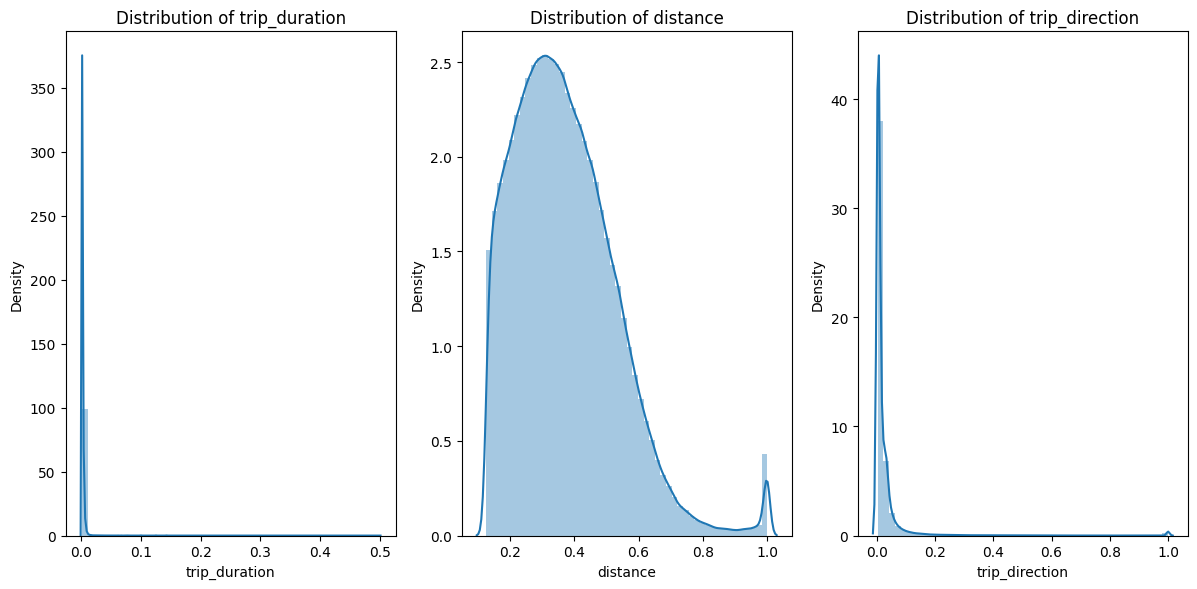

In [ ]:
# Applying transformation on the above considered columns
test_df2['trip_duration']=1/(test_df2['trip_duration']+1)
test_df2['distance']=1/(test_df2['distance']+1)
test_df2['trip_direction']=1/(test_df2['trip_direction']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()  

After Applying Transformation


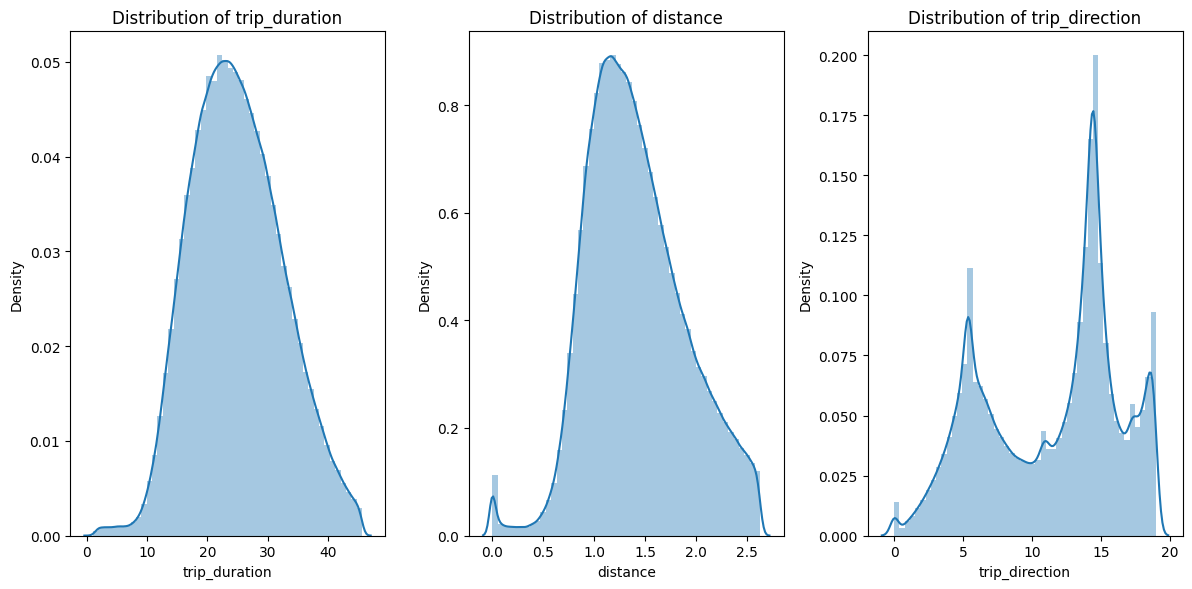

In [ ]:
 #Applying transformation on the above considered columns
test_df3['trip_duration']=(test_df3['trip_duration'])**(1/2)
test_df3['distance']=(test_df3['distance'])**(1/2)
test_df3['trip_direction']=(test_df3['trip_direction'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()  

After Applying Transformation


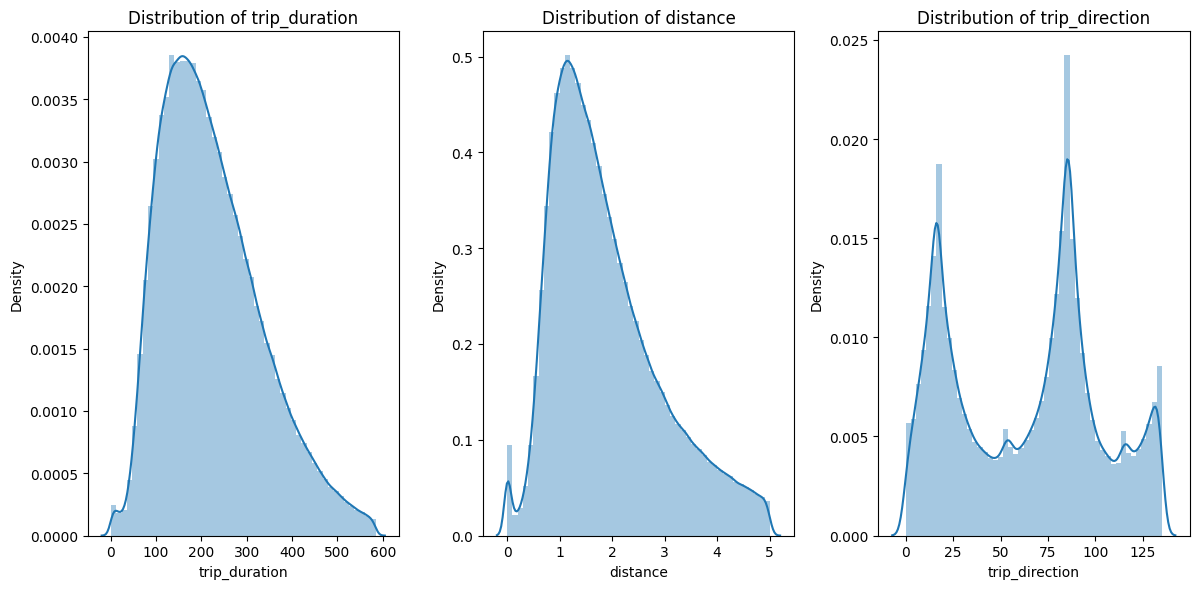

In [ ]:
# Applying transformation on the above considered columns
test_df4['trip_duration']=(test_df4['trip_duration'])**(1/1.2)
test_df4['distance']=(test_df4['distance'])**(1/1.2)
test_df4['trip_direction']=(test_df4['trip_direction'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()  

**applying transformation**

From the above plots it is clear that:

Feature "trip_duration" needs square root transformation.

Feature "distance" needs square root transformation.

Feature "trip_direction" no transformation needed

In [ ]:
## Square root transformation
final_df['trip_duration']=(final_df['trip_duration'])**(1/2)
final_df['distance']=(final_df['distance'])**(1/2)

### 6. Data Scaling

In [ ]:
final_df.columns

Index(['vendor_id_1', 'passenger_count_1', 'pickup_longitude',
       'dropoff_latitude', 'flag_Y', 'weekday_num', 'pickup_hour',
       'pickup_minute', 'trip_direction', 'distance', 'trip_duration'],
      dtype='object')

In [ ]:
# Separating "x" and "y" variables
x= final_df.drop('trip_duration',axis=1)
y= final_df[['trip_duration']]
print(x.shape)
print(y.shape)

(1105941, 10)
(1105941, 1)


In [ ]:
# Creating object
std_regressor= StandardScaler()
     

In [ ]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

* We utilized StandardScaler from the sklearn library to standardize our data. This is crucial as having features in different scales can cause poor results or slow convergence. Standardizing the features makes it easier to compare them or assess their impact on the target variable("trip_duration") by examining the magnitude of their coefficients. Additionally, we will be using linear regression model which assumes normally distributed data, which standardization helps enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* We have left with only few independant features in our dataset after doing feature selection, feature modelling and feature engineering.

* We have 11,05,941 records stored in columns, hence no any problem will be there due curse of dimentionallity.

* We have already reduced our features enough, without loosing originality of data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (884752, 10)
The shape of y_train is: (884752, 1)
The shape of x_test is: (221189, 10)
The shape of y_test is: (221189, 1)


##### What data splitting ratio have you used and why? 

* We have used a data splitting ratio of 80:20, with 80% of the data being allocated to the training set and 20% being allocated to the testing set. This was done using the train_test_split function available in the scikit-learn library. This data splitting approach is commonly used to ensure that the model is trained and tested on different data samples, helping to prevent overfitting and improving model generalization performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**NO**

* As Handling imbalanced dataset refers to the process of addressing class imbalance in a dataset where one class (minority class) has significantly fewer observations than another class (majority class). This imbalanced distribution of classes can have a negative impact on machine learning algorithms, as they may be biased towards the majority class, leading to poor performance in classifying the minority class.

* So we dont need to balance the dataset.

## ***7. ML Model Implementation***

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

   ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [ ]:
# Defining the function that plots Evaluation Metric Score Chart
def EvaluationMetricChart(yt,yp):
   ''' Prints Evaluation Metrics Chart'''
   #Plotting Actual and Predicted Values
   plt.figure(figsize=(18,6))
   plt.plot((yp)[:100]) 
   plt.plot((np.array(yt)[:100]))
   plt.legend(["Predicted","Actual"])
   plt.title('Actual and Predicted Time Duration')

### ML Model - 1 Linear regression

* Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)
# Predict on the model
y_pred_lr_train = linear_regressor.predict(x_train)
y_pred_lr_test  = linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_
     

array([[-0.0307598 , -0.09152949, -0.07297018, -0.30976551,  0.01961062,
        -0.40871989,  0.27455978, -0.0195534 ,  0.49857623,  5.63585144]])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

array([24.94671393])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lr_train,y_test,y_pred_lr_test)
     

--------------------------------------------------
MAE on train is: 3.9480772596282647
MAE on test is: 3.9548515203445715
--------------------------------------------------
MSE on train is: 25.73894918421885
MSE on test is: 25.787656427569708
--------------------------------------------------
RMSE on train is: 5.073356796463151
RMSE on test is: 5.078154825088509
--------------------------------------------------
MAPE on train is: 17.722631091100027  %
MAPE on test is: 17.70456759420486  %
--------------------------------------------------
R2 on train is: 0.5530336492873114
R2 on test is: 0.5530488727600495
--------------------------------------------------
Accuracy of train is: 82.27736890889997  %
Accuracy of test is: 82.29543240579514  %
--------------------------------------------------


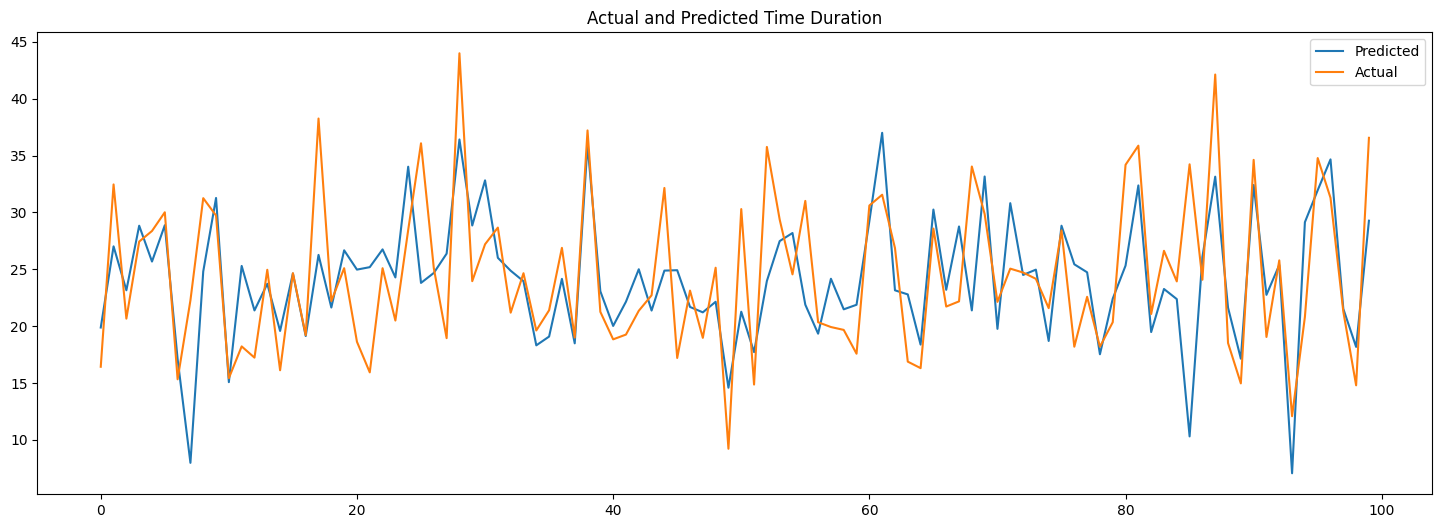

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lr_train)
     

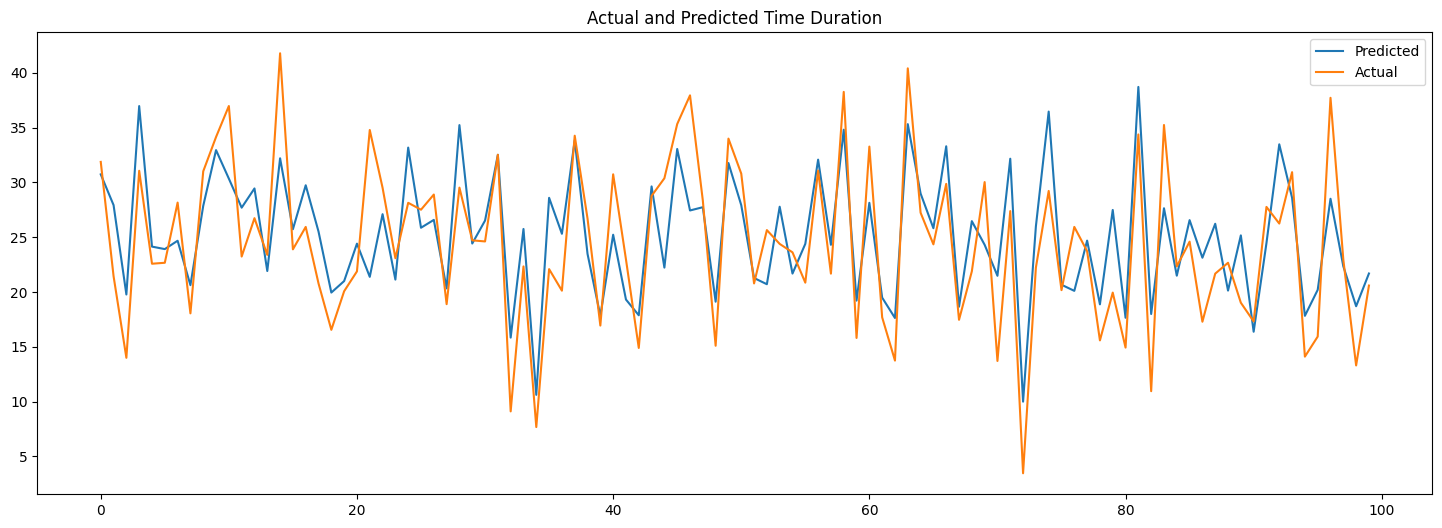

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lr_test)

#### 2. Cross- Validation & Hyperparameter Tuning

* We began with a linear regression model, which is a basic and simple machine learning model. We evaluated key regression metrics on both the training and test datasets to determine the performance of our model. The results show that the r2 scores are similar, indicating that the model is on the right track.

* However, the relationship between the dependent and independent variables is not strongly linear. To achieve better results, we will perform cross-validation and hyperparameter tuning on

1)Lasso

2)Ridge

3)Elastic Net models

### ML Model - 2  Lasso Regression

In [ ]:
# Creating Ridge instance
lasso= Lasso()
# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}
# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)
# Predict the output
y_pred_lasso_train = lassoR.predict(x_train)
y_pred_lasso_test  = lassoR.predict(x_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")
     

The best alpha value found out to be: {'alpha': 0.01, 'max_iter': 7}
Negative mean square error is: -25.751193990325635


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lasso_train,y_test,y_pred_lasso_test)

--------------------------------------------------
MAE on train is: 3.9493193366045736
MAE on test is: 3.9561884126601425
--------------------------------------------------
MSE on train is: 25.73990163863032
MSE on test is: 25.790805871603492
--------------------------------------------------
RMSE on train is: 5.073450663860872
RMSE on test is: 5.078464912904636
--------------------------------------------------
MAPE on train is: 17.738273921153542  %
MAPE on test is: 17.720278306323102  %
--------------------------------------------------
R2 on train is: 0.5530171095649836
R2 on test is: 0.5529942866612689
--------------------------------------------------
Accuracy of train is: 82.26172607884646  %
Accuracy of test is: 82.27972169367689  %
--------------------------------------------------


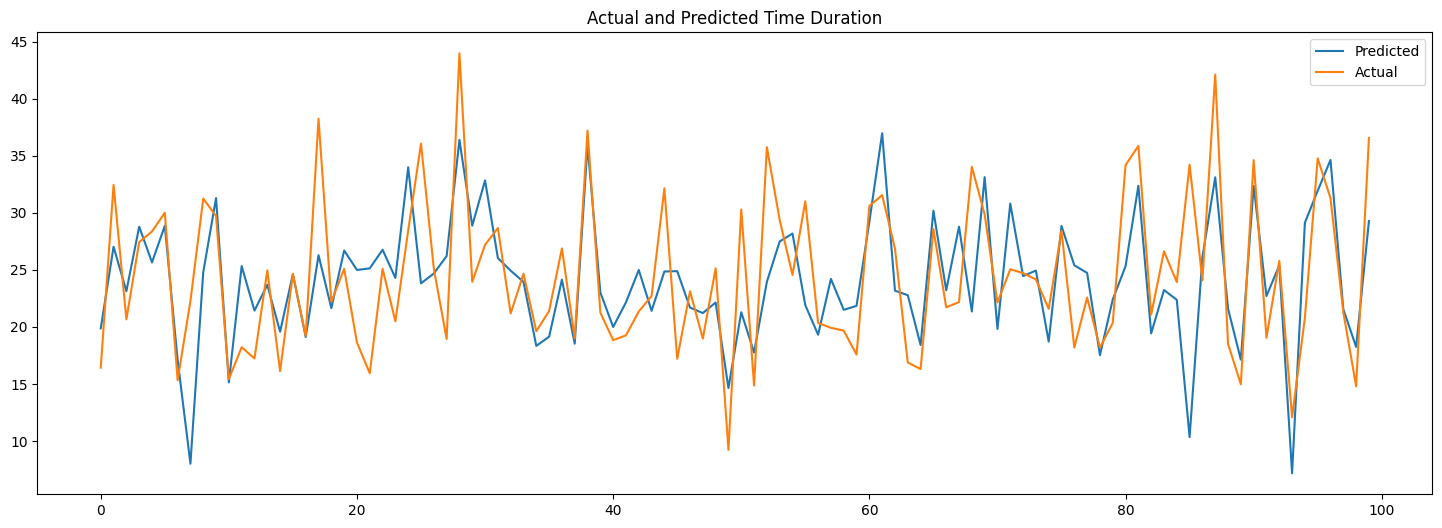

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lasso_train)

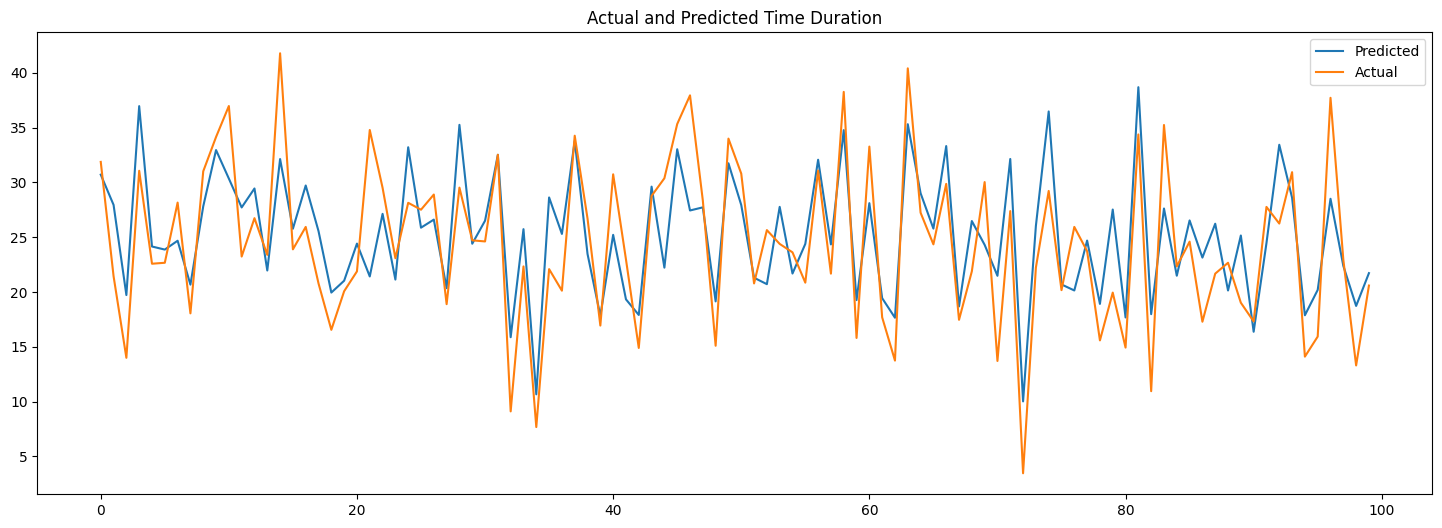

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lasso_test)

### ML Model - 3 Ridge Regresson

In [ ]:
# ML Model - 3 Implementation
ridge= Ridge()
# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}
# Fit the Algorithm
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)
# Predict on the model
y_pred_ridge_train = ridgeR.predict(x_train)
y_pred_ridge_test = ridgeR.predict(x_test)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_ridge_train,y_test,y_pred_ridge_test)

--------------------------------------------------
MAE on train is: 3.948083727647219
MAE on test is: 3.954858195843084
--------------------------------------------------
MSE on train is: 25.73894919664767
MSE on test is: 25.78766110477245
--------------------------------------------------
RMSE on train is: 5.073356797688063
RMSE on test is: 5.078155285610361
--------------------------------------------------
MAPE on train is: 17.72274840969999  %
MAPE on test is: 17.704682662531184  %
--------------------------------------------------
R2 on train is: 0.5530336490714803
R2 on test is: 0.5530487916948685
--------------------------------------------------
Accuracy of train is: 82.27725159030001  %
Accuracy of test is: 82.29531733746882  %
--------------------------------------------------


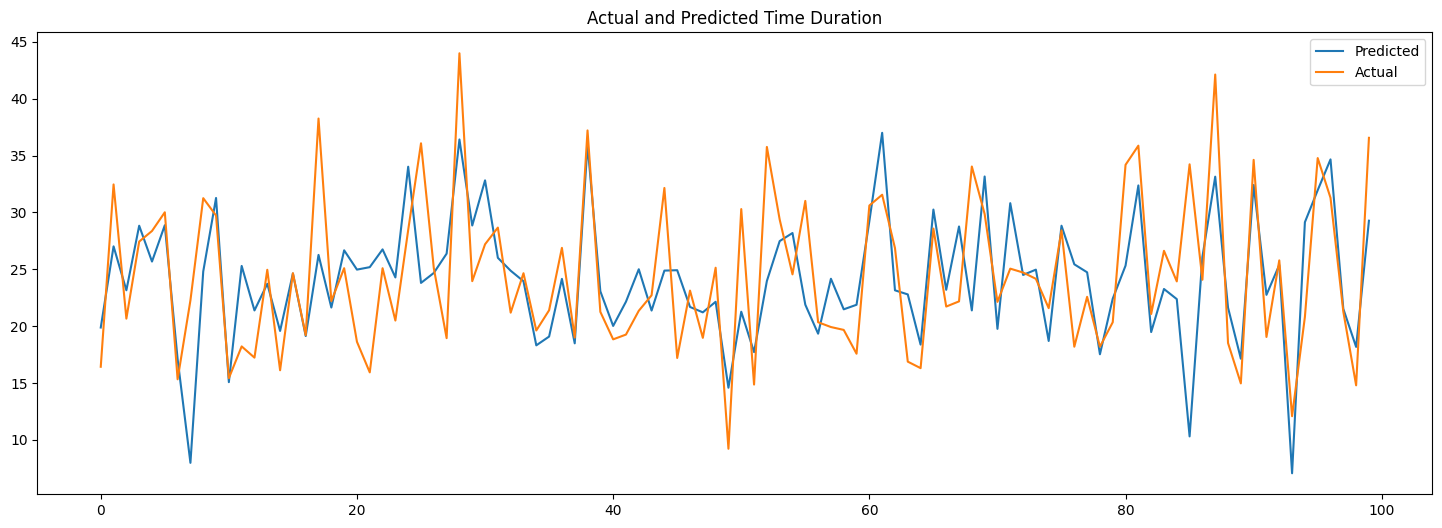

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_ridge_train)

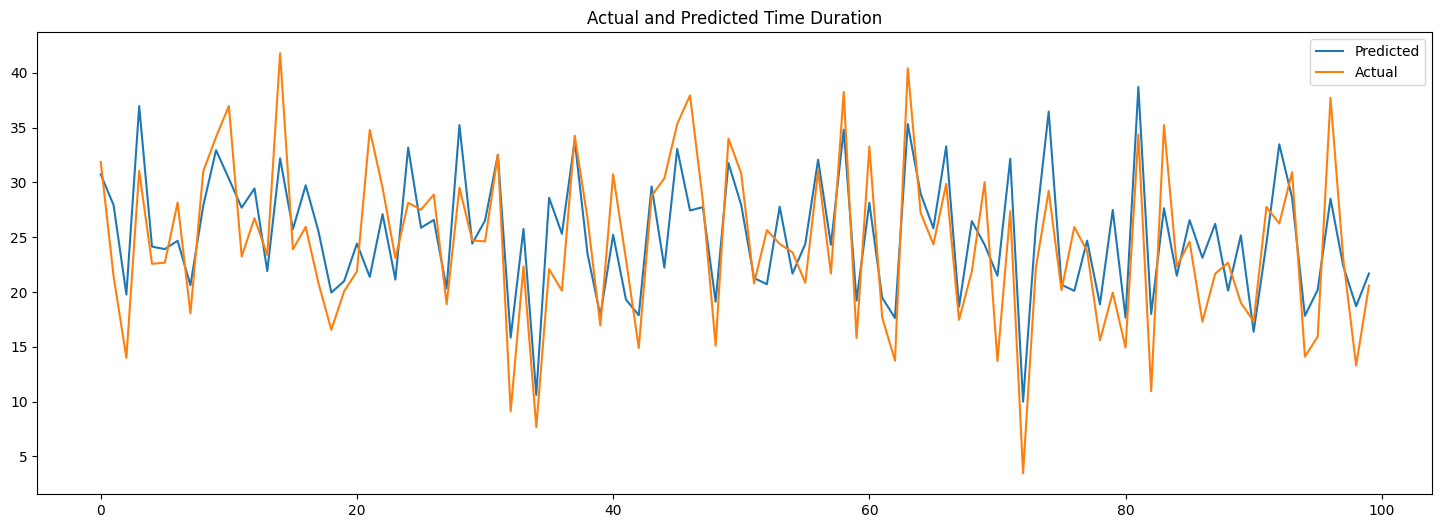

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_ridge_test)
     

### ML MODEL -4 ELASTICNET

In [ ]:
# ML Model - 4 Implementation
e_net= ElasticNet()
# Defining parameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict on the model
y_pred_e_net_train = e_netR.predict(x_train)
y_pred_e_net_test = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 12}
Negative mean square error is: -25.75230774568278


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_e_net_train,y_test,y_pred_e_net_test)

--------------------------------------------------
MAE on train is: 3.9483052217532824
MAE on test is: 3.9550899296689486
--------------------------------------------------
MSE on train is: 25.738963873305643
MSE on test is: 25.787906072272765
--------------------------------------------------
RMSE on train is: 5.073358244132346
RMSE on test is: 5.078179405286186
--------------------------------------------------
MAPE on train is: 17.726454262779644  %
MAPE on test is: 17.708337307962513  %
--------------------------------------------------
R2 on train is: 0.5530333942058987
R2 on test is: 0.5530445459232254
--------------------------------------------------
Accuracy of train is: 82.27354573722036  %
Accuracy of test is: 82.29166269203749  %
--------------------------------------------------


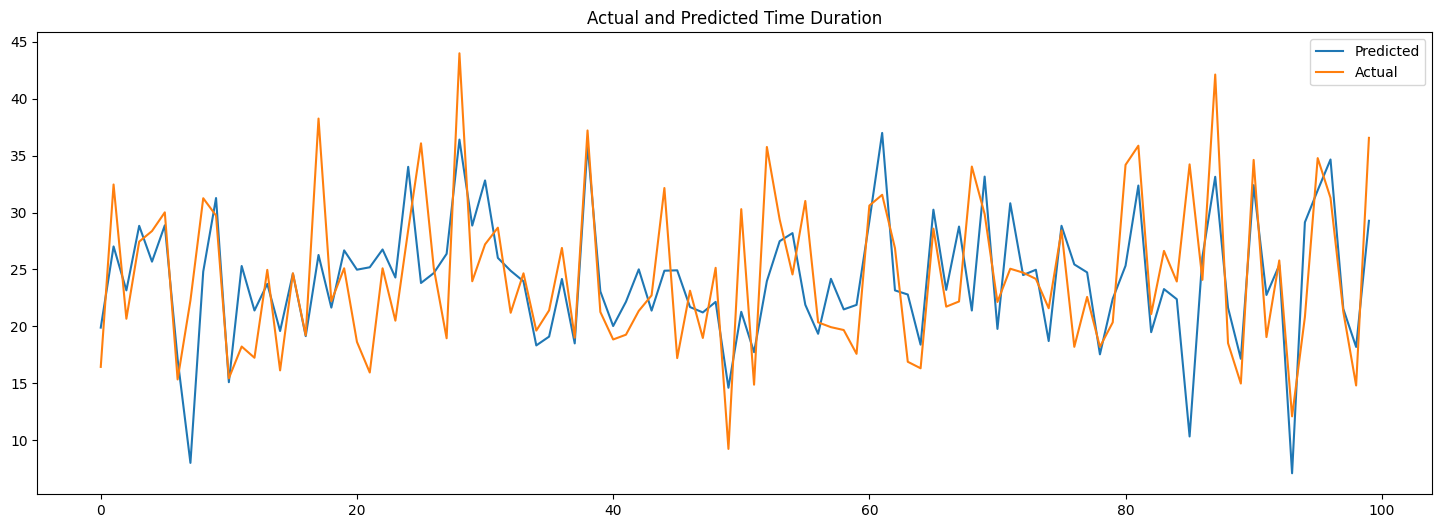

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_e_net_train)
     

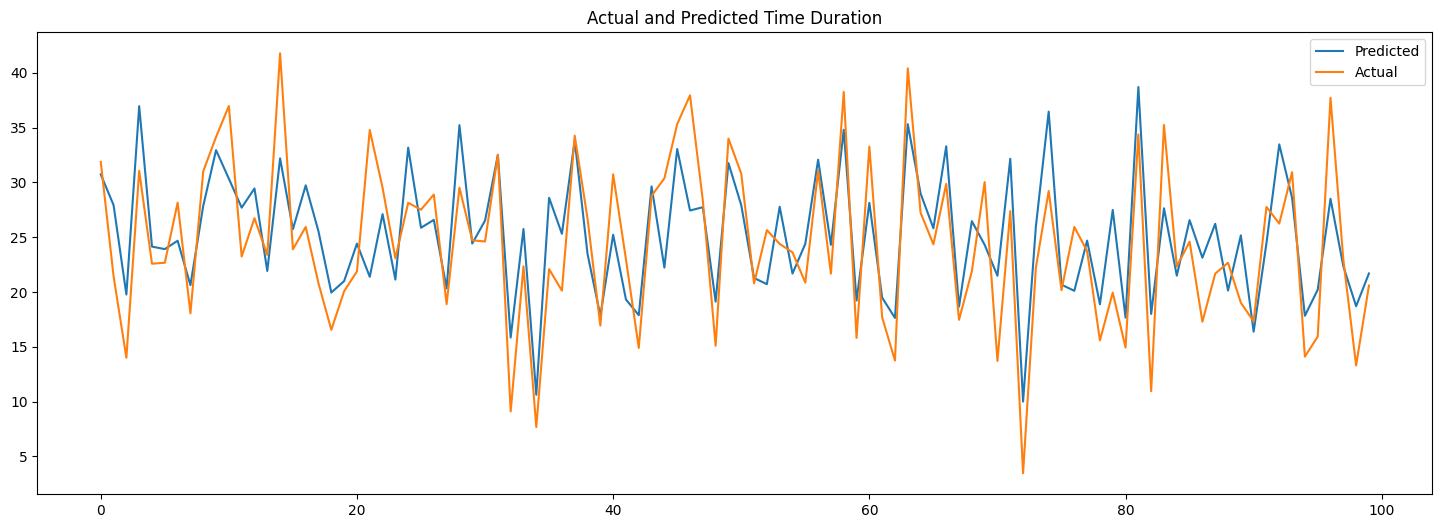

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_e_net_test)

##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is utilized for hyperparameter tuning as it tests all possible hyperparameter combinations and calculates their performance. The best set of hyperparameters is then selected based on this performance evaluation, offering a highly accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Despite attempting to improve our model's performance using Lasso, Ridge, and Elastic Net, we were unable to see a substantial improvement in the R2 score, MSE, and MAPE. This led us to explore more advanced machine learning models, such as XGBoost Regression, and LightGBM Regression, in order to achieve better results.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* The aim of evaluating an ML model is to assess the precision of the predictions. To this end, we utilized various evaluation metrics, including r2 score, MSE, and MAPE, to gauge the closeness of the predicted values to the actual values. Our results showed that the model was performing well with minimal difference between the train and test data. This suggests that the model was able to accurately predict the trip durations with an accuracy of approximately 82.25%. This level of accuracy is deemed satisfactory in the context of predicting the dependent variable, which is the trip duration, and its impact on the business.

### ML Model - 5 LightGBM Regression

In [ ]:
# ML Model - 5 Implementation
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1)
lgbmR.fit(x_train, y_train)
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmR_pred= lgbmR.predict(x_test)

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_lgbmR_pred,y_test,y_test_lgbmR_pred)

--------------------------------------------------
MAE on train is: 2.8229113966358064
MAE on test is: 2.8580958719192764
--------------------------------------------------
MSE on train is: 14.369056869335953
MSE on test is: 14.809786169788069
--------------------------------------------------
RMSE on train is: 3.7906538841387185
RMSE on test is: 3.8483484990042247
--------------------------------------------------
MAPE on train is: 12.825001345948046  %
MAPE on test is: 12.984101206546928  %
--------------------------------------------------
R2 on train is: 0.7504760250271617
R2 on test is: 0.7433170927586606
--------------------------------------------------
Accuracy of train is: 87.17499865405196  %
Accuracy of test is: 87.01589879345308  %
--------------------------------------------------


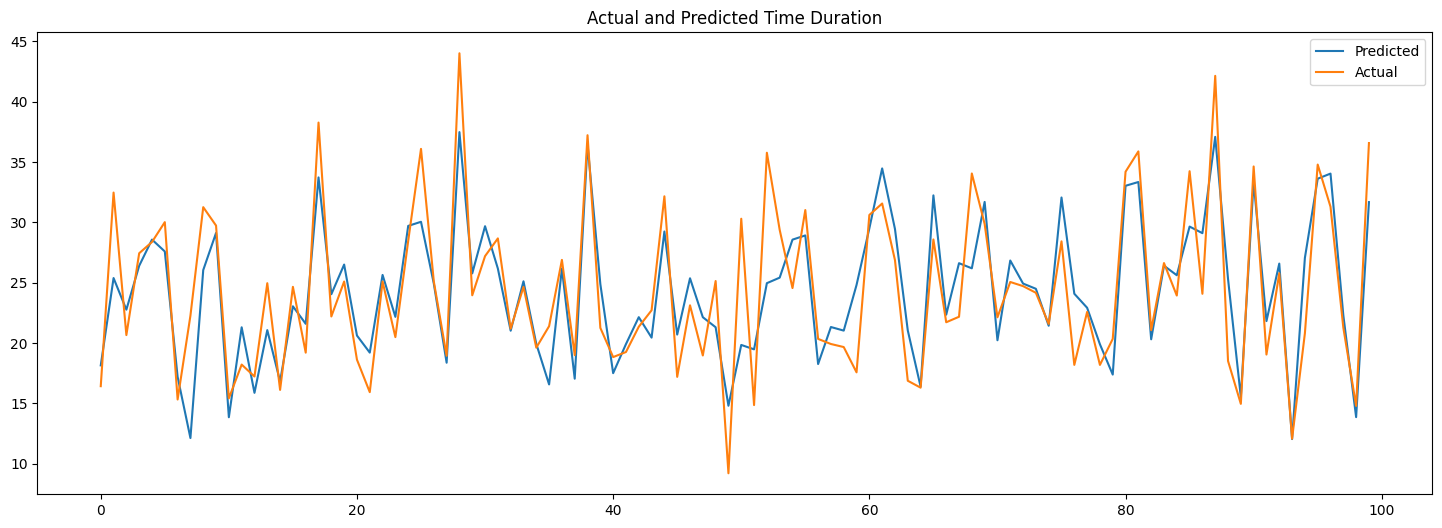

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_lgbmR_pred)

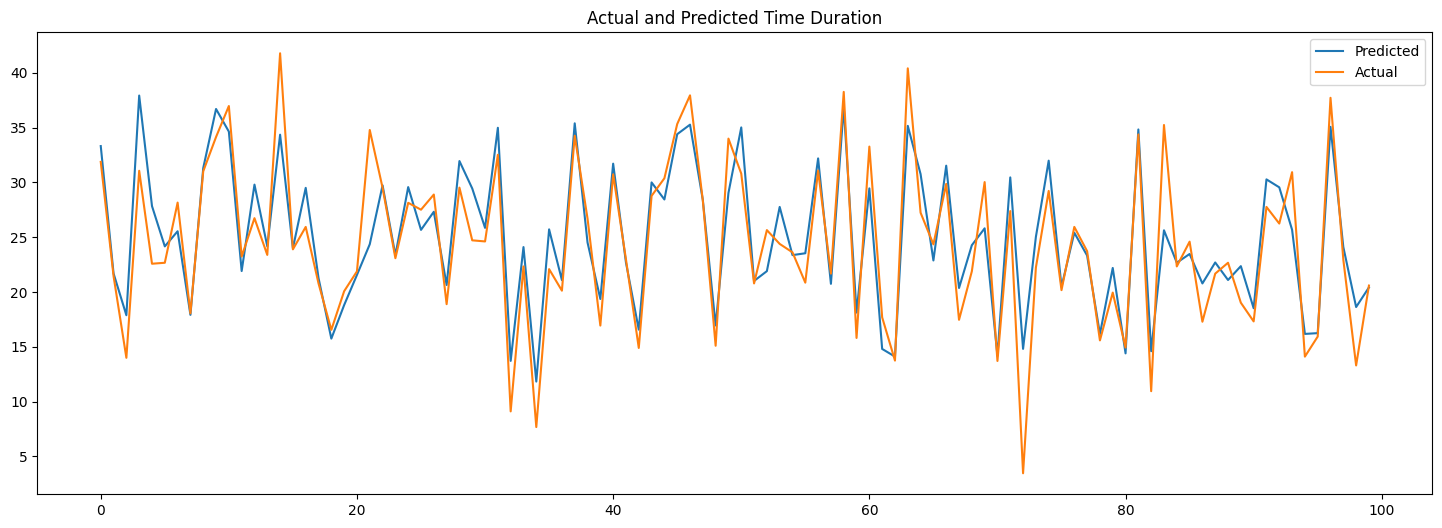

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_lgbmR_pred)

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 150, 'learning_rate': 0.1}
Negative mean square error is: -14.811809533049805


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 2.8035032797780755
MAE on test is: 2.8447289040093025
--------------------------------------------------
MSE on train is: 14.174692637091603
MSE on test is: 14.699238492090057
--------------------------------------------------
RMSE on train is: 3.7649293004107798
RMSE on test is: 3.8339585929023876
--------------------------------------------------
MAPE on train is: 12.724010847510165  %
MAPE on test is: 12.92433331604053  %
--------------------------------------------------
R2 on train is: 0.7538512316439336
R2 on test is: 0.7452331028195074
--------------------------------------------------
Accuracy of train is: 87.27598915248984  %
Accuracy of test is: 87.07566668395947  %
--------------------------------------------------


**1. Which hyperparameter optimization technique have you used and why?**

* By using RandomizedSearchCV in LightGBM, we were able to optimize our model efficiently and effectively. This method selected random subsets of the parameters, reducing processing and training time without compromising accuracy. Ultimately, made the decision to use RandomizedSearchCV for our hyperparameter optimization, due to its time efficiency and effective results.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* We enhanced the performance of our machine learning model by utilizing RandomizedSearchCV to identify the optimal hyperparameters. This method explored all possible hyperparameter combinations and provided the most accurate results by selecting the best values. Our optimal combination, {'max_depth': 125, 'learning_rate': 0.1, 'n_estimators': 600}, reduced the mean squared error from 14.82% to 14.74% and the mean absolute percentage error from 13.05% to 13%, resulting in a variance capture of 74.45% on the test dataset.

### ML Model - 6 XGBoost Regression

In [ ]:
# ML Model - 6 Implementation
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)
xgbR.fit(x_train, y_train)
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)
     

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.600179525100221
MAE on test is: 2.817467650490859
--------------------------------------------------
MSE on train is: 12.081468462569998
MSE on test is: 14.502961780818522
--------------------------------------------------
RMSE on train is: 3.475840684290636
RMSE on test is: 3.8082754339488787
--------------------------------------------------
MAPE on train is: 11.531657771088726  %
MAPE on test is: 12.767643560212749  %
--------------------------------------------------
R2 on train is: 0.7902008418713449
R2 on test is: 0.7486349667151337
--------------------------------------------------
Accuracy of train is: 88.46834222891127  %
Accuracy of test is: 87.23235643978725  %
--------------------------------------------------


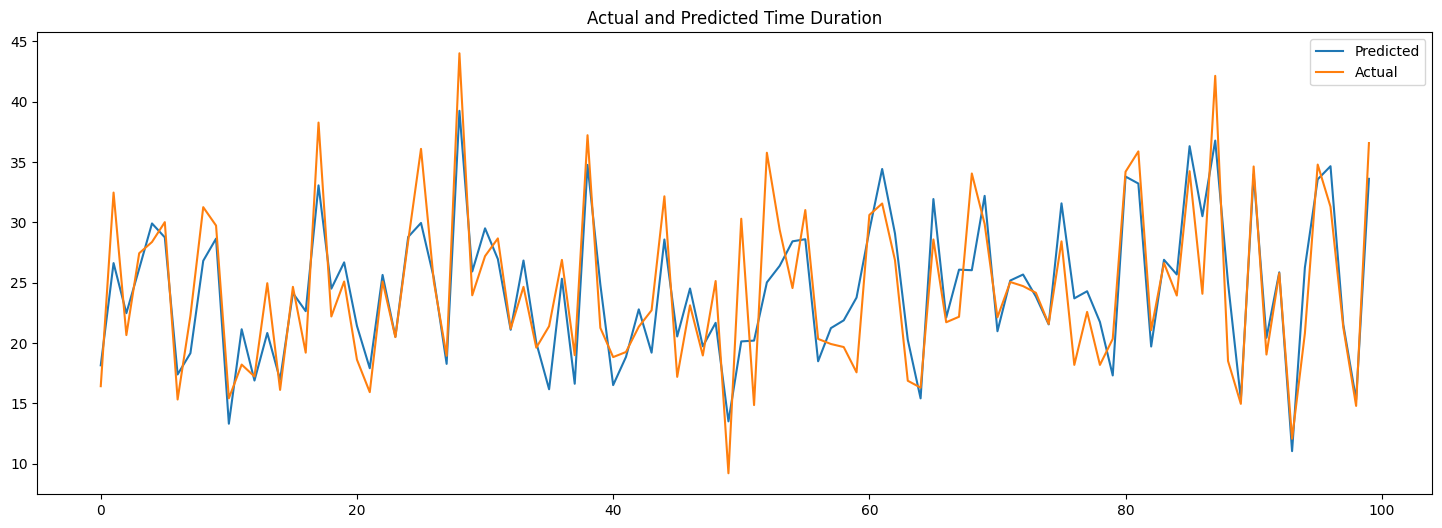

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_xgbR_pred)

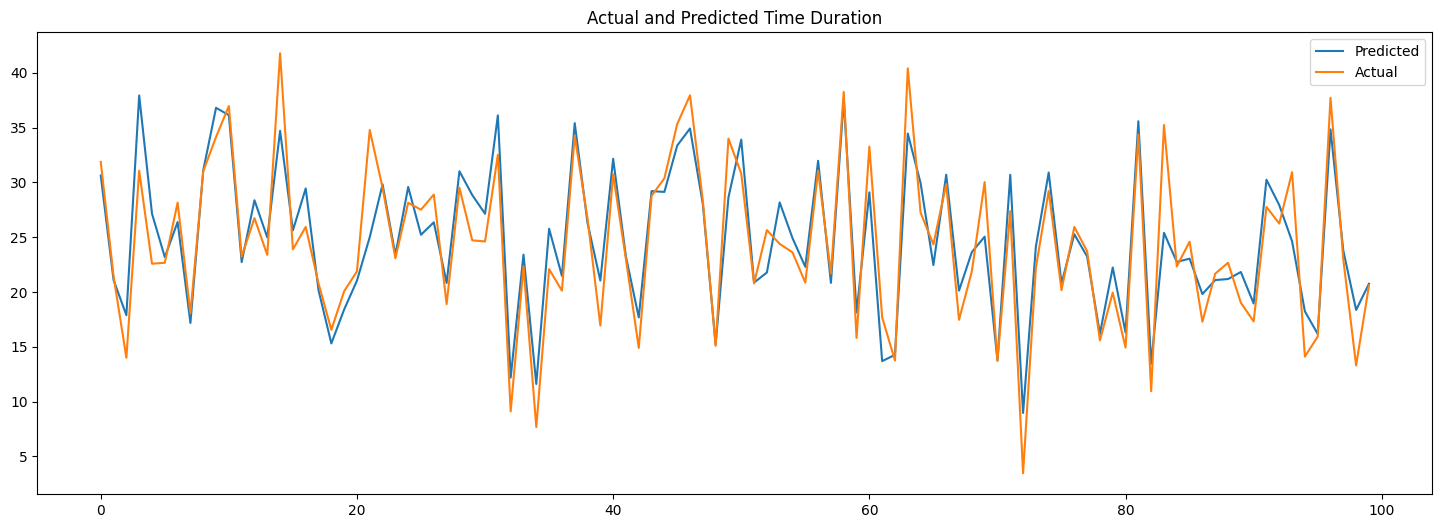

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_xgbR_pred)

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,6,8]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=2)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")
     

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 8}
Negative mean square error is: -15.087687629131404


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.8275710354505557
MAE on test is: 2.885584990796193
--------------------------------------------------
MSE on train is: 14.361769902256588
MSE on test is: 15.014045979757547
--------------------------------------------------
RMSE on train is: 3.789692586774894
RMSE on test is: 3.8747962500959385
--------------------------------------------------
MAPE on train is: 12.790960144972804  %
MAPE on test is: 13.065377547679121  %
--------------------------------------------------
R2 on train is: 0.750602565899515
R2 on test is: 0.7397768659617008
--------------------------------------------------
Accuracy of train is: 87.2090398550272  %
Accuracy of test is: 86.93462245232088  %
--------------------------------------------------


**1. Which hyperparameter optimization technique have you used and why?**

* In order to minimize the computational time, we opted for RandomizedSearchCV instead of GridSearchCV for hyperparameter tuning in XGBoost. This was due to the fact that XGBoost is a heavy algorithm and GridSearchCV would have taken a lot of processing time. However, I still used a limited number of parameters in RandomizedSearchCV to ensure that we do not miss out on the best combination of hyperparameters.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* We enhanced the performance of our machine learning model by utilizing RandomizedSearchCV to identify the optimal hyperparameters. This method explored all possible hyperparameter combinations and provided the most accurate results by selecting the best values. Our optimal combination, {'max_depth': 8, 'learning_rate': 0.1}, resulting in a variance capture of 73.94% on the test dataset.

### **Which Evaluation metrics did you consider for a positive business impact and why?**

* Here Predicting trip duration considered as regression problem, where the goal is to predict a continuous outcome variable (duration of a trip) based on one or more predictor variables. It can also be considered a time series problem, as the duration of trips may be influenced by temporal factors such as time of day, day of the week, and weather conditions. In this case, the data would include information on trip duration and the related predictor variables over a period of time.

**Mean Absolute Error (MAE):** MAE is a metric for evaluating prediction accuracy by calculating the average magnitude of errors in predictions, regardless of direction. The goal in regression analysis is to minimize the MAE, leading to improved accuracy and positive business impact.

**Mean Squared Error (MSE):** It measures the average squared difference between the actual and predicted values and provides a numerical representation of the average error in the model's predictions. The MSE is often used as a loss function in the training process of machine learning models and the goal is to minimize this value, resulting in a more accurate model.

**Root Mean Squared Error (RMSE):** RMSE is a popular evaluation metric for regression models, calculated as the square root of the Mean Squared Error. The RMSE has the same units as the original data, making it easier to understand the magnitude of prediction errors.

**R2 Score:** The R2 Score is a commonly used metric in regression analysis, measuring the proportion of the dependent variable's variance explained by the independent variables in the model. It provides insight on model fit and comparison, helping in decisions about model selection and analysis.

**Mean Absolute Percentage Error (MAPE):** Is is a metric used in time series analysis to evaluate the accuracy of predictions. It is calculated as the average of the absolute percentage differences between the actual and predicted values. With the help of MAPE an analyst can easily explain the percentage error. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

**Accuracy:** It is calculated as the average of the absolute percentage differences between the actual and predicted values. A lower value of 100-MAPE indicates a more accurate model, with a higher degree of similarity between the actual and predicted values.

### **Which ML model did you choose from the above created models as your final prediction model and why?**

* The goal is to build a model with high accuracy for use in real-time navigation systems, a lower MAPE value may be necessary to ensure the model's predictions are accurate enough.

* But, the complexity of the problem, I am trying to solve can impact the accuracy of the model. I am trying to predict a complex phenomenon, that is the duration of a taxi trip in a large city NYC, therefore it is more challenging to achieve a high accuracy.

* However, the goal is to predict a continuous value like trip duration, then the RMSE is a more appropriate evaluation metric, since it provides a measure of the magnitude of the error in the predictions. The smaller the RMSE, the better the model is at predicting the actual values.

In [153]:
# Storing different regression metrics in order to make dataframe
Models   = ["Linear Regression","Lasso Regression","Ridgde Regression",
            "Elastic Net Regression","LightGBM","XGboost"]
MAE      = [3.95, 3.95, 3.95, 3.95, 2.84, 2.88] 
MSE      = [25.78, 25.79, 25.78,25.78,14.69, 15.01]
RMSE     = [5.07, 5.07, 5.07, 5.07,3.83, 3.87]
MAPE     = [17.70, 17.72, 17.70, 17.70,12.96, 13.06]
r2       = [0.55, 0.55, 0.55, 0.55, 0.74, 0.73]
accuracy = [82.29, 82.27, 82.29, 82.29,87.07, 86.93]

# Create dataframe from the lists
data = {'MODEL': Models, 
          'MAE': MAE,
          'MSE': MSE,
         'RMSE': RMSE,
         'MAPE': MAPE,
           'R2': r2,
     'Accuracy': accuracy}

Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

MODEL   MAE    MSE  RMSE   MAPE    R2  Accuracy
0       Linear Regression  3.95  25.78  5.07  17.70  0.55     82.29
1        Lasso Regression  3.95  25.79  5.07  17.72  0.55     82.27
2       Ridgde Regression  3.95  25.78  5.07  17.70  0.55     82.29
3  Elastic Net Regression  3.95  25.78  5.07  17.70  0.55     82.29
4                LightGBM  2.84  14.69  3.83  12.96  0.74     87.07
5                 XGboost  2.88  15.01  3.87  13.06  0.73     86.93

### **Explain the model which you have used and the feature importance using any model explainability tool?**

* LightGBM is an efficient gradient boosting framework for both linear and tree-based regression models. It trains a series of simple models, such as decision trees, and combines their predictions to form a stronger model. LightGBM uses gradient boosting to optimize tree parameters and reduce the loss, and it also has features such as regularization and parallel processing. Although tree-based algorithms can be less interpretable, interpretability can be improved using tools like LIME and SHAP.

## ***8.*** ***Future Work (Optional)***

* The final model object will be stored using the pickle module for future use. Pickling is the process of converting a Python object into a byte stream, while unpickling is the inverse operation of converting a byte stream into a Python object. This process is known as serialization, marshalling, or flattening. The pickle module implements binary protocols for serializing and deserializing a Python object structure, making it useful for storing objects in a file, preserving program state between sessions, or transporting data over a network.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [154]:
# Save the File
# Importing pickle module
import pickle

In [155]:
# Save the File
filename='NYC_TAXI_TRIP_TIME_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(lgbm_rand_R,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [156]:
# Load the File and predict unseen data.
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(x_test)
     

array([33.23430936, 21.6177386 , 17.94094837, ..., 26.27906049,
       15.14848323, 32.02281156])

In [ ]:
y_test_rand_lgbm_pred

array([33.23430936, 21.6177386 , 17.94094837, ..., 26.27906049,
       15.14848323, 32.02281156])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**From EDA**

Exploratory Data Analysis (EDA) is a crucial part of data analysis that enables an initial investigation of the dataset to identify patterns, anomalies, and relationships, detect potential issues, and inform advanced analytical methods. EDA also provides a thorough understanding of the data for informed decision-making and guides further analysis. After performing EDA we have drawn the following conclusions:

* Vendor 2 is slightly more popular than Vendor 1 with similar number of trips.

* Most trips have 1 or 2 passengers and the trip duration ranges from 10-20 minutes.

* Average trip distance is 3.5 km, with highest distance recorded on Sundays.

* Trip demand is stable throughout the year.

* Average trip duration is shortest at 6 AM and longest during peak hours at 3 PM.

* Trip duration increases from Monday to Thursday and then decreases until Sunday.

* Average trip duration is highest in the 6th month and lowest in February.

* Vendor 2 has higher average trip duration by 200 seconds compared to Vendor 1.

* Trip distance is highest in early morning hours.

* Average speed of taxis is higher on weekends and peaks at 5 AM.

* Vendor 2 has higher average passenger count compared to Vendor 1.

* Pickups are mostly concentrated in Manhattan while drop-offs are more spread out.

* Also from hypothesis we get to know that, Weekend trips are more frequent than weekdays. Weekday and weekend traffic hours differ. Passenger count and vendor id are related.

**From ML Model Implementation**

* Effective implementation of an ML model requires proper data selection and preprocessing, regular evaluation and tuning, use of appropriate evaluation metrics, integration for easy maintenance, consideration of ethical and legal factors, appropriate algorithm choice, efficient hyperparameter tuning, and transparency in results.

* We conducted a regression analysis starting with Linear Regression and exploring other non-linear models. For each model, we fine-tuned the hyperparameters in an effort to reduce errors and arrived at the following conclusions:

* Our Linear Regression model achieved an accuracy of approximately 82%, however, it only captured 55% of the variance in the target variable (trip_duration). This suggests that the relationship between the features and the target is not a perfect linear dependence, even after using regularization techniques.

* I also tried the gradient boosting technique with LightGBM and obtained the best results of approximately 87%. The advantage of using LightGBM was that it utilized all available cores and reduced processing time. When training large datasets, one should consider using LightGBM for efficient and effective results in a shorter amount of time.

* Finally, I implemented XGboost and achieved an accuracy of 86% with a mean absolute percentage error of only 13%.

* The optimal model was found to be LightGBM and its performance can be further improved by incorporating the concept of PCA for feature selection. The duration of trips may also be impacted by temporal factors, such as weather conditions. If this information is taken into account, it may result in even more accurate results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***